In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy.random import default_rng

import sys
path_to_mavenn_local = '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local'
sys.path.insert(0,path_to_mavenn_local)

import mavenn

import tensorflow as tf
import tensorflow.keras.backend as K

In [2]:
!ls 20.08.16_mpsa_data

brca2_lib1_rep1.csv  ikbkap_lib1_rep3.csv smn1_lib2_rep2.csv
brca2_lib1_rep2.csv  ikbkap_lib2_rep1.csv smn1_lib2_rep3.csv
brca2_lib1_rep3.csv  ikbkap_lib2_rep2.csv smn1_lib3_rep1.csv
brca2_lib2_rep1.csv  ikbkap_lib2_rep3.csv smn1_lib3_rep2.csv
brca2_lib2_rep2.csv  smn1_lib1_rep1.csv   smn1_lib3_rep3.csv
brca2_lib2_rep3.csv  smn1_lib1_rep2.csv   stats.csv
ikbkap_lib1_rep1.csv smn1_lib1_rep3.csv
ikbkap_lib1_rep2.csv smn1_lib2_rep1.csv


In [3]:
MPSA_data_lib1_rep1 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep1.csv')
#MPSA_data_lib1_rep2 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep2.csv')
#MPSA_data_lib1_rep3 = pd.read_csv('20.08.16_mpsa_data/brca2_lib1_rep3.csv')

# MPSA_data_lib2_rep1 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep1.csv')
# MPSA_data_lib2_rep2 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep2.csv')
# MPSA_data_lib2_rep3 = pd.read_csv('20.08.16_mpsa_data/brca2_lib2_rep3.csv')

smn1_lib1_rep1 = pd.read_csv('20.08.16_mpsa_data/smn1_lib1_rep1.csv')

#ikbkap_lib1_rep1 = pd.read_csv('20.08.16_mpsa_data/ikbkap_lib1_rep1.csv')
#ikbkap_lib1_rep2 = pd.read_csv('20.08.16_mpsa_data/ikbkap_lib1_rep2.csv')
# ikbkap_lib1_rep3 = pd.read_csv('20.08.16_mpsa_data/ikbkap_lib1_rep3.csv')

# ikbkap_lib2_rep1 = pd.read_csv('20.08.16_mpsa_data/ikbkap_lib2_rep1.csv')
# ikbkap_lib2_rep2 = pd.read_csv('20.08.16_mpsa_data/ikbkap_lib2_rep2.csv')
# ikbkap_lib2_rep3 = pd.read_csv('20.08.16_mpsa_data/ikbkap_lib2_rep3.csv')


In [4]:
#MPSA_data_rep1.head(3)

In [5]:
#MPSA_data_rep2.head(3)

In [6]:
#MPSA_data_rep3.head()

In [7]:
#len(MPSA_data_rep1),len(MPSA_data_rep2),len(MPSA_data_rep3)

### Redo merge as outer join and allow nans

In [8]:
# X = MPSA_data['ss'].values
# y = MPSA_data['log_psi'].values

BRCA_df = MPSA_data_lib1_rep1.copy()
#                              .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep3,on='ss',how='outer')           

# BRCA_df = MPSA_data_lib1_rep1.merge(MPSA_data_lib1_rep2,on='ss',how='outer')\
#                              .merge(MPSA_data_lib1_rep3,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep1,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep2,on='ss',how='outer')\
#                              .merge(MPSA_data_lib2_rep3,on='ss',how='outer')                    
            
# BRCA_df.columns = ['ss', 'log_psi__lib_1_rep1', 'dlog_psi_x', 'log_psi__lib_1_rep2', 'dlog_psi_y', 'log_psi__lib_1_rep3',
#        'dlog_psi_x', 'log_psi__lib_2_rep1', 'dlog_psi_y', 'log_psi__lib_2_rep2', 'dlog_psi_x',
#        'log_psi__lib_2_rep3', 'dlog_psi_y']

BRCA_df.head()

,ss,log_psi,dlog_psi
0,AAAGCAAAA,-3.751854,0.444200
1,AAAGCAAAC,-2.697741,0.369972
2,AAAGCAAAG,-2.242947,0.575121
3,AAAGCAAAT,-3.067251,0.357014
4,AAAGCAACA,-2.987074,0.472637


In [9]:
BRCA_df.columns = ['ss', 'log_psi__lib_1_rep1', 'dlog_psi_x']
del BRCA_df['dlog_psi_x']
BRCA_df

,ss,log_psi__lib_1_rep1
0,AAAGCAAAA,-3.751854
1,AAAGCAAAC,-2.697741
2,AAAGCAAAG,-2.242947
3,AAAGCAAAT,-3.067251
4,AAAGCAACA,-2.987074
...,...,...
21924,TTTGTTTCT,-3.265759
21925,TTTGTTTGA,-2.729585
21926,TTTGTTTGG,-2.944439
21927,TTTGTTTGT,-3.267212


In [10]:
# X = MPSA_data['ss'].values
# y = MPSA_data['log_psi'].values

SMN1_df = smn1_lib1_rep1.copy()
# IKBKAP_df = ikbkap_lib1_rep1.merge(ikbkap_lib1_rep2,on='ss',how='outer')\
#                              .merge(ikbkap_lib1_rep3,on='ss',how='outer')\
#                              .merge(ikbkap_lib2_rep1,on='ss',how='outer')\
#                              .merge(ikbkap_lib2_rep2,on='ss',how='outer')\
#                              .merge(ikbkap_lib2_rep3,on='ss',how='outer')                    
            
# IKBKAP_df.columns = ['ss', 'ik_log_psi__lib_1_rep1', 'dlog_psi_x', 'ik_log_psi__lib_1_rep2', 'dlog_psi_y', 'ik_log_psi__lib_1_rep3',
#        'dlog_psi_x', 'ik_log_psi__lib_2_rep1', 'dlog_psi_y', 'ik_log_psi__lib_2_rep2', 'dlog_psi_x',
#        'ik_log_psi__lib_2_rep3', 'dlog_psi_y']

SMN1_df.columns = ['ss', 'log_psi__lib_2_rep1', 'dlog_psi_x']
del SMN1_df['dlog_psi_x']
SMN1_df

,ss,log_psi__lib_2_rep1
0,AAAGCAAAA,-3.970292
1,AAAGCAAAC,-5.631212
2,AAAGCAAAG,-5.129899
3,AAAGCAAAT,-6.459904
4,AAAGCAACA,-5.283204
...,...,...
6150,TTTGTTTCC,-4.615121
6151,TTTGTTTTA,-4.890349
6152,TTTGTTTTC,-5.332719
6153,TTTGTTTTG,-4.875197


In [11]:
#BRCA_df.head()

In [12]:
MPSA_df = BRCA_df.merge(SMN1_df,on='ss',how='outer').copy()
MPSA_df

,ss,log_psi__lib_1_rep1,log_psi__lib_2_rep1
0,AAAGCAAAA,-3.751854,-3.970292
1,AAAGCAAAC,-2.697741,-5.631212
2,AAAGCAAAG,-2.242947,-5.129899
3,AAAGCAAAT,-3.067251,-6.459904
4,AAAGCAACA,-2.987074,-5.283204
...,...,...,...
24032,TTTGTTATG,NaN,-4.394449
24033,TTTGTTTCC,NaN,-4.615121
24034,TTTGTTTTC,NaN,-5.332719
24035,TTTGTTTTG,NaN,-4.875197


In [13]:
MPSA_df.dropna(inplace=True)
MPSA_df

,ss,log_psi__lib_1_rep1,log_psi__lib_2_rep1
0,AAAGCAAAA,-3.751854,-3.970292
1,AAAGCAAAC,-2.697741,-5.631212
2,AAAGCAAAG,-2.242947,-5.129899
3,AAAGCAAAT,-3.067251,-6.459904
4,AAAGCAACA,-2.987074,-5.283204
...,...,...,...
21904,TTTGTTCTG,-3.084528,-5.407172
21919,TTTGTTTAA,-3.513675,-5.564520
21922,TTTGTTTAT,-4.033856,-5.389072
21923,TTTGTTTCA,-4.213185,-5.993961


In [14]:
X = MPSA_df['ss'].values
y1 = MPSA_df['log_psi__lib_1_rep1'].values
y2 = MPSA_df['log_psi__lib_2_rep1'].values
# y1 = MPSA_df['log_psi__lib_1_rep1'].values
# y2 = MPSA_df['log_psi__lib_1_rep2'].values
# y3 = MPSA_df['log_psi__lib_1_rep3'].values

# y4 = MPSA_df['log_psi__lib_2_rep1'].values
# y5 = MPSA_df['log_psi__lib_2_rep2'].values
# y6 = MPSA_df['log_psi__lib_2_rep3'].values

# y7 = MPSA_df['ik_log_psi__lib_1_rep1'].values
# y8 = MPSA_df['ik_log_psi__lib_1_rep2'].values
# y9 = MPSA_df['ik_log_psi__lib_1_rep3'].values

# y10 = MPSA_df['ik_log_psi__lib_2_rep1'].values
# y11 = MPSA_df['ik_log_psi__lib_2_rep2'].values
# y12 = MPSA_df['ik_log_psi__lib_2_rep3'].values

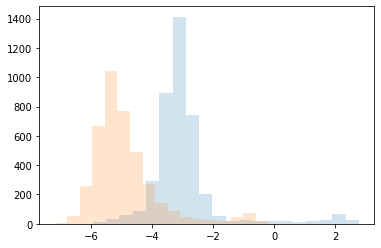

In [15]:
plt.hist(y1,bins=20,alpha=0.2)
#plt.hist(y2,bins=20,alpha=0.2)
#plt.hist(y7,bins=20,alpha=0.2)
plt.hist(y2,bins=20,alpha=0.2)

plt.show()

In [16]:
#len(y7)

In [17]:
diag = np.linspace(min(y1),max(y2),100)

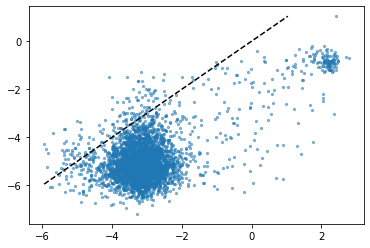

In [18]:
plt.scatter(y1,y2,s=5,alpha=0.5)
# plt.scatter(y1,y3,s=0.1,alpha=0.2)
# plt.scatter(y2,y3,s=0.1,alpha=0.2)

# plt.scatter(y7,y8,s=0.1,alpha=0.2)
# plt.scatter(y9,y10,s=0.1,alpha=0.2)
# plt.scatter(y11,y12,s=0.1,alpha=0.2)

plt.plot(diag,diag,'--',color='black')
plt.show()

In [19]:
# y = np.hstack(
#     (y1.reshape(-1,1),
#      y2.reshape(-1,1),
#      y3.reshape(-1,1),
#      y4.reshape(-1,1),
#      y5.reshape(-1,1),
#      y6.reshape(-1,1),
#      y7.reshape(-1,1),
#      y8.reshape(-1,1),
#      y9.reshape(-1,1),
#      y10.reshape(-1,1),
#      y11.reshape(-1,1),
#      y12.reshape(-1,1),
#     ))

y = np.hstack(
    (y1.reshape(-1,1),
     y2.reshape(-1,1),
    ))

In [20]:
y.shape

(4047, 2)

In [21]:
from sklearn.model_selection import train_test_split

# load data
#X, y = get_example_dataset(name='MPSA')

# X = X[0:50000].copy()
# y = y[0:50000].copy()

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y)



In [22]:
len(X[0])

9

In [23]:
# Get sequence length
L = len(X[0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='dna',
                     gpmap_type='additive', 
                     regression_type='Multi_y_GE',
                     ge_noise_model_type='Gaussian',
                     ge_heteroskedasticity_order=0,
                     ge_nonlinearity_hidden_nodes=2,
                     number_of_replicate_targets = y_train.shape[1])

In [24]:
# Set training data
model.set_data(x=x_train,
               #y=[y_train[:,x] for x in range(y_train.shape[1])],
               y=y_train,
               #validation_flags=(data_df['set']=='validation'),
               shuffle=False)

N = 3,035 observations set as training data.
Using 20.3% for validation.
Time to set data: 0.0152 sec.


In [25]:
#tf.keras.utils.plot_model(GER.model.model, to_file='multi_regression.png', show_shapes=True)

In [26]:
# Fit model to data
model.fit(learning_rate=.00005,
          epochs=5000,
          batch_size=50,
          early_stopping=True,
          early_stopping_patience=30,
          linear_initialization=False)

Epoch 1/5000
49/49 [==============================] - 2s 14ms/step - loss: 178.1004 - gaussian_noise_model_layer_loss: 91.1849 - gaussian_noise_model_layer_1_loss: 85.8787 - I_var: nan - val_loss: 179.2982 - val_gaussian_noise_model_layer_loss: 91.6197 - val_gaussian_noise_model_layer_1_loss: 86.6454 - val_I_var: nan
Epoch 2/5000
49/49 [==============================] - 0s 2ms/step - loss: 174.6934 - gaussian_noise_model_layer_loss: 89.4867 - gaussian_noise_model_layer_1_loss: 84.1746 - I_var: nan - val_loss: 178.0795 - val_gaussian_noise_model_layer_loss: 90.9714 - val_gaussian_noise_model_layer_1_loss: 86.0796 - val_I_var: nan
Epoch 3/5000
49/49 [==============================] - 0s 2ms/step - loss: 176.2209 - gaussian_noise_model_layer_loss: 90.2846 - gaussian_noise_model_layer_1_loss: 84.9090 - I_var: nan - val_loss: 176.9013 - val_gaussian_noise_model_layer_loss: 90.3439 - val_gaussian_noise_model_layer_1_loss: 85.5334 - val_I_var: nan
Epoch 4/5000
49/49 [=========================

Epoch 27/5000
49/49 [==============================] - 0s 2ms/step - loss: 157.5433 - gaussian_noise_model_layer_loss: 80.1669 - gaussian_noise_model_layer_1_loss: 76.4469 - I_var: nan - val_loss: 158.4312 - val_gaussian_noise_model_layer_loss: 80.3904 - val_gaussian_noise_model_layer_1_loss: 77.1140 - val_I_var: nan
Epoch 28/5000
49/49 [==============================] - 0s 2ms/step - loss: 160.8586 - gaussian_noise_model_layer_loss: 81.5632 - gaussian_noise_model_layer_1_loss: 78.3695 - I_var: nan - val_loss: 157.9766 - val_gaussian_noise_model_layer_loss: 80.1416 - val_gaussian_noise_model_layer_1_loss: 76.9118 - val_I_var: nan
Epoch 29/5000
49/49 [==============================] - 0s 2ms/step - loss: 156.4672 - gaussian_noise_model_layer_loss: 79.4854 - gaussian_noise_model_layer_1_loss: 76.0595 - I_var: nan - val_loss: 157.5324 - val_gaussian_noise_model_layer_loss: 79.8982 - val_gaussian_noise_model_layer_1_loss: 76.7145 - val_I_var: nan
Epoch 30/5000
49/49 [======================

Epoch 53/5000
49/49 [==============================] - 0s 2ms/step - loss: 147.2853 - gaussian_noise_model_layer_loss: 74.7396 - gaussian_noise_model_layer_1_loss: 71.7035 - I_var: nan - val_loss: 150.5901 - val_gaussian_noise_model_layer_loss: 76.0389 - val_gaussian_noise_model_layer_1_loss: 73.7114 - val_I_var: nan
Epoch 54/5000
49/49 [==============================] - 0s 2ms/step - loss: 150.1020 - gaussian_noise_model_layer_loss: 75.9517 - gaussian_noise_model_layer_1_loss: 73.3112 - I_var: nan - val_loss: 150.4012 - val_gaussian_noise_model_layer_loss: 75.9317 - val_gaussian_noise_model_layer_1_loss: 73.6327 - val_I_var: nan
Epoch 55/5000
49/49 [==============================] - 0s 2ms/step - loss: 149.3916 - gaussian_noise_model_layer_loss: 75.5008 - gaussian_noise_model_layer_1_loss: 73.0548 - I_var: nan - val_loss: 150.2124 - val_gaussian_noise_model_layer_loss: 75.8243 - val_gaussian_noise_model_layer_1_loss: 73.5545 - val_I_var: nan
Epoch 56/5000
49/49 [======================

Epoch 79/5000
49/49 [==============================] - 0s 2ms/step - loss: 150.1732 - gaussian_noise_model_layer_loss: 75.6102 - gaussian_noise_model_layer_1_loss: 73.7994 - I_var: nan - val_loss: 146.7737 - val_gaussian_noise_model_layer_loss: 73.8307 - val_gaussian_noise_model_layer_1_loss: 72.1815 - val_I_var: nan
Epoch 80/5000
49/49 [==============================] - 0s 2ms/step - loss: 146.0106 - gaussian_noise_model_layer_loss: 73.5312 - gaussian_noise_model_layer_1_loss: 71.7185 - I_var: nan - val_loss: 146.6579 - val_gaussian_noise_model_layer_loss: 73.7620 - val_gaussian_noise_model_layer_1_loss: 72.1373 - val_I_var: nan
Epoch 81/5000
49/49 [==============================] - 0s 2ms/step - loss: 144.6477 - gaussian_noise_model_layer_loss: 72.9600 - gaussian_noise_model_layer_1_loss: 70.9297 - I_var: nan - val_loss: 146.5436 - val_gaussian_noise_model_layer_loss: 73.6942 - val_gaussian_noise_model_layer_1_loss: 72.0936 - val_I_var: nan
Epoch 82/5000
49/49 [======================

Epoch 105/5000
49/49 [==============================] - 0s 2ms/step - loss: 145.9610 - gaussian_noise_model_layer_loss: 73.2208 - gaussian_noise_model_layer_1_loss: 72.0468 - I_var: nan - val_loss: 144.2295 - val_gaussian_noise_model_layer_loss: 72.3055 - val_gaussian_noise_model_layer_1_loss: 71.2324 - val_I_var: nan
Epoch 106/5000
49/49 [==============================] - 0s 2ms/step - loss: 142.1499 - gaussian_noise_model_layer_loss: 71.5032 - gaussian_noise_model_layer_1_loss: 69.9557 - I_var: nan - val_loss: 144.1483 - val_gaussian_noise_model_layer_loss: 72.2559 - val_gaussian_noise_model_layer_1_loss: 71.2032 - val_I_var: nan
Epoch 107/5000
49/49 [==============================] - 0s 2ms/step - loss: 144.8460 - gaussian_noise_model_layer_loss: 72.7338 - gaussian_noise_model_layer_1_loss: 71.4238 - I_var: nan - val_loss: 144.0658 - val_gaussian_noise_model_layer_loss: 72.2057 - val_gaussian_noise_model_layer_1_loss: 71.1735 - val_I_var: nan
Epoch 108/5000
49/49 [==================

Epoch 131/5000
49/49 [==============================] - 0s 2ms/step - loss: 143.0014 - gaussian_noise_model_layer_loss: 71.5536 - gaussian_noise_model_layer_1_loss: 70.8142 - I_var: nan - val_loss: 142.4337 - val_gaussian_noise_model_layer_loss: 71.2005 - val_gaussian_noise_model_layer_1_loss: 70.6010 - val_I_var: nan
Epoch 132/5000
49/49 [==============================] - 0s 2ms/step - loss: 140.7243 - gaussian_noise_model_layer_loss: 70.5475 - gaussian_noise_model_layer_1_loss: 69.5453 - I_var: nan - val_loss: 142.3746 - val_gaussian_noise_model_layer_loss: 71.1640 - val_gaussian_noise_model_layer_1_loss: 70.5806 - val_I_var: nan
Epoch 133/5000
49/49 [==============================] - 0s 2ms/step - loss: 141.9091 - gaussian_noise_model_layer_loss: 71.0814 - gaussian_noise_model_layer_1_loss: 70.1983 - I_var: nan - val_loss: 142.3203 - val_gaussian_noise_model_layer_loss: 71.1301 - val_gaussian_noise_model_layer_1_loss: 70.5621 - val_I_var: nan
Epoch 134/5000
49/49 [==================

Epoch 157/5000
49/49 [==============================] - 0s 2ms/step - loss: 139.8525 - gaussian_noise_model_layer_loss: 69.8798 - gaussian_noise_model_layer_1_loss: 69.3875 - I_var: nan - val_loss: 141.1991 - val_gaussian_noise_model_layer_loss: 70.4326 - val_gaussian_noise_model_layer_1_loss: 70.1826 - val_I_var: nan
Epoch 158/5000
49/49 [==============================] - 0s 2ms/step - loss: 143.8963 - gaussian_noise_model_layer_loss: 71.7440 - gaussian_noise_model_layer_1_loss: 71.5687 - I_var: nan - val_loss: 141.1631 - val_gaussian_noise_model_layer_loss: 70.4103 - val_gaussian_noise_model_layer_1_loss: 70.1703 - val_I_var: nan
Epoch 159/5000
49/49 [==============================] - 0s 2ms/step - loss: 139.6166 - gaussian_noise_model_layer_loss: 69.7940 - gaussian_noise_model_layer_1_loss: 69.2406 - I_var: nan - val_loss: 141.1220 - val_gaussian_noise_model_layer_loss: 70.3852 - val_gaussian_noise_model_layer_1_loss: 70.1561 - val_I_var: nan
Epoch 160/5000
49/49 [==================

Epoch 183/5000
49/49 [==============================] - 0s 2ms/step - loss: 138.4705 - gaussian_noise_model_layer_loss: 69.1067 - gaussian_noise_model_layer_1_loss: 68.8165 - I_var: nan - val_loss: 140.3326 - val_gaussian_noise_model_layer_loss: 69.9091 - val_gaussian_noise_model_layer_1_loss: 69.8772 - val_I_var: nan
Epoch 184/5000
49/49 [==============================] - 0s 2ms/step - loss: 137.8482 - gaussian_noise_model_layer_loss: 68.7678 - gaussian_noise_model_layer_1_loss: 68.5343 - I_var: nan - val_loss: 140.3050 - val_gaussian_noise_model_layer_loss: 69.8930 - val_gaussian_noise_model_layer_1_loss: 69.8669 - val_I_var: nan
Epoch 185/5000
49/49 [==============================] - 0s 2ms/step - loss: 143.0772 - gaussian_noise_model_layer_loss: 71.2912 - gaussian_noise_model_layer_1_loss: 71.2410 - I_var: nan - val_loss: 140.2774 - val_gaussian_noise_model_layer_loss: 69.8770 - val_gaussian_noise_model_layer_1_loss: 69.8564 - val_I_var: nan
Epoch 186/5000
49/49 [==================

Epoch 209/5000
49/49 [==============================] - 0s 2ms/step - loss: 140.7383 - gaussian_noise_model_layer_loss: 70.1210 - gaussian_noise_model_layer_1_loss: 70.0984 - I_var: nan - val_loss: 139.6575 - val_gaussian_noise_model_layer_loss: 69.5325 - val_gaussian_noise_model_layer_1_loss: 69.6068 - val_I_var: nan
Epoch 210/5000
49/49 [==============================] - 0s 2ms/step - loss: 138.5879 - gaussian_noise_model_layer_loss: 69.0455 - gaussian_noise_model_layer_1_loss: 69.0246 - I_var: nan - val_loss: 139.6330 - val_gaussian_noise_model_layer_loss: 69.5195 - val_gaussian_noise_model_layer_1_loss: 69.5962 - val_I_var: nan
Epoch 211/5000
49/49 [==============================] - 0s 2ms/step - loss: 140.3806 - gaussian_noise_model_layer_loss: 69.9574 - gaussian_noise_model_layer_1_loss: 69.9063 - I_var: nan - val_loss: 139.6095 - val_gaussian_noise_model_layer_loss: 69.5070 - val_gaussian_noise_model_layer_1_loss: 69.5862 - val_I_var: nan
Epoch 212/5000
49/49 [==================

Epoch 235/5000
49/49 [==============================] - 0s 2ms/step - loss: 141.7970 - gaussian_noise_model_layer_loss: 70.6119 - gaussian_noise_model_layer_1_loss: 70.6873 - I_var: nan - val_loss: 139.0304 - val_gaussian_noise_model_layer_loss: 69.2116 - val_gaussian_noise_model_layer_1_loss: 69.3216 - val_I_var: nan
Epoch 236/5000
49/49 [==============================] - 0s 2ms/step - loss: 137.1018 - gaussian_noise_model_layer_loss: 68.3055 - gaussian_noise_model_layer_1_loss: 68.2991 - I_var: nan - val_loss: 139.0076 - val_gaussian_noise_model_layer_loss: 69.2003 - val_gaussian_noise_model_layer_1_loss: 69.3106 - val_I_var: nan
Epoch 237/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.0661 - gaussian_noise_model_layer_loss: 67.8206 - gaussian_noise_model_layer_1_loss: 67.7491 - I_var: nan - val_loss: 138.9827 - val_gaussian_noise_model_layer_loss: 69.1879 - val_gaussian_noise_model_layer_1_loss: 69.2988 - val_I_var: nan
Epoch 238/5000
49/49 [==================

Epoch 261/5000
49/49 [==============================] - 0s 2ms/step - loss: 140.1986 - gaussian_noise_model_layer_loss: 69.8528 - gaussian_noise_model_layer_1_loss: 69.8620 - I_var: nan - val_loss: 138.3925 - val_gaussian_noise_model_layer_loss: 68.8987 - val_gaussian_noise_model_layer_1_loss: 69.0103 - val_I_var: nan
Epoch 262/5000
49/49 [==============================] - 0s 2ms/step - loss: 140.8263 - gaussian_noise_model_layer_loss: 70.1362 - gaussian_noise_model_layer_1_loss: 70.2066 - I_var: nan - val_loss: 138.3702 - val_gaussian_noise_model_layer_loss: 68.8879 - val_gaussian_noise_model_layer_1_loss: 68.9992 - val_I_var: nan
Epoch 263/5000
49/49 [==============================] - 0s 2ms/step - loss: 138.2956 - gaussian_noise_model_layer_loss: 68.8925 - gaussian_noise_model_layer_1_loss: 68.9201 - I_var: nan - val_loss: 138.3437 - val_gaussian_noise_model_layer_loss: 68.8750 - val_gaussian_noise_model_layer_1_loss: 68.9861 - val_I_var: nan
Epoch 264/5000
49/49 [==================

Epoch 287/5000
49/49 [==============================] - 0s 2ms/step - loss: 140.8646 - gaussian_noise_model_layer_loss: 70.1593 - gaussian_noise_model_layer_1_loss: 70.2287 - I_var: nan - val_loss: 137.7346 - val_gaussian_noise_model_layer_loss: 68.5797 - val_gaussian_noise_model_layer_1_loss: 68.6783 - val_I_var: nan
Epoch 288/5000
49/49 [==============================] - 0s 2ms/step - loss: 138.0376 - gaussian_noise_model_layer_loss: 68.7541 - gaussian_noise_model_layer_1_loss: 68.8069 - I_var: nan - val_loss: 137.7079 - val_gaussian_noise_model_layer_loss: 68.5667 - val_gaussian_noise_model_layer_1_loss: 68.6648 - val_I_var: nan
Epoch 289/5000
49/49 [==============================] - 0s 2ms/step - loss: 138.3722 - gaussian_noise_model_layer_loss: 68.9239 - gaussian_noise_model_layer_1_loss: 68.9721 - I_var: nan - val_loss: 137.6836 - val_gaussian_noise_model_layer_loss: 68.5550 - val_gaussian_noise_model_layer_1_loss: 68.6525 - val_I_var: nan
Epoch 290/5000
49/49 [==================

Epoch 313/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.9325 - gaussian_noise_model_layer_loss: 68.2126 - gaussian_noise_model_layer_1_loss: 68.2444 - I_var: nan - val_loss: 137.0734 - val_gaussian_noise_model_layer_loss: 68.2592 - val_gaussian_noise_model_layer_1_loss: 68.3385 - val_I_var: nan
Epoch 314/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.0952 - gaussian_noise_model_layer_loss: 66.8011 - gaussian_noise_model_layer_1_loss: 66.8185 - I_var: nan - val_loss: 137.0462 - val_gaussian_noise_model_layer_loss: 68.2460 - val_gaussian_noise_model_layer_1_loss: 68.3246 - val_I_var: nan
Epoch 315/5000
49/49 [==============================] - 0s 2ms/step - loss: 137.1959 - gaussian_noise_model_layer_loss: 68.3312 - gaussian_noise_model_layer_1_loss: 68.3890 - I_var: nan - val_loss: 137.0215 - val_gaussian_noise_model_layer_loss: 68.2340 - val_gaussian_noise_model_layer_1_loss: 68.3117 - val_I_var: nan
Epoch 316/5000
49/49 [==================

Epoch 339/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.4529 - gaussian_noise_model_layer_loss: 67.4728 - gaussian_noise_model_layer_1_loss: 67.5004 - I_var: nan - val_loss: 136.4244 - val_gaussian_noise_model_layer_loss: 67.9428 - val_gaussian_noise_model_layer_1_loss: 68.0019 - val_I_var: nan
Epoch 340/5000
49/49 [==============================] - 0s 3ms/step - loss: 139.5895 - gaussian_noise_model_layer_loss: 69.5320 - gaussian_noise_model_layer_1_loss: 69.5775 - I_var: nan - val_loss: 136.4004 - val_gaussian_noise_model_layer_loss: 67.9310 - val_gaussian_noise_model_layer_1_loss: 67.9893 - val_I_var: nan
Epoch 341/5000
49/49 [==============================] - 0s 2ms/step - loss: 138.1118 - gaussian_noise_model_layer_loss: 68.7984 - gaussian_noise_model_layer_1_loss: 68.8333 - I_var: nan - val_loss: 136.3748 - val_gaussian_noise_model_layer_loss: 67.9184 - val_gaussian_noise_model_layer_1_loss: 67.9761 - val_I_var: nan
Epoch 342/5000
49/49 [==================

Epoch 365/5000
49/49 [==============================] - 0s 2ms/step - loss: 137.0762 - gaussian_noise_model_layer_loss: 68.2832 - gaussian_noise_model_layer_1_loss: 68.3063 - I_var: nan - val_loss: 135.8100 - val_gaussian_noise_model_layer_loss: 67.6406 - val_gaussian_noise_model_layer_1_loss: 67.6824 - val_I_var: nan
Epoch 366/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.2819 - gaussian_noise_model_layer_loss: 67.3958 - gaussian_noise_model_layer_1_loss: 67.3992 - I_var: nan - val_loss: 135.7887 - val_gaussian_noise_model_layer_loss: 67.6301 - val_gaussian_noise_model_layer_1_loss: 67.6714 - val_I_var: nan
Epoch 367/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.7419 - gaussian_noise_model_layer_loss: 66.6260 - gaussian_noise_model_layer_1_loss: 66.6288 - I_var: nan - val_loss: 135.7663 - val_gaussian_noise_model_layer_loss: 67.6191 - val_gaussian_noise_model_layer_1_loss: 67.6598 - val_I_var: nan
Epoch 368/5000
49/49 [==================

Epoch 391/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.7672 - gaussian_noise_model_layer_loss: 67.1277 - gaussian_noise_model_layer_1_loss: 67.1444 - I_var: nan - val_loss: 135.2396 - val_gaussian_noise_model_layer_loss: 67.3582 - val_gaussian_noise_model_layer_1_loss: 67.3861 - val_I_var: nan
Epoch 392/5000
49/49 [==============================] - 0s 2ms/step - loss: 138.3152 - gaussian_noise_model_layer_loss: 68.9048 - gaussian_noise_model_layer_1_loss: 68.9150 - I_var: nan - val_loss: 135.2200 - val_gaussian_noise_model_layer_loss: 67.3484 - val_gaussian_noise_model_layer_1_loss: 67.3758 - val_I_var: nan
Epoch 393/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.5684 - gaussian_noise_model_layer_loss: 67.5308 - gaussian_noise_model_layer_1_loss: 67.5418 - I_var: nan - val_loss: 135.1995 - val_gaussian_noise_model_layer_loss: 67.3382 - val_gaussian_noise_model_layer_1_loss: 67.3653 - val_I_var: nan
Epoch 394/5000
49/49 [==================

Epoch 417/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.5976 - gaussian_noise_model_layer_loss: 67.0449 - gaussian_noise_model_layer_1_loss: 67.0487 - I_var: nan - val_loss: 134.7218 - val_gaussian_noise_model_layer_loss: 67.1002 - val_gaussian_noise_model_layer_1_loss: 67.1174 - val_I_var: nan
Epoch 418/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.1795 - gaussian_noise_model_layer_loss: 67.8298 - gaussian_noise_model_layer_1_loss: 67.8453 - I_var: nan - val_loss: 134.7020 - val_gaussian_noise_model_layer_loss: 67.0902 - val_gaussian_noise_model_layer_1_loss: 67.1070 - val_I_var: nan
Epoch 419/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.9266 - gaussian_noise_model_layer_loss: 68.2103 - gaussian_noise_model_layer_1_loss: 68.2116 - I_var: nan - val_loss: 134.6860 - val_gaussian_noise_model_layer_loss: 67.0822 - val_gaussian_noise_model_layer_1_loss: 67.0987 - val_I_var: nan
Epoch 420/5000
49/49 [==================

Epoch 443/5000
49/49 [==============================] - 0s 2ms/step - loss: 139.4812 - gaussian_noise_model_layer_loss: 69.4862 - gaussian_noise_model_layer_1_loss: 69.4820 - I_var: nan - val_loss: 134.2581 - val_gaussian_noise_model_layer_loss: 66.8681 - val_gaussian_noise_model_layer_1_loss: 66.8768 - val_I_var: nan
Epoch 444/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.2946 - gaussian_noise_model_layer_loss: 66.3955 - gaussian_noise_model_layer_1_loss: 66.3857 - I_var: nan - val_loss: 134.2425 - val_gaussian_noise_model_layer_loss: 66.8602 - val_gaussian_noise_model_layer_1_loss: 66.8686 - val_I_var: nan
Epoch 445/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.0720 - gaussian_noise_model_layer_loss: 66.2801 - gaussian_noise_model_layer_1_loss: 66.2784 - I_var: nan - val_loss: 134.2273 - val_gaussian_noise_model_layer_loss: 66.8527 - val_gaussian_noise_model_layer_1_loss: 66.8609 - val_I_var: nan
Epoch 446/5000
49/49 [==================

Epoch 469/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.2332 - gaussian_noise_model_layer_loss: 66.8585 - gaussian_noise_model_layer_1_loss: 66.8534 - I_var: nan - val_loss: 133.8503 - val_gaussian_noise_model_layer_loss: 66.6633 - val_gaussian_noise_model_layer_1_loss: 66.6653 - val_I_var: nan
Epoch 470/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.4313 - gaussian_noise_model_layer_loss: 65.9617 - gaussian_noise_model_layer_1_loss: 65.9479 - I_var: nan - val_loss: 133.8361 - val_gaussian_noise_model_layer_loss: 66.6562 - val_gaussian_noise_model_layer_1_loss: 66.6580 - val_I_var: nan
Epoch 471/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.3942 - gaussian_noise_model_layer_loss: 67.9355 - gaussian_noise_model_layer_1_loss: 67.9367 - I_var: nan - val_loss: 133.8239 - val_gaussian_noise_model_layer_loss: 66.6500 - val_gaussian_noise_model_layer_1_loss: 66.6516 - val_I_var: nan
Epoch 472/5000
49/49 [==================

Epoch 495/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.8876 - gaussian_noise_model_layer_loss: 65.1880 - gaussian_noise_model_layer_1_loss: 65.1705 - I_var: nan - val_loss: 133.4994 - val_gaussian_noise_model_layer_loss: 66.4867 - val_gaussian_noise_model_layer_1_loss: 66.4834 - val_I_var: nan
Epoch 496/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.1859 - gaussian_noise_model_layer_loss: 65.8344 - gaussian_noise_model_layer_1_loss: 65.8222 - I_var: nan - val_loss: 133.4857 - val_gaussian_noise_model_layer_loss: 66.4798 - val_gaussian_noise_model_layer_1_loss: 66.4763 - val_I_var: nan
Epoch 497/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.7576 - gaussian_noise_model_layer_loss: 66.6210 - gaussian_noise_model_layer_1_loss: 66.6069 - I_var: nan - val_loss: 133.4762 - val_gaussian_noise_model_layer_loss: 66.4750 - val_gaussian_noise_model_layer_1_loss: 66.4714 - val_I_var: nan
Epoch 498/5000
49/49 [==================

Epoch 521/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.5041 - gaussian_noise_model_layer_loss: 64.4912 - gaussian_noise_model_layer_1_loss: 64.4769 - I_var: nan - val_loss: 133.1940 - val_gaussian_noise_model_layer_loss: 66.3328 - val_gaussian_noise_model_layer_1_loss: 66.3252 - val_I_var: nan
Epoch 522/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.9152 - gaussian_noise_model_layer_loss: 67.6917 - gaussian_noise_model_layer_1_loss: 67.6874 - I_var: nan - val_loss: 133.1852 - val_gaussian_noise_model_layer_loss: 66.3283 - val_gaussian_noise_model_layer_1_loss: 66.3204 - val_I_var: nan
Epoch 523/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.2533 - gaussian_noise_model_layer_loss: 66.8638 - gaussian_noise_model_layer_1_loss: 66.8530 - I_var: nan - val_loss: 133.1728 - val_gaussian_noise_model_layer_loss: 66.3220 - val_gaussian_noise_model_layer_1_loss: 66.3140 - val_I_var: nan
Epoch 524/5000
49/49 [==================

Epoch 547/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.7850 - gaussian_noise_model_layer_loss: 65.1273 - gaussian_noise_model_layer_1_loss: 65.1156 - I_var: nan - val_loss: 132.9298 - val_gaussian_noise_model_layer_loss: 66.1995 - val_gaussian_noise_model_layer_1_loss: 66.1881 - val_I_var: nan
Epoch 548/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.0124 - gaussian_noise_model_layer_loss: 64.7423 - gaussian_noise_model_layer_1_loss: 64.7278 - I_var: nan - val_loss: 132.9217 - val_gaussian_noise_model_layer_loss: 66.1954 - val_gaussian_noise_model_layer_1_loss: 66.1838 - val_I_var: nan
Epoch 549/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.5377 - gaussian_noise_model_layer_loss: 65.0058 - gaussian_noise_model_layer_1_loss: 64.9892 - I_var: nan - val_loss: 132.9118 - val_gaussian_noise_model_layer_loss: 66.1903 - val_gaussian_noise_model_layer_1_loss: 66.1786 - val_I_var: nan
Epoch 550/5000
49/49 [==================

Epoch 573/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.8968 - gaussian_noise_model_layer_loss: 66.6850 - gaussian_noise_model_layer_1_loss: 66.6639 - I_var: nan - val_loss: 132.7076 - val_gaussian_noise_model_layer_loss: 66.0871 - val_gaussian_noise_model_layer_1_loss: 66.0724 - val_I_var: nan
Epoch 574/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.6761 - gaussian_noise_model_layer_loss: 66.0760 - gaussian_noise_model_layer_1_loss: 66.0520 - I_var: nan - val_loss: 132.7000 - val_gaussian_noise_model_layer_loss: 66.0833 - val_gaussian_noise_model_layer_1_loss: 66.0686 - val_I_var: nan
Epoch 575/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.7945 - gaussian_noise_model_layer_loss: 67.1302 - gaussian_noise_model_layer_1_loss: 67.1160 - I_var: nan - val_loss: 132.6973 - val_gaussian_noise_model_layer_loss: 66.0818 - val_gaussian_noise_model_layer_1_loss: 66.0670 - val_I_var: nan
Epoch 576/5000
49/49 [==================

Epoch 599/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.0875 - gaussian_noise_model_layer_loss: 66.7766 - gaussian_noise_model_layer_1_loss: 66.7579 - I_var: nan - val_loss: 132.5191 - val_gaussian_noise_model_layer_loss: 65.9916 - val_gaussian_noise_model_layer_1_loss: 65.9743 - val_I_var: nan
Epoch 600/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.5471 - gaussian_noise_model_layer_loss: 65.0069 - gaussian_noise_model_layer_1_loss: 64.9871 - I_var: nan - val_loss: 132.5083 - val_gaussian_noise_model_layer_loss: 65.9863 - val_gaussian_noise_model_layer_1_loss: 65.9688 - val_I_var: nan
Epoch 601/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.8503 - gaussian_noise_model_layer_loss: 64.6579 - gaussian_noise_model_layer_1_loss: 64.6390 - I_var: nan - val_loss: 132.5028 - val_gaussian_noise_model_layer_loss: 65.9834 - val_gaussian_noise_model_layer_1_loss: 65.9658 - val_I_var: nan
Epoch 602/5000
49/49 [==================

Epoch 625/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.1332 - gaussian_noise_model_layer_loss: 67.7963 - gaussian_noise_model_layer_1_loss: 67.7792 - I_var: nan - val_loss: 132.3499 - val_gaussian_noise_model_layer_loss: 65.9059 - val_gaussian_noise_model_layer_1_loss: 65.8861 - val_I_var: nan
Epoch 626/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.9962 - gaussian_noise_model_layer_loss: 65.7285 - gaussian_noise_model_layer_1_loss: 65.7098 - I_var: nan - val_loss: 132.3454 - val_gaussian_noise_model_layer_loss: 65.9037 - val_gaussian_noise_model_layer_1_loss: 65.8838 - val_I_var: nan
Epoch 627/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.9877 - gaussian_noise_model_layer_loss: 65.2228 - gaussian_noise_model_layer_1_loss: 65.2069 - I_var: nan - val_loss: 132.3416 - val_gaussian_noise_model_layer_loss: 65.9017 - val_gaussian_noise_model_layer_1_loss: 65.8818 - val_I_var: nan
Epoch 628/5000
49/49 [==================

Epoch 651/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.7580 - gaussian_noise_model_layer_loss: 65.1037 - gaussian_noise_model_layer_1_loss: 65.0922 - I_var: nan - val_loss: 132.2112 - val_gaussian_noise_model_layer_loss: 65.8355 - val_gaussian_noise_model_layer_1_loss: 65.8137 - val_I_var: nan
Epoch 652/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.6172 - gaussian_noise_model_layer_loss: 67.5359 - gaussian_noise_model_layer_1_loss: 67.5191 - I_var: nan - val_loss: 132.2037 - val_gaussian_noise_model_layer_loss: 65.8316 - val_gaussian_noise_model_layer_1_loss: 65.8096 - val_I_var: nan
Epoch 653/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.4672 - gaussian_noise_model_layer_loss: 67.9585 - gaussian_noise_model_layer_1_loss: 67.9462 - I_var: nan - val_loss: 132.2009 - val_gaussian_noise_model_layer_loss: 65.8302 - val_gaussian_noise_model_layer_1_loss: 65.8082 - val_I_var: nan
Epoch 654/5000
49/49 [==================

Epoch 677/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.3776 - gaussian_noise_model_layer_loss: 65.9117 - gaussian_noise_model_layer_1_loss: 65.8998 - I_var: nan - val_loss: 132.0902 - val_gaussian_noise_model_layer_loss: 65.7738 - val_gaussian_noise_model_layer_1_loss: 65.7502 - val_I_var: nan
Epoch 678/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.8317 - gaussian_noise_model_layer_loss: 65.6441 - gaussian_noise_model_layer_1_loss: 65.6214 - I_var: nan - val_loss: 132.0858 - val_gaussian_noise_model_layer_loss: 65.7715 - val_gaussian_noise_model_layer_1_loss: 65.7479 - val_I_var: nan
Epoch 679/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.5747 - gaussian_noise_model_layer_loss: 65.5127 - gaussian_noise_model_layer_1_loss: 65.4956 - I_var: nan - val_loss: 132.0808 - val_gaussian_noise_model_layer_loss: 65.7691 - val_gaussian_noise_model_layer_1_loss: 65.7454 - val_I_var: nan
Epoch 680/5000
49/49 [==================

Epoch 703/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.1161 - gaussian_noise_model_layer_loss: 66.2839 - gaussian_noise_model_layer_1_loss: 66.2623 - I_var: nan - val_loss: 131.9837 - val_gaussian_noise_model_layer_loss: 65.7195 - val_gaussian_noise_model_layer_1_loss: 65.6943 - val_I_var: nan
Epoch 704/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.7312 - gaussian_noise_model_layer_loss: 66.0918 - gaussian_noise_model_layer_1_loss: 66.0696 - I_var: nan - val_loss: 131.9796 - val_gaussian_noise_model_layer_loss: 65.7174 - val_gaussian_noise_model_layer_1_loss: 65.6922 - val_I_var: nan
Epoch 705/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.1163 - gaussian_noise_model_layer_loss: 66.7822 - gaussian_noise_model_layer_1_loss: 66.7640 - I_var: nan - val_loss: 131.9725 - val_gaussian_noise_model_layer_loss: 65.7138 - val_gaussian_noise_model_layer_1_loss: 65.6885 - val_I_var: nan
Epoch 706/5000
49/49 [==================

Epoch 729/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.3697 - gaussian_noise_model_layer_loss: 65.4046 - gaussian_noise_model_layer_1_loss: 65.3918 - I_var: nan - val_loss: 131.8899 - val_gaussian_noise_model_layer_loss: 65.6714 - val_gaussian_noise_model_layer_1_loss: 65.6451 - val_I_var: nan
Epoch 730/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.7576 - gaussian_noise_model_layer_loss: 66.1011 - gaussian_noise_model_layer_1_loss: 66.0831 - I_var: nan - val_loss: 131.8876 - val_gaussian_noise_model_layer_loss: 65.6702 - val_gaussian_noise_model_layer_1_loss: 65.6438 - val_I_var: nan
Epoch 731/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.2560 - gaussian_noise_model_layer_loss: 65.8472 - gaussian_noise_model_layer_1_loss: 65.8352 - I_var: nan - val_loss: 131.8859 - val_gaussian_noise_model_layer_loss: 65.6694 - val_gaussian_noise_model_layer_1_loss: 65.6430 - val_I_var: nan
Epoch 732/5000
49/49 [==================

Epoch 755/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.1379 - gaussian_noise_model_layer_loss: 66.2905 - gaussian_noise_model_layer_1_loss: 66.2706 - I_var: nan - val_loss: 131.8130 - val_gaussian_noise_model_layer_loss: 65.6318 - val_gaussian_noise_model_layer_1_loss: 65.6046 - val_I_var: nan
Epoch 756/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.7279 - gaussian_noise_model_layer_loss: 64.0864 - gaussian_noise_model_layer_1_loss: 64.0649 - I_var: nan - val_loss: 131.8080 - val_gaussian_noise_model_layer_loss: 65.6293 - val_gaussian_noise_model_layer_1_loss: 65.6020 - val_I_var: nan
Epoch 757/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.3196 - gaussian_noise_model_layer_loss: 65.8828 - gaussian_noise_model_layer_1_loss: 65.8599 - I_var: nan - val_loss: 131.8036 - val_gaussian_noise_model_layer_loss: 65.6271 - val_gaussian_noise_model_layer_1_loss: 65.5996 - val_I_var: nan
Epoch 758/5000
49/49 [==================

Epoch 781/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.0825 - gaussian_noise_model_layer_loss: 66.7578 - gaussian_noise_model_layer_1_loss: 66.7451 - I_var: nan - val_loss: 131.7388 - val_gaussian_noise_model_layer_loss: 65.5936 - val_gaussian_noise_model_layer_1_loss: 65.5656 - val_I_var: nan
Epoch 782/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.7100 - gaussian_noise_model_layer_loss: 67.0717 - gaussian_noise_model_layer_1_loss: 67.0587 - I_var: nan - val_loss: 131.7367 - val_gaussian_noise_model_layer_loss: 65.5925 - val_gaussian_noise_model_layer_1_loss: 65.5645 - val_I_var: nan
Epoch 783/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.9586 - gaussian_noise_model_layer_loss: 66.6971 - gaussian_noise_model_layer_1_loss: 66.6818 - I_var: nan - val_loss: 131.7359 - val_gaussian_noise_model_layer_loss: 65.5920 - val_gaussian_noise_model_layer_1_loss: 65.5639 - val_I_var: nan
Epoch 784/5000
49/49 [==================

Epoch 807/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.8270 - gaussian_noise_model_layer_loss: 66.6287 - gaussian_noise_model_layer_1_loss: 66.6156 - I_var: nan - val_loss: 131.6731 - val_gaussian_noise_model_layer_loss: 65.5594 - val_gaussian_noise_model_layer_1_loss: 65.5309 - val_I_var: nan
Epoch 808/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.5998 - gaussian_noise_model_layer_loss: 65.5148 - gaussian_noise_model_layer_1_loss: 65.5022 - I_var: nan - val_loss: 131.6728 - val_gaussian_noise_model_layer_loss: 65.5592 - val_gaussian_noise_model_layer_1_loss: 65.5307 - val_I_var: nan
Epoch 809/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.2301 - gaussian_noise_model_layer_loss: 66.3310 - gaussian_noise_model_layer_1_loss: 66.3163 - I_var: nan - val_loss: 131.6716 - val_gaussian_noise_model_layer_loss: 65.5586 - val_gaussian_noise_model_layer_1_loss: 65.5301 - val_I_var: nan
Epoch 810/5000
49/49 [==================

Epoch 833/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.5144 - gaussian_noise_model_layer_loss: 65.4703 - gaussian_noise_model_layer_1_loss: 65.4586 - I_var: nan - val_loss: 131.6167 - val_gaussian_noise_model_layer_loss: 65.5300 - val_gaussian_noise_model_layer_1_loss: 65.5012 - val_I_var: nan
Epoch 834/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.4883 - gaussian_noise_model_layer_loss: 64.9625 - gaussian_noise_model_layer_1_loss: 64.9402 - I_var: nan - val_loss: 131.6139 - val_gaussian_noise_model_layer_loss: 65.5285 - val_gaussian_noise_model_layer_1_loss: 65.4997 - val_I_var: nan
Epoch 835/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.0191 - gaussian_noise_model_layer_loss: 65.2252 - gaussian_noise_model_layer_1_loss: 65.2082 - I_var: nan - val_loss: 131.6131 - val_gaussian_noise_model_layer_loss: 65.5281 - val_gaussian_noise_model_layer_1_loss: 65.4993 - val_I_var: nan
Epoch 836/5000
49/49 [==================

Epoch 859/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.1659 - gaussian_noise_model_layer_loss: 65.7929 - gaussian_noise_model_layer_1_loss: 65.7849 - I_var: nan - val_loss: 131.5623 - val_gaussian_noise_model_layer_loss: 65.5015 - val_gaussian_noise_model_layer_1_loss: 65.4727 - val_I_var: nan
Epoch 860/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.6149 - gaussian_noise_model_layer_loss: 67.0214 - gaussian_noise_model_layer_1_loss: 67.0053 - I_var: nan - val_loss: 131.5616 - val_gaussian_noise_model_layer_loss: 65.5010 - val_gaussian_noise_model_layer_1_loss: 65.4723 - val_I_var: nan
Epoch 861/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.7179 - gaussian_noise_model_layer_loss: 66.0756 - gaussian_noise_model_layer_1_loss: 66.0538 - I_var: nan - val_loss: 131.5614 - val_gaussian_noise_model_layer_loss: 65.5008 - val_gaussian_noise_model_layer_1_loss: 65.4721 - val_I_var: nan
Epoch 862/5000
49/49 [==================

Epoch 885/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.6972 - gaussian_noise_model_layer_loss: 64.5620 - gaussian_noise_model_layer_1_loss: 64.5442 - I_var: nan - val_loss: 131.5138 - val_gaussian_noise_model_layer_loss: 65.4758 - val_gaussian_noise_model_layer_1_loss: 65.4471 - val_I_var: nan
Epoch 886/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.2054 - gaussian_noise_model_layer_loss: 66.8099 - gaussian_noise_model_layer_1_loss: 66.8046 - I_var: nan - val_loss: 131.5095 - val_gaussian_noise_model_layer_loss: 65.4736 - val_gaussian_noise_model_layer_1_loss: 65.4449 - val_I_var: nan
Epoch 887/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.9307 - gaussian_noise_model_layer_loss: 66.1742 - gaussian_noise_model_layer_1_loss: 66.1654 - I_var: nan - val_loss: 131.5082 - val_gaussian_noise_model_layer_loss: 65.4728 - val_gaussian_noise_model_layer_1_loss: 65.4441 - val_I_var: nan
Epoch 888/5000
49/49 [==================

Epoch 911/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.0048 - gaussian_noise_model_layer_loss: 66.2125 - gaussian_noise_model_layer_1_loss: 66.1987 - I_var: nan - val_loss: 131.4638 - val_gaussian_noise_model_layer_loss: 65.4492 - val_gaussian_noise_model_layer_1_loss: 65.4208 - val_I_var: nan
Epoch 912/5000
49/49 [==============================] - 0s 3ms/step - loss: 131.7481 - gaussian_noise_model_layer_loss: 65.5817 - gaussian_noise_model_layer_1_loss: 65.5726 - I_var: nan - val_loss: 131.4591 - val_gaussian_noise_model_layer_loss: 65.4468 - val_gaussian_noise_model_layer_1_loss: 65.4183 - val_I_var: nan
Epoch 913/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.2227 - gaussian_noise_model_layer_loss: 66.8256 - gaussian_noise_model_layer_1_loss: 66.8032 - I_var: nan - val_loss: 131.4592 - val_gaussian_noise_model_layer_loss: 65.4468 - val_gaussian_noise_model_layer_1_loss: 65.4184 - val_I_var: nan
Epoch 914/5000
49/49 [==================

Epoch 937/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.2936 - gaussian_noise_model_layer_loss: 67.3543 - gaussian_noise_model_layer_1_loss: 67.3431 - I_var: nan - val_loss: 131.4229 - val_gaussian_noise_model_layer_loss: 65.4273 - val_gaussian_noise_model_layer_1_loss: 65.3996 - val_I_var: nan
Epoch 938/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.1138 - gaussian_noise_model_layer_loss: 66.7696 - gaussian_noise_model_layer_1_loss: 66.7479 - I_var: nan - val_loss: 131.4167 - val_gaussian_noise_model_layer_loss: 65.4240 - val_gaussian_noise_model_layer_1_loss: 65.3962 - val_I_var: nan
Epoch 939/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.4673 - gaussian_noise_model_layer_loss: 66.4431 - gaussian_noise_model_layer_1_loss: 66.4277 - I_var: nan - val_loss: 131.4164 - val_gaussian_noise_model_layer_loss: 65.4239 - val_gaussian_noise_model_layer_1_loss: 65.3961 - val_I_var: nan
Epoch 940/5000
49/49 [==================

Epoch 963/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.1825 - gaussian_noise_model_layer_loss: 64.2976 - gaussian_noise_model_layer_1_loss: 64.2861 - I_var: nan - val_loss: 131.3790 - val_gaussian_noise_model_layer_loss: 65.4036 - val_gaussian_noise_model_layer_1_loss: 65.3765 - val_I_var: nan
Epoch 964/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.2076 - gaussian_noise_model_layer_loss: 64.8129 - gaussian_noise_model_layer_1_loss: 64.7958 - I_var: nan - val_loss: 131.3744 - val_gaussian_noise_model_layer_loss: 65.4013 - val_gaussian_noise_model_layer_1_loss: 65.3741 - val_I_var: nan
Epoch 965/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.3520 - gaussian_noise_model_layer_loss: 65.8841 - gaussian_noise_model_layer_1_loss: 65.8688 - I_var: nan - val_loss: 131.3758 - val_gaussian_noise_model_layer_loss: 65.4019 - val_gaussian_noise_model_layer_1_loss: 65.3748 - val_I_var: nan
Epoch 966/5000
49/49 [==================

Epoch 989/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.5465 - gaussian_noise_model_layer_loss: 63.9807 - gaussian_noise_model_layer_1_loss: 63.9643 - I_var: nan - val_loss: 131.3364 - val_gaussian_noise_model_layer_loss: 65.3806 - val_gaussian_noise_model_layer_1_loss: 65.3542 - val_I_var: nan
Epoch 990/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.3455 - gaussian_noise_model_layer_loss: 63.8827 - gaussian_noise_model_layer_1_loss: 63.8611 - I_var: nan - val_loss: 131.3316 - val_gaussian_noise_model_layer_loss: 65.3781 - val_gaussian_noise_model_layer_1_loss: 65.3516 - val_I_var: nan
Epoch 991/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.4340 - gaussian_noise_model_layer_loss: 65.9246 - gaussian_noise_model_layer_1_loss: 65.9076 - I_var: nan - val_loss: 131.3336 - val_gaussian_noise_model_layer_loss: 65.3791 - val_gaussian_noise_model_layer_1_loss: 65.3527 - val_I_var: nan
Epoch 992/5000
49/49 [==================

49/49 [==============================] - 0s 2ms/step - loss: 135.0438 - gaussian_noise_model_layer_loss: 67.2256 - gaussian_noise_model_layer_1_loss: 67.2140 - I_var: nan - val_loss: 131.2948 - val_gaussian_noise_model_layer_loss: 65.3581 - val_gaussian_noise_model_layer_1_loss: 65.3325 - val_I_var: nan
Epoch 1015/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.7995 - gaussian_noise_model_layer_loss: 65.1019 - gaussian_noise_model_layer_1_loss: 65.0932 - I_var: nan - val_loss: 131.2940 - val_gaussian_noise_model_layer_loss: 65.3576 - val_gaussian_noise_model_layer_1_loss: 65.3320 - val_I_var: nan
Epoch 1016/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.0895 - gaussian_noise_model_layer_loss: 66.7464 - gaussian_noise_model_layer_1_loss: 66.7387 - I_var: nan - val_loss: 131.2903 - val_gaussian_noise_model_layer_loss: 65.3557 - val_gaussian_noise_model_layer_1_loss: 65.3302 - val_I_var: nan
Epoch 1017/5000
49/49 [==============================

Epoch 1040/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.7310 - gaussian_noise_model_layer_loss: 67.0694 - gaussian_noise_model_layer_1_loss: 67.0546 - I_var: nan - val_loss: 131.2587 - val_gaussian_noise_model_layer_loss: 65.3381 - val_gaussian_noise_model_layer_1_loss: 65.3136 - val_I_var: nan
Epoch 1041/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.6881 - gaussian_noise_model_layer_loss: 65.0469 - gaussian_noise_model_layer_1_loss: 65.0342 - I_var: nan - val_loss: 131.2551 - val_gaussian_noise_model_layer_loss: 65.3363 - val_gaussian_noise_model_layer_1_loss: 65.3119 - val_I_var: nan
Epoch 1042/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.0607 - gaussian_noise_model_layer_loss: 67.2289 - gaussian_noise_model_layer_1_loss: 67.2249 - I_var: nan - val_loss: 131.2578 - val_gaussian_noise_model_layer_loss: 65.3375 - val_gaussian_noise_model_layer_1_loss: 65.3133 - val_I_var: nan
Epoch 1043/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 131.5659 - gaussian_noise_model_layer_loss: 65.4843 - gaussian_noise_model_layer_1_loss: 65.4721 - I_var: nan - val_loss: 131.2179 - val_gaussian_noise_model_layer_loss: 65.3158 - val_gaussian_noise_model_layer_1_loss: 65.2925 - val_I_var: nan
Epoch 1066/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.5770 - gaussian_noise_model_layer_loss: 64.9887 - gaussian_noise_model_layer_1_loss: 64.9789 - I_var: nan - val_loss: 131.2191 - val_gaussian_noise_model_layer_loss: 65.3164 - val_gaussian_noise_model_layer_1_loss: 65.2932 - val_I_var: nan
Epoch 1067/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.9118 - gaussian_noise_model_layer_loss: 65.1588 - gaussian_noise_model_layer_1_loss: 65.1434 - I_var: nan - val_loss: 131.2167 - val_gaussian_noise_model_layer_loss: 65.3151 - val_gaussian_noise_model_layer_1_loss: 65.2919 - val_I_var: nan
Epoch 1068/5000
49/49 [==============================

Epoch 1091/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.3782 - gaussian_noise_model_layer_loss: 65.3877 - gaussian_noise_model_layer_1_loss: 65.3784 - I_var: nan - val_loss: 131.1850 - val_gaussian_noise_model_layer_loss: 65.2973 - val_gaussian_noise_model_layer_1_loss: 65.2754 - val_I_var: nan
Epoch 1092/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.4598 - gaussian_noise_model_layer_loss: 65.4295 - gaussian_noise_model_layer_1_loss: 65.4179 - I_var: nan - val_loss: 131.1820 - val_gaussian_noise_model_layer_loss: 65.2957 - val_gaussian_noise_model_layer_1_loss: 65.2738 - val_I_var: nan
Epoch 1093/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.0177 - gaussian_noise_model_layer_loss: 67.7074 - gaussian_noise_model_layer_1_loss: 67.6978 - I_var: nan - val_loss: 131.1823 - val_gaussian_noise_model_layer_loss: 65.2958 - val_gaussian_noise_model_layer_1_loss: 65.2741 - val_I_var: nan
Epoch 1094/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 129.0627 - gaussian_noise_model_layer_loss: 64.2292 - gaussian_noise_model_layer_1_loss: 64.2188 - I_var: nan - val_loss: 131.1480 - val_gaussian_noise_model_layer_loss: 65.2768 - val_gaussian_noise_model_layer_1_loss: 65.2564 - val_I_var: nan
Epoch 1117/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.7327 - gaussian_noise_model_layer_loss: 65.0637 - gaussian_noise_model_layer_1_loss: 65.0541 - I_var: nan - val_loss: 131.1449 - val_gaussian_noise_model_layer_loss: 65.2751 - val_gaussian_noise_model_layer_1_loss: 65.2547 - val_I_var: nan
Epoch 1118/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.9108 - gaussian_noise_model_layer_loss: 66.1549 - gaussian_noise_model_layer_1_loss: 66.1409 - I_var: nan - val_loss: 131.1456 - val_gaussian_noise_model_layer_loss: 65.2754 - val_gaussian_noise_model_layer_1_loss: 65.2551 - val_I_var: nan
Epoch 1119/5000
49/49 [==============================

Epoch 1142/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.6543 - gaussian_noise_model_layer_loss: 66.5220 - gaussian_noise_model_layer_1_loss: 66.5145 - I_var: nan - val_loss: 131.1079 - val_gaussian_noise_model_layer_loss: 65.2545 - val_gaussian_noise_model_layer_1_loss: 65.2356 - val_I_var: nan
Epoch 1143/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.7283 - gaussian_noise_model_layer_loss: 66.0587 - gaussian_noise_model_layer_1_loss: 66.0516 - I_var: nan - val_loss: 131.1049 - val_gaussian_noise_model_layer_loss: 65.2529 - val_gaussian_noise_model_layer_1_loss: 65.2340 - val_I_var: nan
Epoch 1144/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.6129 - gaussian_noise_model_layer_loss: 66.0039 - gaussian_noise_model_layer_1_loss: 65.9910 - I_var: nan - val_loss: 131.1052 - val_gaussian_noise_model_layer_loss: 65.2529 - val_gaussian_noise_model_layer_1_loss: 65.2341 - val_I_var: nan
Epoch 1145/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.2801 - gaussian_noise_model_layer_loss: 66.3354 - gaussian_noise_model_layer_1_loss: 66.3239 - I_var: nan - val_loss: 131.0711 - val_gaussian_noise_model_layer_loss: 65.2337 - val_gaussian_noise_model_layer_1_loss: 65.2166 - val_I_var: nan
Epoch 1168/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.1963 - gaussian_noise_model_layer_loss: 65.2945 - gaussian_noise_model_layer_1_loss: 65.2809 - I_var: nan - val_loss: 131.0710 - val_gaussian_noise_model_layer_loss: 65.2336 - val_gaussian_noise_model_layer_1_loss: 65.2166 - val_I_var: nan
Epoch 1169/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.0645 - gaussian_noise_model_layer_loss: 66.7270 - gaussian_noise_model_layer_1_loss: 66.7165 - I_var: nan - val_loss: 131.0682 - val_gaussian_noise_model_layer_loss: 65.2321 - val_gaussian_noise_model_layer_1_loss: 65.2150 - val_I_var: nan
Epoch 1170/5000
49/49 [==============================

Epoch 1193/5000
49/49 [==============================] - 0s 2ms/step - loss: 137.5702 - gaussian_noise_model_layer_loss: 68.4742 - gaussian_noise_model_layer_1_loss: 68.4722 - I_var: nan - val_loss: 131.0329 - val_gaussian_noise_model_layer_loss: 65.2121 - val_gaussian_noise_model_layer_1_loss: 65.1969 - val_I_var: nan
Epoch 1194/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.9141 - gaussian_noise_model_layer_loss: 65.6498 - gaussian_noise_model_layer_1_loss: 65.6404 - I_var: nan - val_loss: 131.0320 - val_gaussian_noise_model_layer_loss: 65.2115 - val_gaussian_noise_model_layer_1_loss: 65.1965 - val_I_var: nan
Epoch 1195/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.8789 - gaussian_noise_model_layer_loss: 67.1315 - gaussian_noise_model_layer_1_loss: 67.1234 - I_var: nan - val_loss: 131.0295 - val_gaussian_noise_model_layer_loss: 65.2102 - val_gaussian_noise_model_layer_1_loss: 65.1952 - val_I_var: nan
Epoch 1196/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 132.9954 - gaussian_noise_model_layer_loss: 66.1854 - gaussian_noise_model_layer_1_loss: 66.1833 - I_var: nan - val_loss: 130.9995 - val_gaussian_noise_model_layer_loss: 65.1929 - val_gaussian_noise_model_layer_1_loss: 65.1798 - val_I_var: nan
Epoch 1219/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.4380 - gaussian_noise_model_layer_loss: 67.9069 - gaussian_noise_model_layer_1_loss: 67.9042 - I_var: nan - val_loss: 130.9943 - val_gaussian_noise_model_layer_loss: 65.1902 - val_gaussian_noise_model_layer_1_loss: 65.1772 - val_I_var: nan
Epoch 1220/5000
49/49 [==============================] - 0s 3ms/step - loss: 132.8487 - gaussian_noise_model_layer_loss: 66.1168 - gaussian_noise_model_layer_1_loss: 66.1049 - I_var: nan - val_loss: 130.9923 - val_gaussian_noise_model_layer_loss: 65.1891 - val_gaussian_noise_model_layer_1_loss: 65.1761 - val_I_var: nan
Epoch 1221/5000
49/49 [==============================

Epoch 1244/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.2015 - gaussian_noise_model_layer_loss: 64.7898 - gaussian_noise_model_layer_1_loss: 64.7816 - I_var: nan - val_loss: 130.9560 - val_gaussian_noise_model_layer_loss: 65.1684 - val_gaussian_noise_model_layer_1_loss: 65.1574 - val_I_var: nan
Epoch 1245/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.9433 - gaussian_noise_model_layer_loss: 66.1584 - gaussian_noise_model_layer_1_loss: 66.1548 - I_var: nan - val_loss: 130.9542 - val_gaussian_noise_model_layer_loss: 65.1674 - val_gaussian_noise_model_layer_1_loss: 65.1565 - val_I_var: nan
Epoch 1246/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.7839 - gaussian_noise_model_layer_loss: 65.0786 - gaussian_noise_model_layer_1_loss: 65.0749 - I_var: nan - val_loss: 130.9562 - val_gaussian_noise_model_layer_loss: 65.1683 - val_gaussian_noise_model_layer_1_loss: 65.1575 - val_I_var: nan
Epoch 1247/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.0447 - gaussian_noise_model_layer_loss: 66.2053 - gaussian_noise_model_layer_1_loss: 66.2061 - I_var: nan - val_loss: 130.9191 - val_gaussian_noise_model_layer_loss: 65.1472 - val_gaussian_noise_model_layer_1_loss: 65.1384 - val_I_var: nan
Epoch 1270/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.4789 - gaussian_noise_model_layer_loss: 67.4227 - gaussian_noise_model_layer_1_loss: 67.4227 - I_var: nan - val_loss: 130.9203 - val_gaussian_noise_model_layer_loss: 65.1476 - val_gaussian_noise_model_layer_1_loss: 65.1390 - val_I_var: nan
Epoch 1271/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.5067 - gaussian_noise_model_layer_loss: 66.4388 - gaussian_noise_model_layer_1_loss: 66.4343 - I_var: nan - val_loss: 130.9167 - val_gaussian_noise_model_layer_loss: 65.1457 - val_gaussian_noise_model_layer_1_loss: 65.1372 - val_I_var: nan
Epoch 1272/5000
49/49 [==============================

Epoch 1295/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.3712 - gaussian_noise_model_layer_loss: 67.3662 - gaussian_noise_model_layer_1_loss: 67.3681 - I_var: nan - val_loss: 130.8810 - val_gaussian_noise_model_layer_loss: 65.1251 - val_gaussian_noise_model_layer_1_loss: 65.1188 - val_I_var: nan
Epoch 1296/5000
49/49 [==============================] - 0s 2ms/step - loss: 135.2395 - gaussian_noise_model_layer_loss: 67.3018 - gaussian_noise_model_layer_1_loss: 67.3007 - I_var: nan - val_loss: 130.8793 - val_gaussian_noise_model_layer_loss: 65.1242 - val_gaussian_noise_model_layer_1_loss: 65.1180 - val_I_var: nan
Epoch 1297/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.4175 - gaussian_noise_model_layer_loss: 66.3900 - gaussian_noise_model_layer_1_loss: 66.3903 - I_var: nan - val_loss: 130.8773 - val_gaussian_noise_model_layer_loss: 65.1230 - val_gaussian_noise_model_layer_1_loss: 65.1170 - val_I_var: nan
Epoch 1298/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.3878 - gaussian_noise_model_layer_loss: 66.3743 - gaussian_noise_model_layer_1_loss: 66.3731 - I_var: nan - val_loss: 130.8393 - val_gaussian_noise_model_layer_loss: 65.1013 - val_gaussian_noise_model_layer_1_loss: 65.0974 - val_I_var: nan
Epoch 1321/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.3251 - gaussian_noise_model_layer_loss: 65.3429 - gaussian_noise_model_layer_1_loss: 65.3416 - I_var: nan - val_loss: 130.8426 - val_gaussian_noise_model_layer_loss: 65.1028 - val_gaussian_noise_model_layer_1_loss: 65.0991 - val_I_var: nan
Epoch 1322/5000
49/49 [==============================] - 0s 2ms/step - loss: 137.7169 - gaussian_noise_model_layer_loss: 68.5341 - gaussian_noise_model_layer_1_loss: 68.5422 - I_var: nan - val_loss: 130.8408 - val_gaussian_noise_model_layer_loss: 65.1018 - val_gaussian_noise_model_layer_1_loss: 65.0982 - val_I_var: nan
Epoch 1323/5000
49/49 [==============================

Epoch 1346/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.3871 - gaussian_noise_model_layer_loss: 66.3686 - gaussian_noise_model_layer_1_loss: 66.3742 - I_var: nan - val_loss: 130.8030 - val_gaussian_noise_model_layer_loss: 65.0798 - val_gaussian_noise_model_layer_1_loss: 65.0787 - val_I_var: nan
Epoch 1347/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.4510 - gaussian_noise_model_layer_loss: 65.4050 - gaussian_noise_model_layer_1_loss: 65.4017 - I_var: nan - val_loss: 130.7992 - val_gaussian_noise_model_layer_loss: 65.0778 - val_gaussian_noise_model_layer_1_loss: 65.0768 - val_I_var: nan
Epoch 1348/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.1489 - gaussian_noise_model_layer_loss: 65.2540 - gaussian_noise_model_layer_1_loss: 65.2504 - I_var: nan - val_loss: 130.8001 - val_gaussian_noise_model_layer_loss: 65.0782 - val_gaussian_noise_model_layer_1_loss: 65.0775 - val_I_var: nan
Epoch 1349/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.5789 - gaussian_noise_model_layer_loss: 66.4636 - gaussian_noise_model_layer_1_loss: 66.4673 - I_var: nan - val_loss: 130.7622 - val_gaussian_noise_model_layer_loss: 65.0562 - val_gaussian_noise_model_layer_1_loss: 65.0579 - val_I_var: nan
Epoch 1372/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.2387 - gaussian_noise_model_layer_loss: 65.2936 - gaussian_noise_model_layer_1_loss: 65.2969 - I_var: nan - val_loss: 130.7596 - val_gaussian_noise_model_layer_loss: 65.0548 - val_gaussian_noise_model_layer_1_loss: 65.0565 - val_I_var: nan
Epoch 1373/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.8747 - gaussian_noise_model_layer_loss: 66.6108 - gaussian_noise_model_layer_1_loss: 66.6157 - I_var: nan - val_loss: 130.7596 - val_gaussian_noise_model_layer_loss: 65.0547 - val_gaussian_noise_model_layer_1_loss: 65.0566 - val_I_var: nan
Epoch 1374/5000
49/49 [==============================

Epoch 1397/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.3605 - gaussian_noise_model_layer_loss: 65.8514 - gaussian_noise_model_layer_1_loss: 65.8568 - I_var: nan - val_loss: 130.7223 - val_gaussian_noise_model_layer_loss: 65.0327 - val_gaussian_noise_model_layer_1_loss: 65.0374 - val_I_var: nan
Epoch 1398/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.7421 - gaussian_noise_model_layer_loss: 65.5411 - gaussian_noise_model_layer_1_loss: 65.5487 - I_var: nan - val_loss: 130.7202 - val_gaussian_noise_model_layer_loss: 65.0315 - val_gaussian_noise_model_layer_1_loss: 65.0362 - val_I_var: nan
Epoch 1399/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.0447 - gaussian_noise_model_layer_loss: 64.1941 - gaussian_noise_model_layer_1_loss: 64.1982 - I_var: nan - val_loss: 130.7167 - val_gaussian_noise_model_layer_loss: 65.0296 - val_gaussian_noise_model_layer_1_loss: 65.0344 - val_I_var: nan
Epoch 1400/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 129.6353 - gaussian_noise_model_layer_loss: 64.4861 - gaussian_noise_model_layer_1_loss: 64.4930 - I_var: nan - val_loss: 130.6788 - val_gaussian_noise_model_layer_loss: 65.0074 - val_gaussian_noise_model_layer_1_loss: 65.0150 - val_I_var: nan
Epoch 1423/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.1880 - gaussian_noise_model_layer_loss: 65.2640 - gaussian_noise_model_layer_1_loss: 65.2677 - I_var: nan - val_loss: 130.6756 - val_gaussian_noise_model_layer_loss: 65.0057 - val_gaussian_noise_model_layer_1_loss: 65.0134 - val_I_var: nan
Epoch 1424/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.1206 - gaussian_noise_model_layer_loss: 66.7292 - gaussian_noise_model_layer_1_loss: 66.7349 - I_var: nan - val_loss: 130.6786 - val_gaussian_noise_model_layer_loss: 65.0071 - val_gaussian_noise_model_layer_1_loss: 65.0150 - val_I_var: nan
Epoch 1425/5000
49/49 [==============================

Epoch 1448/5000
49/49 [==============================] - 0s 2ms/step - loss: 136.9280 - gaussian_noise_model_layer_loss: 68.1255 - gaussian_noise_model_layer_1_loss: 68.1418 - I_var: nan - val_loss: 130.6394 - val_gaussian_noise_model_layer_loss: 64.9839 - val_gaussian_noise_model_layer_1_loss: 64.9948 - val_I_var: nan
Epoch 1449/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.2102 - gaussian_noise_model_layer_loss: 64.2718 - gaussian_noise_model_layer_1_loss: 64.2777 - I_var: nan - val_loss: 130.6370 - val_gaussian_noise_model_layer_loss: 64.9826 - val_gaussian_noise_model_layer_1_loss: 64.9936 - val_I_var: nan
Epoch 1450/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.5783 - gaussian_noise_model_layer_loss: 64.9571 - gaussian_noise_model_layer_1_loss: 64.9604 - I_var: nan - val_loss: 130.6336 - val_gaussian_noise_model_layer_loss: 64.9807 - val_gaussian_noise_model_layer_1_loss: 64.9918 - val_I_var: nan
Epoch 1451/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 128.8498 - gaussian_noise_model_layer_loss: 64.0883 - gaussian_noise_model_layer_1_loss: 64.0967 - I_var: nan - val_loss: 130.5994 - val_gaussian_noise_model_layer_loss: 64.9601 - val_gaussian_noise_model_layer_1_loss: 64.9742 - val_I_var: nan
Epoch 1474/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.1052 - gaussian_noise_model_layer_loss: 64.7162 - gaussian_noise_model_layer_1_loss: 64.7239 - I_var: nan - val_loss: 130.5952 - val_gaussian_noise_model_layer_loss: 64.9579 - val_gaussian_noise_model_layer_1_loss: 64.9721 - val_I_var: nan
Epoch 1475/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.6241 - gaussian_noise_model_layer_loss: 65.4751 - gaussian_noise_model_layer_1_loss: 65.4837 - I_var: nan - val_loss: 130.5946 - val_gaussian_noise_model_layer_loss: 64.9574 - val_gaussian_noise_model_layer_1_loss: 64.9717 - val_I_var: nan
Epoch 1476/5000
49/49 [==============================

Epoch 1499/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.1154 - gaussian_noise_model_layer_loss: 65.7166 - gaussian_noise_model_layer_1_loss: 65.7291 - I_var: nan - val_loss: 130.5524 - val_gaussian_noise_model_layer_loss: 64.9324 - val_gaussian_noise_model_layer_1_loss: 64.9500 - val_I_var: nan
Epoch 1500/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.1299 - gaussian_noise_model_layer_loss: 64.7266 - gaussian_noise_model_layer_1_loss: 64.7333 - I_var: nan - val_loss: 130.5477 - val_gaussian_noise_model_layer_loss: 64.9299 - val_gaussian_noise_model_layer_1_loss: 64.9476 - val_I_var: nan
Epoch 1501/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.6413 - gaussian_noise_model_layer_loss: 64.9788 - gaussian_noise_model_layer_1_loss: 64.9923 - I_var: nan - val_loss: 130.5498 - val_gaussian_noise_model_layer_loss: 64.9307 - val_gaussian_noise_model_layer_1_loss: 64.9487 - val_I_var: nan
Epoch 1502/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.3794 - gaussian_noise_model_layer_loss: 66.3426 - gaussian_noise_model_layer_1_loss: 66.3621 - I_var: nan - val_loss: 130.5109 - val_gaussian_noise_model_layer_loss: 64.9075 - val_gaussian_noise_model_layer_1_loss: 64.9286 - val_I_var: nan
Epoch 1525/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.1326 - gaussian_noise_model_layer_loss: 65.7228 - gaussian_noise_model_layer_1_loss: 65.7349 - I_var: nan - val_loss: 130.5078 - val_gaussian_noise_model_layer_loss: 64.9058 - val_gaussian_noise_model_layer_1_loss: 64.9271 - val_I_var: nan
Epoch 1526/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.6546 - gaussian_noise_model_layer_loss: 63.9829 - gaussian_noise_model_layer_1_loss: 63.9967 - I_var: nan - val_loss: 130.5101 - val_gaussian_noise_model_layer_loss: 64.9067 - val_gaussian_noise_model_layer_1_loss: 64.9283 - val_I_var: nan
Epoch 1527/5000
49/49 [==============================

Epoch 1550/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.3759 - gaussian_noise_model_layer_loss: 65.8372 - gaussian_noise_model_layer_1_loss: 65.8588 - I_var: nan - val_loss: 130.4636 - val_gaussian_noise_model_layer_loss: 64.8793 - val_gaussian_noise_model_layer_1_loss: 64.9043 - val_I_var: nan
Epoch 1551/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.0634 - gaussian_noise_model_layer_loss: 66.6837 - gaussian_noise_model_layer_1_loss: 66.6997 - I_var: nan - val_loss: 130.4658 - val_gaussian_noise_model_layer_loss: 64.8802 - val_gaussian_noise_model_layer_1_loss: 64.9054 - val_I_var: nan
Epoch 1552/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.6101 - gaussian_noise_model_layer_loss: 63.9566 - gaussian_noise_model_layer_1_loss: 63.9733 - I_var: nan - val_loss: 130.4607 - val_gaussian_noise_model_layer_loss: 64.8775 - val_gaussian_noise_model_layer_1_loss: 64.9029 - val_I_var: nan
Epoch 1553/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 137.5285 - gaussian_noise_model_layer_loss: 68.4084 - gaussian_noise_model_layer_1_loss: 68.4349 - I_var: nan - val_loss: 130.4177 - val_gaussian_noise_model_layer_loss: 64.8517 - val_gaussian_noise_model_layer_1_loss: 64.8805 - val_I_var: nan
Epoch 1576/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.6740 - gaussian_noise_model_layer_loss: 63.4880 - gaussian_noise_model_layer_1_loss: 63.5006 - I_var: nan - val_loss: 130.4192 - val_gaussian_noise_model_layer_loss: 64.8523 - val_gaussian_noise_model_layer_1_loss: 64.8814 - val_I_var: nan
Epoch 1577/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.9357 - gaussian_noise_model_layer_loss: 66.6178 - gaussian_noise_model_layer_1_loss: 66.6325 - I_var: nan - val_loss: 130.4168 - val_gaussian_noise_model_layer_loss: 64.8509 - val_gaussian_noise_model_layer_1_loss: 64.8802 - val_I_var: nan
Epoch 1578/5000
49/49 [==============================

Epoch 1601/5000
49/49 [==============================] - 0s 2ms/step - loss: 139.1724 - gaussian_noise_model_layer_loss: 69.2275 - gaussian_noise_model_layer_1_loss: 69.2542 - I_var: nan - val_loss: 130.3763 - val_gaussian_noise_model_layer_loss: 64.8262 - val_gaussian_noise_model_layer_1_loss: 64.8593 - val_I_var: nan
Epoch 1602/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.2401 - gaussian_noise_model_layer_loss: 65.2606 - gaussian_noise_model_layer_1_loss: 65.2885 - I_var: nan - val_loss: 130.3701 - val_gaussian_noise_model_layer_loss: 64.8229 - val_gaussian_noise_model_layer_1_loss: 64.8561 - val_I_var: nan
Epoch 1603/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.5215 - gaussian_noise_model_layer_loss: 63.9089 - gaussian_noise_model_layer_1_loss: 63.9215 - I_var: nan - val_loss: 130.3692 - val_gaussian_noise_model_layer_loss: 64.8223 - val_gaussian_noise_model_layer_1_loss: 64.8557 - val_I_var: nan
Epoch 1604/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 131.1714 - gaussian_noise_model_layer_loss: 65.2286 - gaussian_noise_model_layer_1_loss: 65.2466 - I_var: nan - val_loss: 130.3294 - val_gaussian_noise_model_layer_loss: 64.7978 - val_gaussian_noise_model_layer_1_loss: 64.8352 - val_I_var: nan
Epoch 1627/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.1839 - gaussian_noise_model_layer_loss: 66.2283 - gaussian_noise_model_layer_1_loss: 66.2590 - I_var: nan - val_loss: 130.3252 - val_gaussian_noise_model_layer_loss: 64.7955 - val_gaussian_noise_model_layer_1_loss: 64.8329 - val_I_var: nan
Epoch 1628/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.8021 - gaussian_noise_model_layer_loss: 66.0420 - gaussian_noise_model_layer_1_loss: 66.0633 - I_var: nan - val_loss: 130.3262 - val_gaussian_noise_model_layer_loss: 64.7958 - val_gaussian_noise_model_layer_1_loss: 64.8334 - val_I_var: nan
Epoch 1629/5000
49/49 [==============================

Epoch 1652/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.9012 - gaussian_noise_model_layer_loss: 66.0835 - gaussian_noise_model_layer_1_loss: 66.1152 - I_var: nan - val_loss: 130.2816 - val_gaussian_noise_model_layer_loss: 64.7686 - val_gaussian_noise_model_layer_1_loss: 64.8102 - val_I_var: nan
Epoch 1653/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.8196 - gaussian_noise_model_layer_loss: 65.0451 - gaussian_noise_model_layer_1_loss: 65.0717 - I_var: nan - val_loss: 130.2796 - val_gaussian_noise_model_layer_loss: 64.7674 - val_gaussian_noise_model_layer_1_loss: 64.8093 - val_I_var: nan
Epoch 1654/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.5026 - gaussian_noise_model_layer_loss: 65.3865 - gaussian_noise_model_layer_1_loss: 65.4132 - I_var: nan - val_loss: 130.2773 - val_gaussian_noise_model_layer_loss: 64.7661 - val_gaussian_noise_model_layer_1_loss: 64.8081 - val_I_var: nan
Epoch 1655/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 132.6884 - gaussian_noise_model_layer_loss: 65.9759 - gaussian_noise_model_layer_1_loss: 66.0037 - I_var: nan - val_loss: 130.2328 - val_gaussian_noise_model_layer_loss: 64.7389 - val_gaussian_noise_model_layer_1_loss: 64.7849 - val_I_var: nan
Epoch 1678/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.7874 - gaussian_noise_model_layer_loss: 65.0257 - gaussian_noise_model_layer_1_loss: 65.0527 - I_var: nan - val_loss: 130.2327 - val_gaussian_noise_model_layer_loss: 64.7387 - val_gaussian_noise_model_layer_1_loss: 64.7850 - val_I_var: nan
Epoch 1679/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.7973 - gaussian_noise_model_layer_loss: 66.0331 - gaussian_noise_model_layer_1_loss: 66.0551 - I_var: nan - val_loss: 130.2292 - val_gaussian_noise_model_layer_loss: 64.7367 - val_gaussian_noise_model_layer_1_loss: 64.7831 - val_I_var: nan
Epoch 1680/5000
49/49 [==============================

Epoch 1703/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.8925 - gaussian_noise_model_layer_loss: 64.0764 - gaussian_noise_model_layer_1_loss: 64.1008 - I_var: nan - val_loss: 130.1842 - val_gaussian_noise_model_layer_loss: 64.7089 - val_gaussian_noise_model_layer_1_loss: 64.7595 - val_I_var: nan
Epoch 1704/5000
49/49 [==============================] - 0s 3ms/step - loss: 135.8428 - gaussian_noise_model_layer_loss: 67.5478 - gaussian_noise_model_layer_1_loss: 67.5792 - I_var: nan - val_loss: 130.1812 - val_gaussian_noise_model_layer_loss: 64.7072 - val_gaussian_noise_model_layer_1_loss: 64.7581 - val_I_var: nan
Epoch 1705/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.3114 - gaussian_noise_model_layer_loss: 66.2780 - gaussian_noise_model_layer_1_loss: 66.3174 - I_var: nan - val_loss: 130.1810 - val_gaussian_noise_model_layer_loss: 64.7069 - val_gaussian_noise_model_layer_1_loss: 64.7579 - val_I_var: nan
Epoch 1706/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.5481 - gaussian_noise_model_layer_loss: 66.3913 - gaussian_noise_model_layer_1_loss: 66.4347 - I_var: nan - val_loss: 130.1378 - val_gaussian_noise_model_layer_loss: 64.6802 - val_gaussian_noise_model_layer_1_loss: 64.7354 - val_I_var: nan
Epoch 1729/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.1051 - gaussian_noise_model_layer_loss: 64.1766 - gaussian_noise_model_layer_1_loss: 64.2062 - I_var: nan - val_loss: 130.1326 - val_gaussian_noise_model_layer_loss: 64.6773 - val_gaussian_noise_model_layer_1_loss: 64.7327 - val_I_var: nan
Epoch 1730/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.3883 - gaussian_noise_model_layer_loss: 66.8143 - gaussian_noise_model_layer_1_loss: 66.8513 - I_var: nan - val_loss: 130.1326 - val_gaussian_noise_model_layer_loss: 64.6771 - val_gaussian_noise_model_layer_1_loss: 64.7327 - val_I_var: nan
Epoch 1731/5000
49/49 [==============================

Epoch 1754/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.0526 - gaussian_noise_model_layer_loss: 64.1427 - gaussian_noise_model_layer_1_loss: 64.1809 - I_var: nan - val_loss: 130.0896 - val_gaussian_noise_model_layer_loss: 64.6501 - val_gaussian_noise_model_layer_1_loss: 64.7102 - val_I_var: nan
Epoch 1755/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.3411 - gaussian_noise_model_layer_loss: 65.7865 - gaussian_noise_model_layer_1_loss: 65.8252 - I_var: nan - val_loss: 130.0818 - val_gaussian_noise_model_layer_loss: 64.6460 - val_gaussian_noise_model_layer_1_loss: 64.7060 - val_I_var: nan
Epoch 1756/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.3852 - gaussian_noise_model_layer_loss: 63.8125 - gaussian_noise_model_layer_1_loss: 63.8430 - I_var: nan - val_loss: 130.0864 - val_gaussian_noise_model_layer_loss: 64.6481 - val_gaussian_noise_model_layer_1_loss: 64.7086 - val_I_var: nan
Epoch 1757/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 128.9560 - gaussian_noise_model_layer_loss: 64.0996 - gaussian_noise_model_layer_1_loss: 64.1205 - I_var: nan - val_loss: 130.0399 - val_gaussian_noise_model_layer_loss: 64.6194 - val_gaussian_noise_model_layer_1_loss: 64.6841 - val_I_var: nan
Epoch 1780/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.2306 - gaussian_noise_model_layer_loss: 66.2316 - gaussian_noise_model_layer_1_loss: 66.2626 - I_var: nan - val_loss: 130.0406 - val_gaussian_noise_model_layer_loss: 64.6196 - val_gaussian_noise_model_layer_1_loss: 64.6845 - val_I_var: nan
Epoch 1781/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.5140 - gaussian_noise_model_layer_loss: 64.8745 - gaussian_noise_model_layer_1_loss: 64.9029 - I_var: nan - val_loss: 130.0363 - val_gaussian_noise_model_layer_loss: 64.6171 - val_gaussian_noise_model_layer_1_loss: 64.6822 - val_I_var: nan
Epoch 1782/5000
49/49 [==============================

Epoch 1805/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.7683 - gaussian_noise_model_layer_loss: 65.4831 - gaussian_noise_model_layer_1_loss: 65.5413 - I_var: nan - val_loss: 129.9890 - val_gaussian_noise_model_layer_loss: 64.5876 - val_gaussian_noise_model_layer_1_loss: 64.6573 - val_I_var: nan
Epoch 1806/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.1506 - gaussian_noise_model_layer_loss: 64.1867 - gaussian_noise_model_layer_1_loss: 64.2198 - I_var: nan - val_loss: 129.9886 - val_gaussian_noise_model_layer_loss: 64.5872 - val_gaussian_noise_model_layer_1_loss: 64.6571 - val_I_var: nan
Epoch 1807/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.7843 - gaussian_noise_model_layer_loss: 64.9958 - gaussian_noise_model_layer_1_loss: 65.0441 - I_var: nan - val_loss: 129.9865 - val_gaussian_noise_model_layer_loss: 64.5858 - val_gaussian_noise_model_layer_1_loss: 64.6559 - val_I_var: nan
Epoch 1808/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.2040 - gaussian_noise_model_layer_loss: 66.2059 - gaussian_noise_model_layer_1_loss: 66.2467 - I_var: nan - val_loss: 129.9411 - val_gaussian_noise_model_layer_loss: 64.5574 - val_gaussian_noise_model_layer_1_loss: 64.6320 - val_I_var: nan
Epoch 1831/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.8801 - gaussian_noise_model_layer_loss: 65.0422 - gaussian_noise_model_layer_1_loss: 65.0860 - I_var: nan - val_loss: 129.9389 - val_gaussian_noise_model_layer_loss: 64.5560 - val_gaussian_noise_model_layer_1_loss: 64.6308 - val_I_var: nan
Epoch 1832/5000
49/49 [==============================] - 0s 2ms/step - loss: 134.6074 - gaussian_noise_model_layer_loss: 66.9007 - gaussian_noise_model_layer_1_loss: 66.9545 - I_var: nan - val_loss: 129.9373 - val_gaussian_noise_model_layer_loss: 64.5549 - val_gaussian_noise_model_layer_1_loss: 64.6299 - val_I_var: nan
Epoch 1833/5000
49/49 [==============================

Epoch 1856/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.3234 - gaussian_noise_model_layer_loss: 63.2604 - gaussian_noise_model_layer_1_loss: 63.3033 - I_var: nan - val_loss: 129.8921 - val_gaussian_noise_model_layer_loss: 64.5261 - val_gaussian_noise_model_layer_1_loss: 64.6059 - val_I_var: nan
Epoch 1857/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.3640 - gaussian_noise_model_layer_loss: 63.7805 - gaussian_noise_model_layer_1_loss: 63.8234 - I_var: nan - val_loss: 129.8884 - val_gaussian_noise_model_layer_loss: 64.5240 - val_gaussian_noise_model_layer_1_loss: 64.6039 - val_I_var: nan
Epoch 1858/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.2751 - gaussian_noise_model_layer_loss: 65.7288 - gaussian_noise_model_layer_1_loss: 65.7858 - I_var: nan - val_loss: 129.8874 - val_gaussian_noise_model_layer_loss: 64.5232 - val_gaussian_noise_model_layer_1_loss: 64.6034 - val_I_var: nan
Epoch 1859/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 134.1819 - gaussian_noise_model_layer_loss: 66.6844 - gaussian_noise_model_layer_1_loss: 66.7295 - I_var: nan - val_loss: 129.8448 - val_gaussian_noise_model_layer_loss: 64.4957 - val_gaussian_noise_model_layer_1_loss: 64.5808 - val_I_var: nan
Epoch 1882/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.3921 - gaussian_noise_model_layer_loss: 65.7883 - gaussian_noise_model_layer_1_loss: 65.8354 - I_var: nan - val_loss: 129.8422 - val_gaussian_noise_model_layer_loss: 64.4941 - val_gaussian_noise_model_layer_1_loss: 64.5793 - val_I_var: nan
Epoch 1883/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.6488 - gaussian_noise_model_layer_loss: 64.9136 - gaussian_noise_model_layer_1_loss: 64.9665 - I_var: nan - val_loss: 129.8408 - val_gaussian_noise_model_layer_loss: 64.4932 - val_gaussian_noise_model_layer_1_loss: 64.5787 - val_I_var: nan
Epoch 1884/5000
49/49 [==============================

Epoch 1907/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.5879 - gaussian_noise_model_layer_loss: 64.8768 - gaussian_noise_model_layer_1_loss: 64.9340 - I_var: nan - val_loss: 129.7923 - val_gaussian_noise_model_layer_loss: 64.4622 - val_gaussian_noise_model_layer_1_loss: 64.5527 - val_I_var: nan
Epoch 1908/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.8740 - gaussian_noise_model_layer_loss: 66.0225 - gaussian_noise_model_layer_1_loss: 66.0741 - I_var: nan - val_loss: 129.7908 - val_gaussian_noise_model_layer_loss: 64.4612 - val_gaussian_noise_model_layer_1_loss: 64.5519 - val_I_var: nan
Epoch 1909/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.1997 - gaussian_noise_model_layer_loss: 65.1947 - gaussian_noise_model_layer_1_loss: 65.2272 - I_var: nan - val_loss: 129.7888 - val_gaussian_noise_model_layer_loss: 64.4599 - val_gaussian_noise_model_layer_1_loss: 64.5508 - val_I_var: nan
Epoch 1910/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 129.7851 - gaussian_noise_model_layer_loss: 64.4790 - gaussian_noise_model_layer_1_loss: 64.5201 - I_var: nan - val_loss: 129.7453 - val_gaussian_noise_model_layer_loss: 64.4316 - val_gaussian_noise_model_layer_1_loss: 64.5273 - val_I_var: nan
Epoch 1933/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.1003 - gaussian_noise_model_layer_loss: 65.6306 - gaussian_noise_model_layer_1_loss: 65.6832 - I_var: nan - val_loss: 129.7431 - val_gaussian_noise_model_layer_loss: 64.4302 - val_gaussian_noise_model_layer_1_loss: 64.5261 - val_I_var: nan
Epoch 1934/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.6645 - gaussian_noise_model_layer_loss: 64.8926 - gaussian_noise_model_layer_1_loss: 64.9850 - I_var: nan - val_loss: 129.7419 - val_gaussian_noise_model_layer_loss: 64.4293 - val_gaussian_noise_model_layer_1_loss: 64.5255 - val_I_var: nan
Epoch 1935/5000
49/49 [==============================

Epoch 1958/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.5943 - gaussian_noise_model_layer_loss: 63.8806 - gaussian_noise_model_layer_1_loss: 63.9180 - I_var: nan - val_loss: 129.6977 - val_gaussian_noise_model_layer_loss: 64.4003 - val_gaussian_noise_model_layer_1_loss: 64.5016 - val_I_var: nan
Epoch 1959/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.2638 - gaussian_noise_model_layer_loss: 64.2047 - gaussian_noise_model_layer_1_loss: 64.2631 - I_var: nan - val_loss: 129.6952 - val_gaussian_noise_model_layer_loss: 64.3987 - val_gaussian_noise_model_layer_1_loss: 64.5002 - val_I_var: nan
Epoch 1960/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.2426 - gaussian_noise_model_layer_loss: 65.6852 - gaussian_noise_model_layer_1_loss: 65.7608 - I_var: nan - val_loss: 129.6920 - val_gaussian_noise_model_layer_loss: 64.3967 - val_gaussian_noise_model_layer_1_loss: 64.4984 - val_I_var: nan
Epoch 1961/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 128.6063 - gaussian_noise_model_layer_loss: 63.8734 - gaussian_noise_model_layer_1_loss: 63.9276 - I_var: nan - val_loss: 129.6480 - val_gaussian_noise_model_layer_loss: 64.3678 - val_gaussian_noise_model_layer_1_loss: 64.4744 - val_I_var: nan
Epoch 1984/5000
49/49 [==============================] - 0s 2ms/step - loss: 137.5906 - gaussian_noise_model_layer_loss: 68.3550 - gaussian_noise_model_layer_1_loss: 68.4297 - I_var: nan - val_loss: 129.6457 - val_gaussian_noise_model_layer_loss: 64.3663 - val_gaussian_noise_model_layer_1_loss: 64.4731 - val_I_var: nan
Epoch 1985/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.7639 - gaussian_noise_model_layer_loss: 66.4461 - gaussian_noise_model_layer_1_loss: 66.5115 - I_var: nan - val_loss: 129.6425 - val_gaussian_noise_model_layer_loss: 64.3644 - val_gaussian_noise_model_layer_1_loss: 64.4715 - val_I_var: nan
Epoch 1986/5000
49/49 [==============================

Epoch 2009/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.7046 - gaussian_noise_model_layer_loss: 65.4075 - gaussian_noise_model_layer_1_loss: 65.4812 - I_var: nan - val_loss: 129.5994 - val_gaussian_noise_model_layer_loss: 64.3354 - val_gaussian_noise_model_layer_1_loss: 64.4477 - val_I_var: nan
Epoch 2010/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.7577 - gaussian_noise_model_layer_loss: 62.4318 - gaussian_noise_model_layer_1_loss: 62.5096 - I_var: nan - val_loss: 129.5977 - val_gaussian_noise_model_layer_loss: 64.3343 - val_gaussian_noise_model_layer_1_loss: 64.4468 - val_I_var: nan
Epoch 2011/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.6602 - gaussian_noise_model_layer_loss: 65.3868 - gaussian_noise_model_layer_1_loss: 65.4566 - I_var: nan - val_loss: 129.5956 - val_gaussian_noise_model_layer_loss: 64.3328 - val_gaussian_noise_model_layer_1_loss: 64.4456 - val_I_var: nan
Epoch 2012/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 127.6656 - gaussian_noise_model_layer_loss: 63.3863 - gaussian_noise_model_layer_1_loss: 63.4528 - I_var: nan - val_loss: 129.5541 - val_gaussian_noise_model_layer_loss: 64.3047 - val_gaussian_noise_model_layer_1_loss: 64.4226 - val_I_var: nan
Epoch 2035/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.9717 - gaussian_noise_model_layer_loss: 65.0276 - gaussian_noise_model_layer_1_loss: 65.1172 - I_var: nan - val_loss: 129.5533 - val_gaussian_noise_model_layer_loss: 64.3039 - val_gaussian_noise_model_layer_1_loss: 64.4221 - val_I_var: nan
Epoch 2036/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.1759 - gaussian_noise_model_layer_loss: 63.1492 - gaussian_noise_model_layer_1_loss: 63.1993 - I_var: nan - val_loss: 129.5509 - val_gaussian_noise_model_layer_loss: 64.3024 - val_gaussian_noise_model_layer_1_loss: 64.4208 - val_I_var: nan
Epoch 2037/5000
49/49 [==============================

Epoch 2060/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.7373 - gaussian_noise_model_layer_loss: 62.9183 - gaussian_noise_model_layer_1_loss: 62.9810 - I_var: nan - val_loss: 129.5087 - val_gaussian_noise_model_layer_loss: 64.2733 - val_gaussian_noise_model_layer_1_loss: 64.3970 - val_I_var: nan
Epoch 2061/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.1722 - gaussian_noise_model_layer_loss: 63.6082 - gaussian_noise_model_layer_1_loss: 63.7255 - I_var: nan - val_loss: 129.5058 - val_gaussian_noise_model_layer_loss: 64.2715 - val_gaussian_noise_model_layer_1_loss: 64.3954 - val_I_var: nan
Epoch 2062/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.8330 - gaussian_noise_model_layer_loss: 65.4552 - gaussian_noise_model_layer_1_loss: 65.5388 - I_var: nan - val_loss: 129.5040 - val_gaussian_noise_model_layer_loss: 64.2702 - val_gaussian_noise_model_layer_1_loss: 64.3944 - val_I_var: nan
Epoch 2063/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 130.5654 - gaussian_noise_model_layer_loss: 64.8263 - gaussian_noise_model_layer_1_loss: 64.8895 - I_var: nan - val_loss: 129.4627 - val_gaussian_noise_model_layer_loss: 64.2417 - val_gaussian_noise_model_layer_1_loss: 64.3711 - val_I_var: nan
Epoch 2086/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.2791 - gaussian_noise_model_layer_loss: 63.6670 - gaussian_noise_model_layer_1_loss: 63.7621 - I_var: nan - val_loss: 129.4613 - val_gaussian_noise_model_layer_loss: 64.2406 - val_gaussian_noise_model_layer_1_loss: 64.3702 - val_I_var: nan
Epoch 2087/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.6314 - gaussian_noise_model_layer_loss: 64.8551 - gaussian_noise_model_layer_1_loss: 64.9257 - I_var: nan - val_loss: 129.4603 - val_gaussian_noise_model_layer_loss: 64.2398 - val_gaussian_noise_model_layer_1_loss: 64.3697 - val_I_var: nan
Epoch 2088/5000
49/49 [==============================

Epoch 2111/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.5214 - gaussian_noise_model_layer_loss: 64.7828 - gaussian_noise_model_layer_1_loss: 64.8765 - I_var: nan - val_loss: 129.4176 - val_gaussian_noise_model_layer_loss: 64.2098 - val_gaussian_noise_model_layer_1_loss: 64.3452 - val_I_var: nan
Epoch 2112/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.3842 - gaussian_noise_model_layer_loss: 64.2184 - gaussian_noise_model_layer_1_loss: 64.3031 - I_var: nan - val_loss: 129.4152 - val_gaussian_noise_model_layer_loss: 64.2083 - val_gaussian_noise_model_layer_1_loss: 64.3439 - val_I_var: nan
Epoch 2113/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.9327 - gaussian_noise_model_layer_loss: 65.4900 - gaussian_noise_model_layer_1_loss: 65.5795 - I_var: nan - val_loss: 129.4135 - val_gaussian_noise_model_layer_loss: 64.2071 - val_gaussian_noise_model_layer_1_loss: 64.3429 - val_I_var: nan
Epoch 2114/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 129.2179 - gaussian_noise_model_layer_loss: 64.1067 - gaussian_noise_model_layer_1_loss: 64.2363 - I_var: nan - val_loss: 129.3735 - val_gaussian_noise_model_layer_loss: 64.1785 - val_gaussian_noise_model_layer_1_loss: 64.3197 - val_I_var: nan
Epoch 2137/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.1772 - gaussian_noise_model_layer_loss: 63.0748 - gaussian_noise_model_layer_1_loss: 63.2269 - I_var: nan - val_loss: 129.3700 - val_gaussian_noise_model_layer_loss: 64.1764 - val_gaussian_noise_model_layer_1_loss: 64.3177 - val_I_var: nan
Epoch 2138/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.8399 - gaussian_noise_model_layer_loss: 65.9251 - gaussian_noise_model_layer_1_loss: 66.0388 - I_var: nan - val_loss: 129.3710 - val_gaussian_noise_model_layer_loss: 64.1766 - val_gaussian_noise_model_layer_1_loss: 64.3182 - val_I_var: nan
Epoch 2139/5000
49/49 [==============================

Epoch 2162/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.9423 - gaussian_noise_model_layer_loss: 64.9665 - gaussian_noise_model_layer_1_loss: 65.0872 - I_var: nan - val_loss: 129.3302 - val_gaussian_noise_model_layer_loss: 64.1470 - val_gaussian_noise_model_layer_1_loss: 64.2942 - val_I_var: nan
Epoch 2163/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.0564 - gaussian_noise_model_layer_loss: 64.0184 - gaussian_noise_model_layer_1_loss: 64.1488 - I_var: nan - val_loss: 129.3306 - val_gaussian_noise_model_layer_loss: 64.1468 - val_gaussian_noise_model_layer_1_loss: 64.2943 - val_I_var: nan
Epoch 2164/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.0717 - gaussian_noise_model_layer_loss: 65.5094 - gaussian_noise_model_layer_1_loss: 65.6726 - I_var: nan - val_loss: 129.3283 - val_gaussian_noise_model_layer_loss: 64.1453 - val_gaussian_noise_model_layer_1_loss: 64.2929 - val_I_var: nan
Epoch 2165/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 130.7228 - gaussian_noise_model_layer_loss: 64.8570 - gaussian_noise_model_layer_1_loss: 64.9634 - I_var: nan - val_loss: 129.2901 - val_gaussian_noise_model_layer_loss: 64.1171 - val_gaussian_noise_model_layer_1_loss: 64.2701 - val_I_var: nan
Epoch 2188/5000
49/49 [==============================] - 0s 4ms/step - loss: 133.1720 - gaussian_noise_model_layer_loss: 66.0753 - gaussian_noise_model_layer_1_loss: 66.1937 - I_var: nan - val_loss: 129.2888 - val_gaussian_noise_model_layer_loss: 64.1161 - val_gaussian_noise_model_layer_1_loss: 64.2693 - val_I_var: nan
Epoch 2189/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.1557 - gaussian_noise_model_layer_loss: 64.5669 - gaussian_noise_model_layer_1_loss: 64.6853 - I_var: nan - val_loss: 129.2873 - val_gaussian_noise_model_layer_loss: 64.1150 - val_gaussian_noise_model_layer_1_loss: 64.2684 - val_I_var: nan
Epoch 2190/5000
49/49 [==============================

Epoch 2213/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.5567 - gaussian_noise_model_layer_loss: 63.2756 - gaussian_noise_model_layer_1_loss: 63.3638 - I_var: nan - val_loss: 129.2541 - val_gaussian_noise_model_layer_loss: 64.0886 - val_gaussian_noise_model_layer_1_loss: 64.2479 - val_I_var: nan
Epoch 2214/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.8646 - gaussian_noise_model_layer_loss: 65.9166 - gaussian_noise_model_layer_1_loss: 66.0302 - I_var: nan - val_loss: 129.2496 - val_gaussian_noise_model_layer_loss: 64.0859 - val_gaussian_noise_model_layer_1_loss: 64.2453 - val_I_var: nan
Epoch 2215/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.1886 - gaussian_noise_model_layer_loss: 64.6091 - gaussian_noise_model_layer_1_loss: 64.6611 - I_var: nan - val_loss: 129.2506 - val_gaussian_noise_model_layer_loss: 64.0861 - val_gaussian_noise_model_layer_1_loss: 64.2457 - val_I_var: nan
Epoch 2216/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 129.2269 - gaussian_noise_model_layer_loss: 64.0635 - gaussian_noise_model_layer_1_loss: 64.2310 - I_var: nan - val_loss: 129.2176 - val_gaussian_noise_model_layer_loss: 64.0598 - val_gaussian_noise_model_layer_1_loss: 64.2250 - val_I_var: nan
Epoch 2239/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.2005 - gaussian_noise_model_layer_loss: 63.5772 - gaussian_noise_model_layer_1_loss: 63.6904 - I_var: nan - val_loss: 129.2168 - val_gaussian_noise_model_layer_loss: 64.0589 - val_gaussian_noise_model_layer_1_loss: 64.2245 - val_I_var: nan
Epoch 2240/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.2188 - gaussian_noise_model_layer_loss: 65.5904 - gaussian_noise_model_layer_1_loss: 65.6949 - I_var: nan - val_loss: 129.2139 - val_gaussian_noise_model_layer_loss: 64.0571 - val_gaussian_noise_model_layer_1_loss: 64.2228 - val_I_var: nan
Epoch 2241/5000
49/49 [==============================

Epoch 2264/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.1109 - gaussian_noise_model_layer_loss: 63.5224 - gaussian_noise_model_layer_1_loss: 63.6398 - I_var: nan - val_loss: 129.1823 - val_gaussian_noise_model_layer_loss: 64.0308 - val_gaussian_noise_model_layer_1_loss: 64.2024 - val_I_var: nan
Epoch 2265/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.2314 - gaussian_noise_model_layer_loss: 63.5791 - gaussian_noise_model_layer_1_loss: 63.7030 - I_var: nan - val_loss: 129.1782 - val_gaussian_noise_model_layer_loss: 64.0282 - val_gaussian_noise_model_layer_1_loss: 64.2001 - val_I_var: nan
Epoch 2266/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.6583 - gaussian_noise_model_layer_loss: 63.2935 - gaussian_noise_model_layer_1_loss: 63.4149 - I_var: nan - val_loss: 129.1766 - val_gaussian_noise_model_layer_loss: 64.0269 - val_gaussian_noise_model_layer_1_loss: 64.1991 - val_I_var: nan
Epoch 2267/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 127.9493 - gaussian_noise_model_layer_loss: 63.4102 - gaussian_noise_model_layer_1_loss: 63.5734 - I_var: nan - val_loss: 129.1456 - val_gaussian_noise_model_layer_loss: 64.0007 - val_gaussian_noise_model_layer_1_loss: 64.1787 - val_I_var: nan
Epoch 2290/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.5530 - gaussian_noise_model_layer_loss: 63.7107 - gaussian_noise_model_layer_1_loss: 63.8759 - I_var: nan - val_loss: 129.1444 - val_gaussian_noise_model_layer_loss: 63.9996 - val_gaussian_noise_model_layer_1_loss: 64.1779 - val_I_var: nan
Epoch 2291/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.8643 - gaussian_noise_model_layer_loss: 63.3771 - gaussian_noise_model_layer_1_loss: 63.5201 - I_var: nan - val_loss: 129.1436 - val_gaussian_noise_model_layer_loss: 63.9987 - val_gaussian_noise_model_layer_1_loss: 64.1773 - val_I_var: nan
Epoch 2292/5000
49/49 [==============================

Epoch 2315/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.2910 - gaussian_noise_model_layer_loss: 65.0861 - gaussian_noise_model_layer_1_loss: 65.2209 - I_var: nan - val_loss: 129.1112 - val_gaussian_noise_model_layer_loss: 63.9710 - val_gaussian_noise_model_layer_1_loss: 64.1558 - val_I_var: nan
Epoch 2316/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.5816 - gaussian_noise_model_layer_loss: 63.7378 - gaussian_noise_model_layer_1_loss: 63.8592 - I_var: nan - val_loss: 129.1077 - val_gaussian_noise_model_layer_loss: 63.9687 - val_gaussian_noise_model_layer_1_loss: 64.1538 - val_I_var: nan
Epoch 2317/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.2082 - gaussian_noise_model_layer_loss: 63.5259 - gaussian_noise_model_layer_1_loss: 63.6969 - I_var: nan - val_loss: 129.1099 - val_gaussian_noise_model_layer_loss: 63.9694 - val_gaussian_noise_model_layer_1_loss: 64.1547 - val_I_var: nan
Epoch 2318/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 130.5490 - gaussian_noise_model_layer_loss: 64.6807 - gaussian_noise_model_layer_1_loss: 64.8658 - I_var: nan - val_loss: 129.0733 - val_gaussian_noise_model_layer_loss: 63.9394 - val_gaussian_noise_model_layer_1_loss: 64.1308 - val_I_var: nan
Epoch 2341/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.8703 - gaussian_noise_model_layer_loss: 62.8476 - gaussian_noise_model_layer_1_loss: 63.0195 - I_var: nan - val_loss: 129.0710 - val_gaussian_noise_model_layer_loss: 63.9377 - val_gaussian_noise_model_layer_1_loss: 64.1295 - val_I_var: nan
Epoch 2342/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.6900 - gaussian_noise_model_layer_loss: 64.2381 - gaussian_noise_model_layer_1_loss: 64.4479 - I_var: nan - val_loss: 129.0704 - val_gaussian_noise_model_layer_loss: 63.9370 - val_gaussian_noise_model_layer_1_loss: 64.1289 - val_I_var: nan
Epoch 2343/5000
49/49 [==============================

Epoch 2366/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.7678 - gaussian_noise_model_layer_loss: 64.2956 - gaussian_noise_model_layer_1_loss: 64.4498 - I_var: nan - val_loss: 129.0377 - val_gaussian_noise_model_layer_loss: 63.9083 - val_gaussian_noise_model_layer_1_loss: 64.1066 - val_I_var: nan
Epoch 2367/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.8028 - gaussian_noise_model_layer_loss: 62.8051 - gaussian_noise_model_layer_1_loss: 62.9747 - I_var: nan - val_loss: 129.0360 - val_gaussian_noise_model_layer_loss: 63.9069 - val_gaussian_noise_model_layer_1_loss: 64.1054 - val_I_var: nan
Epoch 2368/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.9083 - gaussian_noise_model_layer_loss: 63.8776 - gaussian_noise_model_layer_1_loss: 64.0069 - I_var: nan - val_loss: 129.0387 - val_gaussian_noise_model_layer_loss: 63.9078 - val_gaussian_noise_model_layer_1_loss: 64.1065 - val_I_var: nan
Epoch 2369/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 131.5996 - gaussian_noise_model_layer_loss: 65.1952 - gaussian_noise_model_layer_1_loss: 65.3617 - I_var: nan - val_loss: 128.9991 - val_gaussian_noise_model_layer_loss: 63.8754 - val_gaussian_noise_model_layer_1_loss: 64.0804 - val_I_var: nan
Epoch 2392/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.1216 - gaussian_noise_model_layer_loss: 65.4456 - gaussian_noise_model_layer_1_loss: 65.6325 - I_var: nan - val_loss: 128.9948 - val_gaussian_noise_model_layer_loss: 63.8726 - val_gaussian_noise_model_layer_1_loss: 64.0780 - val_I_var: nan
Epoch 2393/5000
49/49 [==============================] - 0s 2ms/step - loss: 133.3011 - gaussian_noise_model_layer_loss: 66.0583 - gaussian_noise_model_layer_1_loss: 66.1985 - I_var: nan - val_loss: 128.9950 - val_gaussian_noise_model_layer_loss: 63.8722 - val_gaussian_noise_model_layer_1_loss: 64.0778 - val_I_var: nan
Epoch 2394/5000
49/49 [==============================

Epoch 2417/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.2813 - gaussian_noise_model_layer_loss: 64.0420 - gaussian_noise_model_layer_1_loss: 64.1743 - I_var: nan - val_loss: 128.9545 - val_gaussian_noise_model_layer_loss: 63.8381 - val_gaussian_noise_model_layer_1_loss: 64.0507 - val_I_var: nan
Epoch 2418/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.8748 - gaussian_noise_model_layer_loss: 64.3068 - gaussian_noise_model_layer_1_loss: 64.5020 - I_var: nan - val_loss: 128.9519 - val_gaussian_noise_model_layer_loss: 63.8362 - val_gaussian_noise_model_layer_1_loss: 64.0491 - val_I_var: nan
Epoch 2419/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.3185 - gaussian_noise_model_layer_loss: 63.5249 - gaussian_noise_model_layer_1_loss: 63.7269 - I_var: nan - val_loss: 128.9531 - val_gaussian_noise_model_layer_loss: 63.8363 - val_gaussian_noise_model_layer_1_loss: 64.0494 - val_I_var: nan
Epoch 2420/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 129.2775 - gaussian_noise_model_layer_loss: 63.9835 - gaussian_noise_model_layer_1_loss: 64.2064 - I_var: nan - val_loss: 128.9116 - val_gaussian_noise_model_layer_loss: 63.8017 - val_gaussian_noise_model_layer_1_loss: 64.0217 - val_I_var: nan
Epoch 2443/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.2735 - gaussian_noise_model_layer_loss: 63.0202 - gaussian_noise_model_layer_1_loss: 63.1649 - I_var: nan - val_loss: 128.9096 - val_gaussian_noise_model_layer_loss: 63.8001 - val_gaussian_noise_model_layer_1_loss: 64.0203 - val_I_var: nan
Epoch 2444/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.4326 - gaussian_noise_model_layer_loss: 63.0909 - gaussian_noise_model_layer_1_loss: 63.2524 - I_var: nan - val_loss: 128.9061 - val_gaussian_noise_model_layer_loss: 63.7977 - val_gaussian_noise_model_layer_1_loss: 64.0183 - val_I_var: nan
Epoch 2445/5000
49/49 [==============================

Epoch 2468/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.6915 - gaussian_noise_model_layer_loss: 63.2006 - gaussian_noise_model_layer_1_loss: 63.3790 - I_var: nan - val_loss: 128.8599 - val_gaussian_noise_model_layer_loss: 63.7598 - val_gaussian_noise_model_layer_1_loss: 63.9874 - val_I_var: nan
Epoch 2469/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.9443 - gaussian_noise_model_layer_loss: 64.8177 - gaussian_noise_model_layer_1_loss: 65.0138 - I_var: nan - val_loss: 128.8592 - val_gaussian_noise_model_layer_loss: 63.7589 - val_gaussian_noise_model_layer_1_loss: 63.9868 - val_I_var: nan
Epoch 2470/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.7982 - gaussian_noise_model_layer_loss: 62.7376 - gaussian_noise_model_layer_1_loss: 62.9468 - I_var: nan - val_loss: 128.8573 - val_gaussian_noise_model_layer_loss: 63.7572 - val_gaussian_noise_model_layer_1_loss: 63.9855 - val_I_var: nan
Epoch 2471/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 132.7174 - gaussian_noise_model_layer_loss: 65.7016 - gaussian_noise_model_layer_1_loss: 65.8794 - I_var: nan - val_loss: 128.8074 - val_gaussian_noise_model_layer_loss: 63.7176 - val_gaussian_noise_model_layer_1_loss: 63.9527 - val_I_var: nan
Epoch 2494/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.3622 - gaussian_noise_model_layer_loss: 62.9827 - gaussian_noise_model_layer_1_loss: 63.2421 - I_var: nan - val_loss: 128.8069 - val_gaussian_noise_model_layer_loss: 63.7167 - val_gaussian_noise_model_layer_1_loss: 63.9520 - val_I_var: nan
Epoch 2495/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.3945 - gaussian_noise_model_layer_loss: 63.9769 - gaussian_noise_model_layer_1_loss: 64.2792 - I_var: nan - val_loss: 128.8042 - val_gaussian_noise_model_layer_loss: 63.7147 - val_gaussian_noise_model_layer_1_loss: 63.9504 - val_I_var: nan
Epoch 2496/5000
49/49 [==============================

Epoch 2519/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.8743 - gaussian_noise_model_layer_loss: 63.2529 - gaussian_noise_model_layer_1_loss: 63.4588 - I_var: nan - val_loss: 128.7497 - val_gaussian_noise_model_layer_loss: 63.6717 - val_gaussian_noise_model_layer_1_loss: 63.9146 - val_I_var: nan
Epoch 2520/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.1933 - gaussian_noise_model_layer_loss: 64.9070 - gaussian_noise_model_layer_1_loss: 65.1227 - I_var: nan - val_loss: 128.7460 - val_gaussian_noise_model_layer_loss: 63.6691 - val_gaussian_noise_model_layer_1_loss: 63.9124 - val_I_var: nan
Epoch 2521/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.6773 - gaussian_noise_model_layer_loss: 63.6620 - gaussian_noise_model_layer_1_loss: 63.8508 - I_var: nan - val_loss: 128.7465 - val_gaussian_noise_model_layer_loss: 63.6689 - val_gaussian_noise_model_layer_1_loss: 63.9123 - val_I_var: nan
Epoch 2522/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 128.8614 - gaussian_noise_model_layer_loss: 63.7250 - gaussian_noise_model_layer_1_loss: 63.9481 - I_var: nan - val_loss: 128.6878 - val_gaussian_noise_model_layer_loss: 63.6240 - val_gaussian_noise_model_layer_1_loss: 63.8745 - val_I_var: nan
Epoch 2545/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.0178 - gaussian_noise_model_layer_loss: 63.7862 - gaussian_noise_model_layer_1_loss: 64.0421 - I_var: nan - val_loss: 128.6874 - val_gaussian_noise_model_layer_loss: 63.6232 - val_gaussian_noise_model_layer_1_loss: 63.8739 - val_I_var: nan
Epoch 2546/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.6485 - gaussian_noise_model_layer_loss: 63.5865 - gaussian_noise_model_layer_1_loss: 63.8713 - I_var: nan - val_loss: 128.6840 - val_gaussian_noise_model_layer_loss: 63.6208 - val_gaussian_noise_model_layer_1_loss: 63.8718 - val_I_var: nan
Epoch 2547/5000
49/49 [==============================

Epoch 2570/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.5780 - gaussian_noise_model_layer_loss: 65.0506 - gaussian_noise_model_layer_1_loss: 65.3113 - I_var: nan - val_loss: 128.6230 - val_gaussian_noise_model_layer_loss: 63.5739 - val_gaussian_noise_model_layer_1_loss: 63.8320 - val_I_var: nan
Epoch 2571/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.1820 - gaussian_noise_model_layer_loss: 64.3136 - gaussian_noise_model_layer_1_loss: 64.6509 - I_var: nan - val_loss: 128.6219 - val_gaussian_noise_model_layer_loss: 63.5727 - val_gaussian_noise_model_layer_1_loss: 63.8310 - val_I_var: nan
Epoch 2572/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.6848 - gaussian_noise_model_layer_loss: 62.5921 - gaussian_noise_model_layer_1_loss: 62.8741 - I_var: nan - val_loss: 128.6154 - val_gaussian_noise_model_layer_loss: 63.5686 - val_gaussian_noise_model_layer_1_loss: 63.8274 - val_I_var: nan
Epoch 2573/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 129.5681 - gaussian_noise_model_layer_loss: 64.0007 - gaussian_noise_model_layer_1_loss: 64.3232 - I_var: nan - val_loss: 128.5539 - val_gaussian_noise_model_layer_loss: 63.5216 - val_gaussian_noise_model_layer_1_loss: 63.7872 - val_I_var: nan
Epoch 2596/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.9484 - gaussian_noise_model_layer_loss: 63.7252 - gaussian_noise_model_layer_1_loss: 63.9778 - I_var: nan - val_loss: 128.5522 - val_gaussian_noise_model_layer_loss: 63.5201 - val_gaussian_noise_model_layer_1_loss: 63.7859 - val_I_var: nan
Epoch 2597/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.1269 - gaussian_noise_model_layer_loss: 63.8088 - gaussian_noise_model_layer_1_loss: 64.0717 - I_var: nan - val_loss: 128.5472 - val_gaussian_noise_model_layer_loss: 63.5168 - val_gaussian_noise_model_layer_1_loss: 63.7831 - val_I_var: nan
Epoch 2598/5000
49/49 [==============================

Epoch 2621/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.9560 - gaussian_noise_model_layer_loss: 63.1882 - gaussian_noise_model_layer_1_loss: 63.4936 - I_var: nan - val_loss: 128.4760 - val_gaussian_noise_model_layer_loss: 63.4639 - val_gaussian_noise_model_layer_1_loss: 63.7371 - val_I_var: nan
Epoch 2622/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.8293 - gaussian_noise_model_layer_loss: 63.1698 - gaussian_noise_model_layer_1_loss: 63.3843 - I_var: nan - val_loss: 128.4755 - val_gaussian_noise_model_layer_loss: 63.4629 - val_gaussian_noise_model_layer_1_loss: 63.7365 - val_I_var: nan
Epoch 2623/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.7231 - gaussian_noise_model_layer_loss: 64.0765 - gaussian_noise_model_layer_1_loss: 64.3703 - I_var: nan - val_loss: 128.4718 - val_gaussian_noise_model_layer_loss: 63.4604 - val_gaussian_noise_model_layer_1_loss: 63.7341 - val_I_var: nan
Epoch 2624/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 133.3616 - gaussian_noise_model_layer_loss: 65.8957 - gaussian_noise_model_layer_1_loss: 66.1626 - I_var: nan - val_loss: 128.4017 - val_gaussian_noise_model_layer_loss: 63.4086 - val_gaussian_noise_model_layer_1_loss: 63.6889 - val_I_var: nan
Epoch 2647/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.8738 - gaussian_noise_model_layer_loss: 64.1118 - gaussian_noise_model_layer_1_loss: 64.4574 - I_var: nan - val_loss: 128.3956 - val_gaussian_noise_model_layer_loss: 63.4046 - val_gaussian_noise_model_layer_1_loss: 63.6854 - val_I_var: nan
Epoch 2648/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.4306 - gaussian_noise_model_layer_loss: 64.9106 - gaussian_noise_model_layer_1_loss: 65.2141 - I_var: nan - val_loss: 128.3927 - val_gaussian_noise_model_layer_loss: 63.4025 - val_gaussian_noise_model_layer_1_loss: 63.6836 - val_I_var: nan
Epoch 2649/5000
49/49 [==============================

Epoch 2672/5000
49/49 [==============================] - 0s 4ms/step - loss: 125.8137 - gaussian_noise_model_layer_loss: 62.0682 - gaussian_noise_model_layer_1_loss: 62.4105 - I_var: nan - val_loss: 128.3186 - val_gaussian_noise_model_layer_loss: 63.3475 - val_gaussian_noise_model_layer_1_loss: 63.6353 - val_I_var: nan
Epoch 2673/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.5784 - gaussian_noise_model_layer_loss: 64.0014 - gaussian_noise_model_layer_1_loss: 64.2410 - I_var: nan - val_loss: 128.3174 - val_gaussian_noise_model_layer_loss: 63.3463 - val_gaussian_noise_model_layer_1_loss: 63.6343 - val_I_var: nan
Epoch 2674/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.3507 - gaussian_noise_model_layer_loss: 63.3599 - gaussian_noise_model_layer_1_loss: 63.6536 - I_var: nan - val_loss: 128.3117 - val_gaussian_noise_model_layer_loss: 63.3426 - val_gaussian_noise_model_layer_1_loss: 63.6310 - val_I_var: nan
Epoch 2675/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 128.7183 - gaussian_noise_model_layer_loss: 63.5303 - gaussian_noise_model_layer_1_loss: 63.8224 - I_var: nan - val_loss: 128.2332 - val_gaussian_noise_model_layer_loss: 63.2860 - val_gaussian_noise_model_layer_1_loss: 63.5806 - val_I_var: nan
Epoch 2698/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.5941 - gaussian_noise_model_layer_loss: 62.4403 - gaussian_noise_model_layer_1_loss: 62.7869 - I_var: nan - val_loss: 128.2301 - val_gaussian_noise_model_layer_loss: 63.2837 - val_gaussian_noise_model_layer_1_loss: 63.5785 - val_I_var: nan
Epoch 2699/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.5880 - gaussian_noise_model_layer_loss: 62.9864 - gaussian_noise_model_layer_1_loss: 63.2335 - I_var: nan - val_loss: 128.2271 - val_gaussian_noise_model_layer_loss: 63.2815 - val_gaussian_noise_model_layer_1_loss: 63.5766 - val_I_var: nan
Epoch 2700/5000
49/49 [==============================

Epoch 2723/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.4350 - gaussian_noise_model_layer_loss: 63.8356 - gaussian_noise_model_layer_1_loss: 64.2010 - I_var: nan - val_loss: 128.1428 - val_gaussian_noise_model_layer_loss: 63.2210 - val_gaussian_noise_model_layer_1_loss: 63.5223 - val_I_var: nan
Epoch 2724/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.6078 - gaussian_noise_model_layer_loss: 62.4594 - gaussian_noise_model_layer_1_loss: 62.7488 - I_var: nan - val_loss: 128.1423 - val_gaussian_noise_model_layer_loss: 63.2201 - val_gaussian_noise_model_layer_1_loss: 63.5217 - val_I_var: nan
Epoch 2725/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.8847 - gaussian_noise_model_layer_loss: 62.5524 - gaussian_noise_model_layer_1_loss: 62.9313 - I_var: nan - val_loss: 128.1346 - val_gaussian_noise_model_layer_loss: 63.2153 - val_gaussian_noise_model_layer_1_loss: 63.5173 - val_I_var: nan
Epoch 2726/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 125.7045 - gaussian_noise_model_layer_loss: 61.9822 - gaussian_noise_model_layer_1_loss: 62.2918 - I_var: nan - val_loss: 128.0585 - val_gaussian_noise_model_layer_loss: 63.1600 - val_gaussian_noise_model_layer_1_loss: 63.4670 - val_I_var: nan
Epoch 2749/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.7931 - gaussian_noise_model_layer_loss: 63.5083 - gaussian_noise_model_layer_1_loss: 63.8528 - I_var: nan - val_loss: 128.0506 - val_gaussian_noise_model_layer_loss: 63.1549 - val_gaussian_noise_model_layer_1_loss: 63.4627 - val_I_var: nan
Epoch 2750/5000
49/49 [==============================] - 0s 2ms/step - loss: 132.6767 - gaussian_noise_model_layer_loss: 65.4684 - gaussian_noise_model_layer_1_loss: 65.7750 - I_var: nan - val_loss: 128.0505 - val_gaussian_noise_model_layer_loss: 63.1543 - val_gaussian_noise_model_layer_1_loss: 63.4621 - val_I_var: nan
Epoch 2751/5000
49/49 [==============================

Epoch 2774/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.4984 - gaussian_noise_model_layer_loss: 63.8237 - gaussian_noise_model_layer_1_loss: 64.2100 - I_var: nan - val_loss: 127.9628 - val_gaussian_noise_model_layer_loss: 63.0917 - val_gaussian_noise_model_layer_1_loss: 63.4055 - val_I_var: nan
Epoch 2775/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.1337 - gaussian_noise_model_layer_loss: 60.6648 - gaussian_noise_model_layer_1_loss: 61.0029 - I_var: nan - val_loss: 127.9597 - val_gaussian_noise_model_layer_loss: 63.0895 - val_gaussian_noise_model_layer_1_loss: 63.4033 - val_I_var: nan
Epoch 2776/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.8157 - gaussian_noise_model_layer_loss: 62.9848 - gaussian_noise_model_layer_1_loss: 63.3636 - I_var: nan - val_loss: 127.9569 - val_gaussian_noise_model_layer_loss: 63.0874 - val_gaussian_noise_model_layer_1_loss: 63.4014 - val_I_var: nan
Epoch 2777/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 127.7539 - gaussian_noise_model_layer_loss: 62.9289 - gaussian_noise_model_layer_1_loss: 63.3276 - I_var: nan - val_loss: 127.8720 - val_gaussian_noise_model_layer_loss: 63.0271 - val_gaussian_noise_model_layer_1_loss: 63.3465 - val_I_var: nan
Epoch 2800/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.7360 - gaussian_noise_model_layer_loss: 61.4074 - gaussian_noise_model_layer_1_loss: 61.8299 - I_var: nan - val_loss: 127.8681 - val_gaussian_noise_model_layer_loss: 63.0245 - val_gaussian_noise_model_layer_1_loss: 63.3440 - val_I_var: nan
Epoch 2801/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.7290 - gaussian_noise_model_layer_loss: 63.9659 - gaussian_noise_model_layer_1_loss: 64.2631 - I_var: nan - val_loss: 127.8655 - val_gaussian_noise_model_layer_loss: 63.0223 - val_gaussian_noise_model_layer_1_loss: 63.3422 - val_I_var: nan
Epoch 2802/5000
49/49 [==============================

Epoch 2825/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.8370 - gaussian_noise_model_layer_loss: 63.4231 - gaussian_noise_model_layer_1_loss: 63.8814 - I_var: nan - val_loss: 127.7762 - val_gaussian_noise_model_layer_loss: 62.9590 - val_gaussian_noise_model_layer_1_loss: 63.2837 - val_I_var: nan
Epoch 2826/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.2127 - gaussian_noise_model_layer_loss: 60.6396 - gaussian_noise_model_layer_1_loss: 61.0394 - I_var: nan - val_loss: 127.7703 - val_gaussian_noise_model_layer_loss: 62.9553 - val_gaussian_noise_model_layer_1_loss: 63.2802 - val_I_var: nan
Epoch 2827/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.2952 - gaussian_noise_model_layer_loss: 62.2188 - gaussian_noise_model_layer_1_loss: 62.5413 - I_var: nan - val_loss: 127.7698 - val_gaussian_noise_model_layer_loss: 62.9542 - val_gaussian_noise_model_layer_1_loss: 63.2795 - val_I_var: nan
Epoch 2828/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 127.7616 - gaussian_noise_model_layer_loss: 62.9573 - gaussian_noise_model_layer_1_loss: 63.2379 - I_var: nan - val_loss: 127.6875 - val_gaussian_noise_model_layer_loss: 62.8954 - val_gaussian_noise_model_layer_1_loss: 63.2248 - val_I_var: nan
Epoch 2851/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.0567 - gaussian_noise_model_layer_loss: 62.0522 - gaussian_noise_model_layer_1_loss: 62.4368 - I_var: nan - val_loss: 127.6796 - val_gaussian_noise_model_layer_loss: 62.8904 - val_gaussian_noise_model_layer_1_loss: 63.2203 - val_I_var: nan
Epoch 2852/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9785 - gaussian_noise_model_layer_loss: 60.4962 - gaussian_noise_model_layer_1_loss: 60.9131 - I_var: nan - val_loss: 127.6753 - val_gaussian_noise_model_layer_loss: 62.8875 - val_gaussian_noise_model_layer_1_loss: 63.2176 - val_I_var: nan
Epoch 2853/5000
49/49 [==============================

Epoch 2876/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.7420 - gaussian_noise_model_layer_loss: 63.3926 - gaussian_noise_model_layer_1_loss: 63.7473 - I_var: nan - val_loss: 127.5887 - val_gaussian_noise_model_layer_loss: 62.8258 - val_gaussian_noise_model_layer_1_loss: 63.1598 - val_I_var: nan
Epoch 2877/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.6507 - gaussian_noise_model_layer_loss: 62.2899 - gaussian_noise_model_layer_1_loss: 62.7572 - I_var: nan - val_loss: 127.5843 - val_gaussian_noise_model_layer_loss: 62.8228 - val_gaussian_noise_model_layer_1_loss: 63.1569 - val_I_var: nan
Epoch 2878/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.3114 - gaussian_noise_model_layer_loss: 62.1707 - gaussian_noise_model_layer_1_loss: 62.5358 - I_var: nan - val_loss: 127.5784 - val_gaussian_noise_model_layer_loss: 62.8188 - val_gaussian_noise_model_layer_1_loss: 63.1535 - val_I_var: nan
Epoch 2879/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 130.9713 - gaussian_noise_model_layer_loss: 64.4589 - gaussian_noise_model_layer_1_loss: 64.8753 - I_var: nan - val_loss: 127.4955 - val_gaussian_noise_model_layer_loss: 62.7597 - val_gaussian_noise_model_layer_1_loss: 63.0977 - val_I_var: nan
Epoch 2902/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.7997 - gaussian_noise_model_layer_loss: 59.9052 - gaussian_noise_model_layer_1_loss: 60.2562 - I_var: nan - val_loss: 127.4951 - val_gaussian_noise_model_layer_loss: 62.7588 - val_gaussian_noise_model_layer_1_loss: 63.0970 - val_I_var: nan
Epoch 2903/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.7935 - gaussian_noise_model_layer_loss: 61.3544 - gaussian_noise_model_layer_1_loss: 61.7994 - I_var: nan - val_loss: 127.4890 - val_gaussian_noise_model_layer_loss: 62.7548 - val_gaussian_noise_model_layer_1_loss: 63.0934 - val_I_var: nan
Epoch 2904/5000
49/49 [==============================

Epoch 2927/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.9671 - gaussian_noise_model_layer_loss: 61.9536 - gaussian_noise_model_layer_1_loss: 62.3398 - I_var: nan - val_loss: 127.3995 - val_gaussian_noise_model_layer_loss: 62.6916 - val_gaussian_noise_model_layer_1_loss: 63.0332 - val_I_var: nan
Epoch 2928/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.9262 - gaussian_noise_model_layer_loss: 63.4284 - gaussian_noise_model_layer_1_loss: 63.8228 - I_var: nan - val_loss: 127.3966 - val_gaussian_noise_model_layer_loss: 62.6895 - val_gaussian_noise_model_layer_1_loss: 63.0310 - val_I_var: nan
Epoch 2929/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9979 - gaussian_noise_model_layer_loss: 60.4774 - gaussian_noise_model_layer_1_loss: 60.8440 - I_var: nan - val_loss: 127.3930 - val_gaussian_noise_model_layer_loss: 62.6866 - val_gaussian_noise_model_layer_1_loss: 63.0288 - val_I_var: nan
Epoch 2930/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 124.6669 - gaussian_noise_model_layer_loss: 61.2369 - gaussian_noise_model_layer_1_loss: 61.7206 - I_var: nan - val_loss: 127.3089 - val_gaussian_noise_model_layer_loss: 62.6269 - val_gaussian_noise_model_layer_1_loss: 62.9715 - val_I_var: nan
Epoch 2953/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.6607 - gaussian_noise_model_layer_loss: 62.7571 - gaussian_noise_model_layer_1_loss: 63.1930 - I_var: nan - val_loss: 127.3057 - val_gaussian_noise_model_layer_loss: 62.6248 - val_gaussian_noise_model_layer_1_loss: 62.9693 - val_I_var: nan
Epoch 2954/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.0549 - gaussian_noise_model_layer_loss: 60.9585 - gaussian_noise_model_layer_1_loss: 61.3843 - I_var: nan - val_loss: 127.3022 - val_gaussian_noise_model_layer_loss: 62.6221 - val_gaussian_noise_model_layer_1_loss: 62.9669 - val_I_var: nan
Epoch 2955/5000
49/49 [==============================

Epoch 2978/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.2184 - gaussian_noise_model_layer_loss: 60.5230 - gaussian_noise_model_layer_1_loss: 60.9494 - I_var: nan - val_loss: 127.2224 - val_gaussian_noise_model_layer_loss: 62.5642 - val_gaussian_noise_model_layer_1_loss: 62.9113 - val_I_var: nan
Epoch 2979/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.9548 - gaussian_noise_model_layer_loss: 61.8552 - gaussian_noise_model_layer_1_loss: 62.3522 - I_var: nan - val_loss: 127.2147 - val_gaussian_noise_model_layer_loss: 62.5595 - val_gaussian_noise_model_layer_1_loss: 62.9067 - val_I_var: nan
Epoch 2980/5000
49/49 [==============================] - 0s 4ms/step - loss: 124.5441 - gaussian_noise_model_layer_loss: 61.1656 - gaussian_noise_model_layer_1_loss: 61.6297 - I_var: nan - val_loss: 127.2142 - val_gaussian_noise_model_layer_loss: 62.5587 - val_gaussian_noise_model_layer_1_loss: 62.9057 - val_I_var: nan
Epoch 2981/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 126.2139 - gaussian_noise_model_layer_loss: 61.9947 - gaussian_noise_model_layer_1_loss: 62.4380 - I_var: nan - val_loss: 127.1314 - val_gaussian_noise_model_layer_loss: 62.5002 - val_gaussian_noise_model_layer_1_loss: 62.8488 - val_I_var: nan
Epoch 3004/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.8271 - gaussian_noise_model_layer_loss: 62.2558 - gaussian_noise_model_layer_1_loss: 62.7885 - I_var: nan - val_loss: 127.1306 - val_gaussian_noise_model_layer_loss: 62.4992 - val_gaussian_noise_model_layer_1_loss: 62.8476 - val_I_var: nan
Epoch 3005/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.3830 - gaussian_noise_model_layer_loss: 62.6214 - gaussian_noise_model_layer_1_loss: 62.9777 - I_var: nan - val_loss: 127.1297 - val_gaussian_noise_model_layer_loss: 62.4981 - val_gaussian_noise_model_layer_1_loss: 62.8466 - val_I_var: nan
Epoch 3006/5000
49/49 [==============================

Epoch 3029/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.2117 - gaussian_noise_model_layer_loss: 60.9529 - gaussian_noise_model_layer_1_loss: 61.4404 - I_var: nan - val_loss: 127.0447 - val_gaussian_noise_model_layer_loss: 62.4380 - val_gaussian_noise_model_layer_1_loss: 62.7873 - val_I_var: nan
Epoch 3030/5000
49/49 [==============================] - 0s 2ms/step - loss: 129.0972 - gaussian_noise_model_layer_loss: 63.3947 - gaussian_noise_model_layer_1_loss: 63.8827 - I_var: nan - val_loss: 127.0405 - val_gaussian_noise_model_layer_loss: 62.4350 - val_gaussian_noise_model_layer_1_loss: 62.7845 - val_I_var: nan
Epoch 3031/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.0511 - gaussian_noise_model_layer_loss: 61.8784 - gaussian_noise_model_layer_1_loss: 62.3515 - I_var: nan - val_loss: 127.0373 - val_gaussian_noise_model_layer_loss: 62.4326 - val_gaussian_noise_model_layer_1_loss: 62.7823 - val_I_var: nan
Epoch 3032/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 124.4939 - gaussian_noise_model_layer_loss: 61.0973 - gaussian_noise_model_layer_1_loss: 61.5429 - I_var: nan - val_loss: 126.9652 - val_gaussian_noise_model_layer_loss: 62.3805 - val_gaussian_noise_model_layer_1_loss: 62.7301 - val_I_var: nan
Epoch 3055/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.1444 - gaussian_noise_model_layer_loss: 61.9091 - gaussian_noise_model_layer_1_loss: 62.3803 - I_var: nan - val_loss: 126.9613 - val_gaussian_noise_model_layer_loss: 62.3777 - val_gaussian_noise_model_layer_1_loss: 62.7276 - val_I_var: nan
Epoch 3056/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.9350 - gaussian_noise_model_layer_loss: 63.3246 - gaussian_noise_model_layer_1_loss: 63.7541 - I_var: nan - val_loss: 126.9578 - val_gaussian_noise_model_layer_loss: 62.3752 - val_gaussian_noise_model_layer_1_loss: 62.7250 - val_I_var: nan
Epoch 3057/5000
49/49 [==============================

Epoch 3080/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.0384 - gaussian_noise_model_layer_loss: 60.8331 - gaussian_noise_model_layer_1_loss: 61.3153 - I_var: nan - val_loss: 126.8839 - val_gaussian_noise_model_layer_loss: 62.3216 - val_gaussian_noise_model_layer_1_loss: 62.6711 - val_I_var: nan
Epoch 3081/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.5844 - gaussian_noise_model_layer_loss: 63.1249 - gaussian_noise_model_layer_1_loss: 63.5680 - I_var: nan - val_loss: 126.8813 - val_gaussian_noise_model_layer_loss: 62.3196 - val_gaussian_noise_model_layer_1_loss: 62.6692 - val_I_var: nan
Epoch 3082/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.6668 - gaussian_noise_model_layer_loss: 61.5950 - gaussian_noise_model_layer_1_loss: 62.1788 - I_var: nan - val_loss: 126.8775 - val_gaussian_noise_model_layer_loss: 62.3169 - val_gaussian_noise_model_layer_1_loss: 62.6666 - val_I_var: nan
Epoch 3083/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 128.9729 - gaussian_noise_model_layer_loss: 63.3108 - gaussian_noise_model_layer_1_loss: 63.7372 - I_var: nan - val_loss: 126.8093 - val_gaussian_noise_model_layer_loss: 62.2676 - val_gaussian_noise_model_layer_1_loss: 62.6156 - val_I_var: nan
Epoch 3106/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.7263 - gaussian_noise_model_layer_loss: 60.6841 - gaussian_noise_model_layer_1_loss: 61.1158 - I_var: nan - val_loss: 126.8063 - val_gaussian_noise_model_layer_loss: 62.2652 - val_gaussian_noise_model_layer_1_loss: 62.6136 - val_I_var: nan
Epoch 3107/5000
49/49 [==============================] - 0s 2ms/step - loss: 131.8032 - gaussian_noise_model_layer_loss: 64.7440 - gaussian_noise_model_layer_1_loss: 65.1314 - I_var: nan - val_loss: 126.8027 - val_gaussian_noise_model_layer_loss: 62.2628 - val_gaussian_noise_model_layer_1_loss: 62.6112 - val_I_var: nan
Epoch 3108/5000
49/49 [==============================

Epoch 3131/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.7583 - gaussian_noise_model_layer_loss: 60.1404 - gaussian_noise_model_layer_1_loss: 60.6569 - I_var: nan - val_loss: 126.7331 - val_gaussian_noise_model_layer_loss: 62.2122 - val_gaussian_noise_model_layer_1_loss: 62.5589 - val_I_var: nan
Epoch 3132/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.8156 - gaussian_noise_model_layer_loss: 60.1701 - gaussian_noise_model_layer_1_loss: 60.6831 - I_var: nan - val_loss: 126.7295 - val_gaussian_noise_model_layer_loss: 62.2099 - val_gaussian_noise_model_layer_1_loss: 62.5562 - val_I_var: nan
Epoch 3133/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.8382 - gaussian_noise_model_layer_loss: 60.6965 - gaussian_noise_model_layer_1_loss: 61.1781 - I_var: nan - val_loss: 126.7290 - val_gaussian_noise_model_layer_loss: 62.2091 - val_gaussian_noise_model_layer_1_loss: 62.5553 - val_I_var: nan
Epoch 3134/5000
49/49 [==============

49/49 [==============================] - 0s 4ms/step - loss: 126.5210 - gaussian_noise_model_layer_loss: 62.0147 - gaussian_noise_model_layer_1_loss: 62.5110 - I_var: nan - val_loss: 126.6630 - val_gaussian_noise_model_layer_loss: 62.1613 - val_gaussian_noise_model_layer_1_loss: 62.5053 - val_I_var: nan
Epoch 3157/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.9232 - gaussian_noise_model_layer_loss: 59.2083 - gaussian_noise_model_layer_1_loss: 59.7183 - I_var: nan - val_loss: 126.6601 - val_gaussian_noise_model_layer_loss: 62.1592 - val_gaussian_noise_model_layer_1_loss: 62.5032 - val_I_var: nan
Epoch 3158/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.9011 - gaussian_noise_model_layer_loss: 61.1571 - gaussian_noise_model_layer_1_loss: 61.7459 - I_var: nan - val_loss: 126.6568 - val_gaussian_noise_model_layer_loss: 62.1568 - val_gaussian_noise_model_layer_1_loss: 62.5008 - val_I_var: nan
Epoch 3159/5000
49/49 [==============================

Epoch 3182/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.0866 - gaussian_noise_model_layer_loss: 61.7904 - gaussian_noise_model_layer_1_loss: 62.2651 - I_var: nan - val_loss: 126.5928 - val_gaussian_noise_model_layer_loss: 62.1099 - val_gaussian_noise_model_layer_1_loss: 62.4508 - val_I_var: nan
Epoch 3183/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.0421 - gaussian_noise_model_layer_loss: 60.7631 - gaussian_noise_model_layer_1_loss: 61.2466 - I_var: nan - val_loss: 126.5900 - val_gaussian_noise_model_layer_loss: 62.1078 - val_gaussian_noise_model_layer_1_loss: 62.4487 - val_I_var: nan
Epoch 3184/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.7412 - gaussian_noise_model_layer_loss: 59.0912 - gaussian_noise_model_layer_1_loss: 59.6161 - I_var: nan - val_loss: 126.5868 - val_gaussian_noise_model_layer_loss: 62.1053 - val_gaussian_noise_model_layer_1_loss: 62.4464 - val_I_var: nan
Epoch 3185/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 125.5926 - gaussian_noise_model_layer_loss: 61.5378 - gaussian_noise_model_layer_1_loss: 61.9895 - I_var: nan - val_loss: 126.5269 - val_gaussian_noise_model_layer_loss: 62.0615 - val_gaussian_noise_model_layer_1_loss: 62.3991 - val_I_var: nan
Epoch 3208/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.4814 - gaussian_noise_model_layer_loss: 59.9700 - gaussian_noise_model_layer_1_loss: 60.4448 - I_var: nan - val_loss: 126.5242 - val_gaussian_noise_model_layer_loss: 62.0596 - val_gaussian_noise_model_layer_1_loss: 62.3969 - val_I_var: nan
Epoch 3209/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.8837 - gaussian_noise_model_layer_loss: 60.6343 - gaussian_noise_model_layer_1_loss: 61.1814 - I_var: nan - val_loss: 126.5256 - val_gaussian_noise_model_layer_loss: 62.0602 - val_gaussian_noise_model_layer_1_loss: 62.3963 - val_I_var: nan
Epoch 3210/5000
49/49 [==============================

Epoch 3233/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.1003 - gaussian_noise_model_layer_loss: 59.7619 - gaussian_noise_model_layer_1_loss: 60.2382 - I_var: nan - val_loss: 126.4672 - val_gaussian_noise_model_layer_loss: 62.0167 - val_gaussian_noise_model_layer_1_loss: 62.3494 - val_I_var: nan
Epoch 3234/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.4112 - gaussian_noise_model_layer_loss: 59.9035 - gaussian_noise_model_layer_1_loss: 60.4061 - I_var: nan - val_loss: 126.4604 - val_gaussian_noise_model_layer_loss: 62.0124 - val_gaussian_noise_model_layer_1_loss: 62.3455 - val_I_var: nan
Epoch 3235/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.8154 - gaussian_noise_model_layer_loss: 59.0532 - gaussian_noise_model_layer_1_loss: 59.6593 - I_var: nan - val_loss: 126.4617 - val_gaussian_noise_model_layer_loss: 62.0131 - val_gaussian_noise_model_layer_1_loss: 62.3448 - val_I_var: nan
Epoch 3236/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 121.7808 - gaussian_noise_model_layer_loss: 59.5251 - gaussian_noise_model_layer_1_loss: 60.1228 - I_var: nan - val_loss: 126.4065 - val_gaussian_noise_model_layer_loss: 61.9722 - val_gaussian_noise_model_layer_1_loss: 62.3004 - val_I_var: nan
Epoch 3259/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.8887 - gaussian_noise_model_layer_loss: 60.6462 - gaussian_noise_model_layer_1_loss: 61.1084 - I_var: nan - val_loss: 126.4028 - val_gaussian_noise_model_layer_loss: 61.9695 - val_gaussian_noise_model_layer_1_loss: 62.2984 - val_I_var: nan
Epoch 3260/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.5615 - gaussian_noise_model_layer_loss: 60.0146 - gaussian_noise_model_layer_1_loss: 60.4117 - I_var: nan - val_loss: 126.4029 - val_gaussian_noise_model_layer_loss: 61.9695 - val_gaussian_noise_model_layer_1_loss: 62.2972 - val_I_var: nan
Epoch 3261/5000
49/49 [==============================

Epoch 3284/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.0106 - gaussian_noise_model_layer_loss: 59.7211 - gaussian_noise_model_layer_1_loss: 60.1235 - I_var: nan - val_loss: 126.3498 - val_gaussian_noise_model_layer_loss: 61.9301 - val_gaussian_noise_model_layer_1_loss: 62.2529 - val_I_var: nan
Epoch 3285/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.6663 - gaussian_noise_model_layer_loss: 60.0075 - gaussian_noise_model_layer_1_loss: 60.4915 - I_var: nan - val_loss: 126.3460 - val_gaussian_noise_model_layer_loss: 61.9274 - val_gaussian_noise_model_layer_1_loss: 62.2503 - val_I_var: nan
Epoch 3286/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.9459 - gaussian_noise_model_layer_loss: 59.6381 - gaussian_noise_model_layer_1_loss: 60.1392 - I_var: nan - val_loss: 126.3448 - val_gaussian_noise_model_layer_loss: 61.9263 - val_gaussian_noise_model_layer_1_loss: 62.2489 - val_I_var: nan
Epoch 3287/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 122.4697 - gaussian_noise_model_layer_loss: 59.8706 - gaussian_noise_model_layer_1_loss: 60.4019 - I_var: nan - val_loss: 126.2984 - val_gaussian_noise_model_layer_loss: 61.8915 - val_gaussian_noise_model_layer_1_loss: 62.2090 - val_I_var: nan
Epoch 3310/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.9086 - gaussian_noise_model_layer_loss: 61.5717 - gaussian_noise_model_layer_1_loss: 62.1385 - I_var: nan - val_loss: 126.2937 - val_gaussian_noise_model_layer_loss: 61.8885 - val_gaussian_noise_model_layer_1_loss: 62.2059 - val_I_var: nan
Epoch 3311/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.2241 - gaussian_noise_model_layer_loss: 60.7526 - gaussian_noise_model_layer_1_loss: 61.2720 - I_var: nan - val_loss: 126.2900 - val_gaussian_noise_model_layer_loss: 61.8862 - val_gaussian_noise_model_layer_1_loss: 62.2033 - val_I_var: nan
Epoch 3312/5000
49/49 [==============================

Epoch 3335/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.2037 - gaussian_noise_model_layer_loss: 60.7269 - gaussian_noise_model_layer_1_loss: 61.2474 - I_var: nan - val_loss: 126.2423 - val_gaussian_noise_model_layer_loss: 61.8500 - val_gaussian_noise_model_layer_1_loss: 62.1621 - val_I_var: nan
Epoch 3336/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.9233 - gaussian_noise_model_layer_loss: 59.1376 - gaussian_noise_model_layer_1_loss: 59.5552 - I_var: nan - val_loss: 126.2396 - val_gaussian_noise_model_layer_loss: 61.8484 - val_gaussian_noise_model_layer_1_loss: 62.1597 - val_I_var: nan
Epoch 3337/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.6884 - gaussian_noise_model_layer_loss: 60.9887 - gaussian_noise_model_layer_1_loss: 61.4678 - I_var: nan - val_loss: 126.2354 - val_gaussian_noise_model_layer_loss: 61.8457 - val_gaussian_noise_model_layer_1_loss: 62.1569 - val_I_var: nan
Epoch 3338/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 127.3259 - gaussian_noise_model_layer_loss: 62.2719 - gaussian_noise_model_layer_1_loss: 62.7946 - I_var: nan - val_loss: 126.1872 - val_gaussian_noise_model_layer_loss: 61.8106 - val_gaussian_noise_model_layer_1_loss: 62.1163 - val_I_var: nan
Epoch 3361/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.1939 - gaussian_noise_model_layer_loss: 62.2414 - gaussian_noise_model_layer_1_loss: 62.6920 - I_var: nan - val_loss: 126.1872 - val_gaussian_noise_model_layer_loss: 61.8102 - val_gaussian_noise_model_layer_1_loss: 62.1157 - val_I_var: nan
Epoch 3362/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.2799 - gaussian_noise_model_layer_loss: 60.7525 - gaussian_noise_model_layer_1_loss: 61.2658 - I_var: nan - val_loss: 126.1870 - val_gaussian_noise_model_layer_loss: 61.8098 - val_gaussian_noise_model_layer_1_loss: 62.1146 - val_I_var: nan
Epoch 3363/5000
49/49 [==============================

Epoch 3386/5000
49/49 [==============================] - 0s 2ms/step - loss: 127.7255 - gaussian_noise_model_layer_loss: 62.4954 - gaussian_noise_model_layer_1_loss: 62.9405 - I_var: nan - val_loss: 126.1387 - val_gaussian_noise_model_layer_loss: 61.7748 - val_gaussian_noise_model_layer_1_loss: 62.0734 - val_I_var: nan
Epoch 3387/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.5212 - gaussian_noise_model_layer_loss: 60.8631 - gaussian_noise_model_layer_1_loss: 61.3674 - I_var: nan - val_loss: 126.1352 - val_gaussian_noise_model_layer_loss: 61.7724 - val_gaussian_noise_model_layer_1_loss: 62.0713 - val_I_var: nan
Epoch 3388/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.3928 - gaussian_noise_model_layer_loss: 60.3335 - gaussian_noise_model_layer_1_loss: 60.7676 - I_var: nan - val_loss: 126.1310 - val_gaussian_noise_model_layer_loss: 61.7696 - val_gaussian_noise_model_layer_1_loss: 62.0687 - val_I_var: nan
Epoch 3389/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 124.7802 - gaussian_noise_model_layer_loss: 60.9450 - gaussian_noise_model_layer_1_loss: 61.5178 - I_var: nan - val_loss: 126.0884 - val_gaussian_noise_model_layer_loss: 61.7383 - val_gaussian_noise_model_layer_1_loss: 62.0319 - val_I_var: nan
Epoch 3412/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.9619 - gaussian_noise_model_layer_loss: 59.5634 - gaussian_noise_model_layer_1_loss: 60.0800 - I_var: nan - val_loss: 126.0885 - val_gaussian_noise_model_layer_loss: 61.7383 - val_gaussian_noise_model_layer_1_loss: 62.0306 - val_I_var: nan
Epoch 3413/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.8725 - gaussian_noise_model_layer_loss: 60.5080 - gaussian_noise_model_layer_1_loss: 61.0447 - I_var: nan - val_loss: 126.0868 - val_gaussian_noise_model_layer_loss: 61.7371 - val_gaussian_noise_model_layer_1_loss: 62.0291 - val_I_var: nan
Epoch 3414/5000
49/49 [==============================

Epoch 3437/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.3275 - gaussian_noise_model_layer_loss: 58.7600 - gaussian_noise_model_layer_1_loss: 59.2216 - I_var: nan - val_loss: 126.0389 - val_gaussian_noise_model_layer_loss: 61.7029 - val_gaussian_noise_model_layer_1_loss: 61.9893 - val_I_var: nan
Epoch 3438/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.6673 - gaussian_noise_model_layer_loss: 60.4444 - gaussian_noise_model_layer_1_loss: 60.8760 - I_var: nan - val_loss: 126.0384 - val_gaussian_noise_model_layer_loss: 61.7023 - val_gaussian_noise_model_layer_1_loss: 61.9883 - val_I_var: nan
Epoch 3439/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.4257 - gaussian_noise_model_layer_loss: 60.2754 - gaussian_noise_model_layer_1_loss: 60.8021 - I_var: nan - val_loss: 126.0331 - val_gaussian_noise_model_layer_loss: 61.6988 - val_gaussian_noise_model_layer_1_loss: 61.9852 - val_I_var: nan
Epoch 3440/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 125.0602 - gaussian_noise_model_layer_loss: 61.0397 - gaussian_noise_model_layer_1_loss: 61.6478 - I_var: nan - val_loss: 125.9903 - val_gaussian_noise_model_layer_loss: 61.6684 - val_gaussian_noise_model_layer_1_loss: 61.9484 - val_I_var: nan
Epoch 3463/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.9570 - gaussian_noise_model_layer_loss: 63.0231 - gaussian_noise_model_layer_1_loss: 63.5601 - I_var: nan - val_loss: 125.9900 - val_gaussian_noise_model_layer_loss: 61.6681 - val_gaussian_noise_model_layer_1_loss: 61.9474 - val_I_var: nan
Epoch 3464/5000
49/49 [==============================] - 0s 3ms/step - loss: 127.1166 - gaussian_noise_model_layer_loss: 62.1249 - gaussian_noise_model_layer_1_loss: 62.6170 - I_var: nan - val_loss: 125.9859 - val_gaussian_noise_model_layer_loss: 61.6656 - val_gaussian_noise_model_layer_1_loss: 61.9449 - val_I_var: nan
Epoch 3465/5000
49/49 [==============================

Epoch 3488/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.0252 - gaussian_noise_model_layer_loss: 60.0068 - gaussian_noise_model_layer_1_loss: 60.6186 - I_var: nan - val_loss: 125.9394 - val_gaussian_noise_model_layer_loss: 61.6330 - val_gaussian_noise_model_layer_1_loss: 61.9056 - val_I_var: nan
Epoch 3489/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.6468 - gaussian_noise_model_layer_loss: 58.3429 - gaussian_noise_model_layer_1_loss: 58.9030 - I_var: nan - val_loss: 125.9378 - val_gaussian_noise_model_layer_loss: 61.6316 - val_gaussian_noise_model_layer_1_loss: 61.9044 - val_I_var: nan
Epoch 3490/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.7984 - gaussian_noise_model_layer_loss: 58.4319 - gaussian_noise_model_layer_1_loss: 58.9647 - I_var: nan - val_loss: 125.9358 - val_gaussian_noise_model_layer_loss: 61.6304 - val_gaussian_noise_model_layer_1_loss: 61.9029 - val_I_var: nan
Epoch 3491/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 121.9480 - gaussian_noise_model_layer_loss: 59.5510 - gaussian_noise_model_layer_1_loss: 59.9720 - I_var: nan - val_loss: 125.8920 - val_gaussian_noise_model_layer_loss: 61.5997 - val_gaussian_noise_model_layer_1_loss: 61.8666 - val_I_var: nan
Epoch 3514/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.0911 - gaussian_noise_model_layer_loss: 61.0742 - gaussian_noise_model_layer_1_loss: 61.5909 - I_var: nan - val_loss: 125.8913 - val_gaussian_noise_model_layer_loss: 61.5993 - val_gaussian_noise_model_layer_1_loss: 61.8652 - val_I_var: nan
Epoch 3515/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.9220 - gaussian_noise_model_layer_loss: 59.5498 - gaussian_noise_model_layer_1_loss: 59.9452 - I_var: nan - val_loss: 125.8888 - val_gaussian_noise_model_layer_loss: 61.5975 - val_gaussian_noise_model_layer_1_loss: 61.8638 - val_I_var: nan
Epoch 3516/5000
49/49 [==============================

Epoch 3539/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.5560 - gaussian_noise_model_layer_loss: 59.3051 - gaussian_noise_model_layer_1_loss: 59.8009 - I_var: nan - val_loss: 125.8432 - val_gaussian_noise_model_layer_loss: 61.5660 - val_gaussian_noise_model_layer_1_loss: 61.8264 - val_I_var: nan
Epoch 3540/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.1153 - gaussian_noise_model_layer_loss: 63.6169 - gaussian_noise_model_layer_1_loss: 64.0474 - I_var: nan - val_loss: 125.8424 - val_gaussian_noise_model_layer_loss: 61.5657 - val_gaussian_noise_model_layer_1_loss: 61.8250 - val_I_var: nan
Epoch 3541/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.7081 - gaussian_noise_model_layer_loss: 60.4499 - gaussian_noise_model_layer_1_loss: 60.8063 - I_var: nan - val_loss: 125.8386 - val_gaussian_noise_model_layer_loss: 61.5629 - val_gaussian_noise_model_layer_1_loss: 61.8231 - val_I_var: nan
Epoch 3542/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 123.3508 - gaussian_noise_model_layer_loss: 60.2408 - gaussian_noise_model_layer_1_loss: 60.6367 - I_var: nan - val_loss: 125.7988 - val_gaussian_noise_model_layer_loss: 61.5356 - val_gaussian_noise_model_layer_1_loss: 61.7894 - val_I_var: nan
Epoch 3565/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.1349 - gaussian_noise_model_layer_loss: 59.5853 - gaussian_noise_model_layer_1_loss: 60.0756 - I_var: nan - val_loss: 125.7963 - val_gaussian_noise_model_layer_loss: 61.5342 - val_gaussian_noise_model_layer_1_loss: 61.7873 - val_I_var: nan
Epoch 3566/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.7442 - gaussian_noise_model_layer_loss: 57.9143 - gaussian_noise_model_layer_1_loss: 58.3549 - I_var: nan - val_loss: 125.7962 - val_gaussian_noise_model_layer_loss: 61.5335 - val_gaussian_noise_model_layer_1_loss: 61.7869 - val_I_var: nan
Epoch 3567/5000
49/49 [==============================

Epoch 3590/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.4718 - gaussian_noise_model_layer_loss: 60.7319 - gaussian_noise_model_layer_1_loss: 61.2430 - I_var: nan - val_loss: 125.7515 - val_gaussian_noise_model_layer_loss: 61.5034 - val_gaussian_noise_model_layer_1_loss: 61.7506 - val_I_var: nan
Epoch 3591/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.8228 - gaussian_noise_model_layer_loss: 58.9567 - gaussian_noise_model_layer_1_loss: 59.3684 - I_var: nan - val_loss: 125.7525 - val_gaussian_noise_model_layer_loss: 61.5037 - val_gaussian_noise_model_layer_1_loss: 61.7504 - val_I_var: nan
Epoch 3592/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.8548 - gaussian_noise_model_layer_loss: 59.9871 - gaussian_noise_model_layer_1_loss: 60.3693 - I_var: nan - val_loss: 125.7487 - val_gaussian_noise_model_layer_loss: 61.5013 - val_gaussian_noise_model_layer_1_loss: 61.7483 - val_I_var: nan
Epoch 3593/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 121.2440 - gaussian_noise_model_layer_loss: 59.1672 - gaussian_noise_model_layer_1_loss: 59.5584 - I_var: nan - val_loss: 125.7077 - val_gaussian_noise_model_layer_loss: 61.4738 - val_gaussian_noise_model_layer_1_loss: 61.7148 - val_I_var: nan
Epoch 3616/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.9320 - gaussian_noise_model_layer_loss: 57.9877 - gaussian_noise_model_layer_1_loss: 58.4250 - I_var: nan - val_loss: 125.7068 - val_gaussian_noise_model_layer_loss: 61.4733 - val_gaussian_noise_model_layer_1_loss: 61.7136 - val_I_var: nan
Epoch 3617/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.5069 - gaussian_noise_model_layer_loss: 59.7865 - gaussian_noise_model_layer_1_loss: 60.2003 - I_var: nan - val_loss: 125.7032 - val_gaussian_noise_model_layer_loss: 61.4711 - val_gaussian_noise_model_layer_1_loss: 61.7114 - val_I_var: nan
Epoch 3618/5000
49/49 [==============================

Epoch 3641/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.7191 - gaussian_noise_model_layer_loss: 59.3431 - gaussian_noise_model_layer_1_loss: 59.8359 - I_var: nan - val_loss: 125.6609 - val_gaussian_noise_model_layer_loss: 61.4427 - val_gaussian_noise_model_layer_1_loss: 61.6775 - val_I_var: nan
Epoch 3642/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.4611 - gaussian_noise_model_layer_loss: 58.7269 - gaussian_noise_model_layer_1_loss: 59.1933 - I_var: nan - val_loss: 125.6598 - val_gaussian_noise_model_layer_loss: 61.4420 - val_gaussian_noise_model_layer_1_loss: 61.6763 - val_I_var: nan
Epoch 3643/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.5299 - gaussian_noise_model_layer_loss: 60.7871 - gaussian_noise_model_layer_1_loss: 61.2011 - I_var: nan - val_loss: 125.6567 - val_gaussian_noise_model_layer_loss: 61.4401 - val_gaussian_noise_model_layer_1_loss: 61.6744 - val_I_var: nan
Epoch 3644/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 123.9441 - gaussian_noise_model_layer_loss: 60.4922 - gaussian_noise_model_layer_1_loss: 60.8919 - I_var: nan - val_loss: 125.6187 - val_gaussian_noise_model_layer_loss: 61.4148 - val_gaussian_noise_model_layer_1_loss: 61.6433 - val_I_var: nan
Epoch 3667/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.9933 - gaussian_noise_model_layer_loss: 60.9609 - gaussian_noise_model_layer_1_loss: 61.4716 - I_var: nan - val_loss: 125.6154 - val_gaussian_noise_model_layer_loss: 61.4129 - val_gaussian_noise_model_layer_1_loss: 61.6411 - val_I_var: nan
Epoch 3668/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.0085 - gaussian_noise_model_layer_loss: 59.0466 - gaussian_noise_model_layer_1_loss: 59.4005 - I_var: nan - val_loss: 125.6130 - val_gaussian_noise_model_layer_loss: 61.4110 - val_gaussian_noise_model_layer_1_loss: 61.6401 - val_I_var: nan
Epoch 3669/5000
49/49 [==============================

Epoch 3692/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.4149 - gaussian_noise_model_layer_loss: 59.2256 - gaussian_noise_model_layer_1_loss: 59.6094 - I_var: nan - val_loss: 125.5702 - val_gaussian_noise_model_layer_loss: 61.3835 - val_gaussian_noise_model_layer_1_loss: 61.6063 - val_I_var: nan
Epoch 3693/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.7278 - gaussian_noise_model_layer_loss: 60.3548 - gaussian_noise_model_layer_1_loss: 60.7924 - I_var: nan - val_loss: 125.5671 - val_gaussian_noise_model_layer_loss: 61.3814 - val_gaussian_noise_model_layer_1_loss: 61.6045 - val_I_var: nan
Epoch 3694/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.4417 - gaussian_noise_model_layer_loss: 58.2368 - gaussian_noise_model_layer_1_loss: 58.6234 - I_var: nan - val_loss: 125.5670 - val_gaussian_noise_model_layer_loss: 61.3812 - val_gaussian_noise_model_layer_1_loss: 61.6038 - val_I_var: nan
Epoch 3695/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 120.3254 - gaussian_noise_model_layer_loss: 58.6775 - gaussian_noise_model_layer_1_loss: 59.0497 - I_var: nan - val_loss: 125.5252 - val_gaussian_noise_model_layer_loss: 61.3543 - val_gaussian_noise_model_layer_1_loss: 61.5721 - val_I_var: nan
Epoch 3718/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.9327 - gaussian_noise_model_layer_loss: 61.9680 - gaussian_noise_model_layer_1_loss: 62.3657 - I_var: nan - val_loss: 125.5237 - val_gaussian_noise_model_layer_loss: 61.3538 - val_gaussian_noise_model_layer_1_loss: 61.5704 - val_I_var: nan
Epoch 3719/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.0577 - gaussian_noise_model_layer_loss: 58.5419 - gaussian_noise_model_layer_1_loss: 58.9162 - I_var: nan - val_loss: 125.5229 - val_gaussian_noise_model_layer_loss: 61.3530 - val_gaussian_noise_model_layer_1_loss: 61.5696 - val_I_var: nan
Epoch 3720/5000
49/49 [==============================

Epoch 3743/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.4057 - gaussian_noise_model_layer_loss: 59.2032 - gaussian_noise_model_layer_1_loss: 59.5860 - I_var: nan - val_loss: 125.4856 - val_gaussian_noise_model_layer_loss: 61.3289 - val_gaussian_noise_model_layer_1_loss: 61.5396 - val_I_var: nan
Epoch 3744/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.9490 - gaussian_noise_model_layer_loss: 60.5002 - gaussian_noise_model_layer_1_loss: 60.8314 - I_var: nan - val_loss: 125.4837 - val_gaussian_noise_model_layer_loss: 61.3276 - val_gaussian_noise_model_layer_1_loss: 61.5382 - val_I_var: nan
Epoch 3745/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9771 - gaussian_noise_model_layer_loss: 59.9957 - gaussian_noise_model_layer_1_loss: 60.3635 - I_var: nan - val_loss: 125.4783 - val_gaussian_noise_model_layer_loss: 61.3243 - val_gaussian_noise_model_layer_1_loss: 61.5355 - val_I_var: nan
Epoch 3746/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 123.7546 - gaussian_noise_model_layer_loss: 60.4119 - gaussian_noise_model_layer_1_loss: 60.7092 - I_var: nan - val_loss: 125.4385 - val_gaussian_noise_model_layer_loss: 61.2993 - val_gaussian_noise_model_layer_1_loss: 61.5051 - val_I_var: nan
Epoch 3769/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.6664 - gaussian_noise_model_layer_loss: 60.3059 - gaussian_noise_model_layer_1_loss: 60.7262 - I_var: nan - val_loss: 125.4390 - val_gaussian_noise_model_layer_loss: 61.2996 - val_gaussian_noise_model_layer_1_loss: 61.5046 - val_I_var: nan
Epoch 3770/5000
49/49 [==============================] - 0s 2ms/step - loss: 117.6425 - gaussian_noise_model_layer_loss: 57.3068 - gaussian_noise_model_layer_1_loss: 57.7008 - I_var: nan - val_loss: 125.4387 - val_gaussian_noise_model_layer_loss: 61.2995 - val_gaussian_noise_model_layer_1_loss: 61.5040 - val_I_var: nan
Epoch 3771/5000
49/49 [==============================

Epoch 3794/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.1903 - gaussian_noise_model_layer_loss: 61.1210 - gaussian_noise_model_layer_1_loss: 61.4190 - I_var: nan - val_loss: 125.3963 - val_gaussian_noise_model_layer_loss: 61.2730 - val_gaussian_noise_model_layer_1_loss: 61.4725 - val_I_var: nan
Epoch 3795/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.2246 - gaussian_noise_model_layer_loss: 58.1103 - gaussian_noise_model_layer_1_loss: 58.4632 - I_var: nan - val_loss: 125.3964 - val_gaussian_noise_model_layer_loss: 61.2725 - val_gaussian_noise_model_layer_1_loss: 61.4725 - val_I_var: nan
Epoch 3796/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.8570 - gaussian_noise_model_layer_loss: 58.8977 - gaussian_noise_model_layer_1_loss: 59.3075 - I_var: nan - val_loss: 125.3939 - val_gaussian_noise_model_layer_loss: 61.2714 - val_gaussian_noise_model_layer_1_loss: 61.4703 - val_I_var: nan
Epoch 3797/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 121.0377 - gaussian_noise_model_layer_loss: 59.0007 - gaussian_noise_model_layer_1_loss: 59.3713 - I_var: nan - val_loss: 125.3559 - val_gaussian_noise_model_layer_loss: 61.2473 - val_gaussian_noise_model_layer_1_loss: 61.4423 - val_I_var: nan
Epoch 3820/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.5802 - gaussian_noise_model_layer_loss: 59.3022 - gaussian_noise_model_layer_1_loss: 59.6116 - I_var: nan - val_loss: 125.3559 - val_gaussian_noise_model_layer_loss: 61.2472 - val_gaussian_noise_model_layer_1_loss: 61.4418 - val_I_var: nan
Epoch 3821/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.8161 - gaussian_noise_model_layer_loss: 58.9176 - gaussian_noise_model_layer_1_loss: 59.2315 - I_var: nan - val_loss: 125.3520 - val_gaussian_noise_model_layer_loss: 61.2449 - val_gaussian_noise_model_layer_1_loss: 61.4396 - val_I_var: nan
Epoch 3822/5000
49/49 [==============================

Epoch 3845/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.2226 - gaussian_noise_model_layer_loss: 60.1024 - gaussian_noise_model_layer_1_loss: 60.4392 - I_var: nan - val_loss: 125.3200 - val_gaussian_noise_model_layer_loss: 61.2248 - val_gaussian_noise_model_layer_1_loss: 61.4138 - val_I_var: nan
Epoch 3846/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.8006 - gaussian_noise_model_layer_loss: 59.9087 - gaussian_noise_model_layer_1_loss: 60.2103 - I_var: nan - val_loss: 125.3169 - val_gaussian_noise_model_layer_loss: 61.2231 - val_gaussian_noise_model_layer_1_loss: 61.4118 - val_I_var: nan
Epoch 3847/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.6612 - gaussian_noise_model_layer_loss: 60.3380 - gaussian_noise_model_layer_1_loss: 60.6411 - I_var: nan - val_loss: 125.3124 - val_gaussian_noise_model_layer_loss: 61.2200 - val_gaussian_noise_model_layer_1_loss: 61.4096 - val_I_var: nan
Epoch 3848/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 122.0444 - gaussian_noise_model_layer_loss: 59.4717 - gaussian_noise_model_layer_1_loss: 59.8777 - I_var: nan - val_loss: 125.2735 - val_gaussian_noise_model_layer_loss: 61.1941 - val_gaussian_noise_model_layer_1_loss: 61.3840 - val_I_var: nan
Epoch 3871/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.9697 - gaussian_noise_model_layer_loss: 58.9330 - gaussian_noise_model_layer_1_loss: 59.3411 - I_var: nan - val_loss: 125.2707 - val_gaussian_noise_model_layer_loss: 61.1923 - val_gaussian_noise_model_layer_1_loss: 61.3824 - val_I_var: nan
Epoch 3872/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9474 - gaussian_noise_model_layer_loss: 59.9628 - gaussian_noise_model_layer_1_loss: 60.2885 - I_var: nan - val_loss: 125.2699 - val_gaussian_noise_model_layer_loss: 61.1919 - val_gaussian_noise_model_layer_1_loss: 61.3816 - val_I_var: nan
Epoch 3873/5000
49/49 [==============================

Epoch 3896/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.7637 - gaussian_noise_model_layer_loss: 58.3496 - gaussian_noise_model_layer_1_loss: 58.7052 - I_var: nan - val_loss: 125.2302 - val_gaussian_noise_model_layer_loss: 61.1661 - val_gaussian_noise_model_layer_1_loss: 61.3548 - val_I_var: nan
Epoch 3897/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.6140 - gaussian_noise_model_layer_loss: 58.7599 - gaussian_noise_model_layer_1_loss: 59.1446 - I_var: nan - val_loss: 125.2317 - val_gaussian_noise_model_layer_loss: 61.1665 - val_gaussian_noise_model_layer_1_loss: 61.3554 - val_I_var: nan
Epoch 3898/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.9618 - gaussian_noise_model_layer_loss: 58.4944 - gaussian_noise_model_layer_1_loss: 58.7573 - I_var: nan - val_loss: 125.2282 - val_gaussian_noise_model_layer_loss: 61.1645 - val_gaussian_noise_model_layer_1_loss: 61.3533 - val_I_var: nan
Epoch 3899/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 125.8275 - gaussian_noise_model_layer_loss: 61.4293 - gaussian_noise_model_layer_1_loss: 61.6763 - I_var: nan - val_loss: 125.1926 - val_gaussian_noise_model_layer_loss: 61.1415 - val_gaussian_noise_model_layer_1_loss: 61.3290 - val_I_var: nan
Epoch 3922/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.7916 - gaussian_noise_model_layer_loss: 60.3636 - gaussian_noise_model_layer_1_loss: 60.7057 - I_var: nan - val_loss: 125.1902 - val_gaussian_noise_model_layer_loss: 61.1402 - val_gaussian_noise_model_layer_1_loss: 61.3272 - val_I_var: nan
Epoch 3923/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.6648 - gaussian_noise_model_layer_loss: 58.8311 - gaussian_noise_model_layer_1_loss: 59.1110 - I_var: nan - val_loss: 125.1907 - val_gaussian_noise_model_layer_loss: 61.1403 - val_gaussian_noise_model_layer_1_loss: 61.3273 - val_I_var: nan
Epoch 3924/5000
49/49 [==============================

Epoch 3947/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.0369 - gaussian_noise_model_layer_loss: 60.4675 - gaussian_noise_model_layer_1_loss: 60.8346 - I_var: nan - val_loss: 125.1527 - val_gaussian_noise_model_layer_loss: 61.1162 - val_gaussian_noise_model_layer_1_loss: 61.3013 - val_I_var: nan
Epoch 3948/5000
49/49 [==============================] - 0s 4ms/step - loss: 122.0812 - gaussian_noise_model_layer_loss: 59.4918 - gaussian_noise_model_layer_1_loss: 59.8540 - I_var: nan - val_loss: 125.1500 - val_gaussian_noise_model_layer_loss: 61.1147 - val_gaussian_noise_model_layer_1_loss: 61.2994 - val_I_var: nan
Epoch 3949/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.6775 - gaussian_noise_model_layer_loss: 61.3547 - gaussian_noise_model_layer_1_loss: 61.5870 - I_var: nan - val_loss: 125.1485 - val_gaussian_noise_model_layer_loss: 61.1136 - val_gaussian_noise_model_layer_1_loss: 61.2987 - val_I_var: nan
Epoch 3950/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 122.3697 - gaussian_noise_model_layer_loss: 59.6495 - gaussian_noise_model_layer_1_loss: 59.9734 - I_var: nan - val_loss: 125.1161 - val_gaussian_noise_model_layer_loss: 61.0931 - val_gaussian_noise_model_layer_1_loss: 61.2759 - val_I_var: nan
Epoch 3973/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.1469 - gaussian_noise_model_layer_loss: 59.5161 - gaussian_noise_model_layer_1_loss: 59.8835 - I_var: nan - val_loss: 125.1134 - val_gaussian_noise_model_layer_loss: 61.0915 - val_gaussian_noise_model_layer_1_loss: 61.2744 - val_I_var: nan
Epoch 3974/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.7656 - gaussian_noise_model_layer_loss: 60.8426 - gaussian_noise_model_layer_1_loss: 61.1753 - I_var: nan - val_loss: 125.1139 - val_gaussian_noise_model_layer_loss: 61.0917 - val_gaussian_noise_model_layer_1_loss: 61.2741 - val_I_var: nan
Epoch 3975/5000
49/49 [==============================

Epoch 3998/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.1552 - gaussian_noise_model_layer_loss: 57.5299 - gaussian_noise_model_layer_1_loss: 57.8667 - I_var: nan - val_loss: 125.0746 - val_gaussian_noise_model_layer_loss: 61.0675 - val_gaussian_noise_model_layer_1_loss: 61.2481 - val_I_var: nan
Epoch 3999/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.0684 - gaussian_noise_model_layer_loss: 58.4891 - gaussian_noise_model_layer_1_loss: 58.8202 - I_var: nan - val_loss: 125.0768 - val_gaussian_noise_model_layer_loss: 61.0684 - val_gaussian_noise_model_layer_1_loss: 61.2490 - val_I_var: nan
Epoch 4000/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.7886 - gaussian_noise_model_layer_loss: 58.3482 - gaussian_noise_model_layer_1_loss: 58.6808 - I_var: nan - val_loss: 125.0763 - val_gaussian_noise_model_layer_loss: 61.0682 - val_gaussian_noise_model_layer_1_loss: 61.2483 - val_I_var: nan
Epoch 4001/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 118.9267 - gaussian_noise_model_layer_loss: 57.8975 - gaussian_noise_model_layer_1_loss: 58.2598 - I_var: nan - val_loss: 125.0414 - val_gaussian_noise_model_layer_loss: 61.0466 - val_gaussian_noise_model_layer_1_loss: 61.2251 - val_I_var: nan
Epoch 4024/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.0931 - gaussian_noise_model_layer_loss: 59.5052 - gaussian_noise_model_layer_1_loss: 59.8181 - I_var: nan - val_loss: 125.0408 - val_gaussian_noise_model_layer_loss: 61.0464 - val_gaussian_noise_model_layer_1_loss: 61.2241 - val_I_var: nan
Epoch 4025/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.2085 - gaussian_noise_model_layer_loss: 59.1200 - gaussian_noise_model_layer_1_loss: 59.3182 - I_var: nan - val_loss: 125.0400 - val_gaussian_noise_model_layer_loss: 61.0456 - val_gaussian_noise_model_layer_1_loss: 61.2237 - val_I_var: nan
Epoch 4026/5000
49/49 [==============================

Epoch 4049/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.2956 - gaussian_noise_model_layer_loss: 58.6333 - gaussian_noise_model_layer_1_loss: 58.8821 - I_var: nan - val_loss: 125.0065 - val_gaussian_noise_model_layer_loss: 61.0253 - val_gaussian_noise_model_layer_1_loss: 61.2007 - val_I_var: nan
Epoch 4050/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.7184 - gaussian_noise_model_layer_loss: 60.3372 - gaussian_noise_model_layer_1_loss: 60.6005 - I_var: nan - val_loss: 125.0072 - val_gaussian_noise_model_layer_loss: 61.0255 - val_gaussian_noise_model_layer_1_loss: 61.2007 - val_I_var: nan
Epoch 4051/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.1472 - gaussian_noise_model_layer_loss: 58.4958 - gaussian_noise_model_layer_1_loss: 58.8702 - I_var: nan - val_loss: 125.0050 - val_gaussian_noise_model_layer_loss: 61.0240 - val_gaussian_noise_model_layer_1_loss: 61.1995 - val_I_var: nan
Epoch 4052/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 123.2113 - gaussian_noise_model_layer_loss: 60.0783 - gaussian_noise_model_layer_1_loss: 60.3428 - I_var: nan - val_loss: 124.9754 - val_gaussian_noise_model_layer_loss: 61.0055 - val_gaussian_noise_model_layer_1_loss: 61.1795 - val_I_var: nan
Epoch 4075/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.9620 - gaussian_noise_model_layer_loss: 60.9546 - gaussian_noise_model_layer_1_loss: 61.2169 - I_var: nan - val_loss: 124.9741 - val_gaussian_noise_model_layer_loss: 61.0051 - val_gaussian_noise_model_layer_1_loss: 61.1782 - val_I_var: nan
Epoch 4076/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.3032 - gaussian_noise_model_layer_loss: 59.1307 - gaussian_noise_model_layer_1_loss: 59.3816 - I_var: nan - val_loss: 124.9714 - val_gaussian_noise_model_layer_loss: 61.0036 - val_gaussian_noise_model_layer_1_loss: 61.1767 - val_I_var: nan
Epoch 4077/5000
49/49 [==============================

Epoch 4100/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.1874 - gaussian_noise_model_layer_loss: 58.0700 - gaussian_noise_model_layer_1_loss: 58.3173 - I_var: nan - val_loss: 124.9438 - val_gaussian_noise_model_layer_loss: 60.9865 - val_gaussian_noise_model_layer_1_loss: 61.1570 - val_I_var: nan
Epoch 4101/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.6787 - gaussian_noise_model_layer_loss: 58.7939 - gaussian_noise_model_layer_1_loss: 59.0843 - I_var: nan - val_loss: 124.9400 - val_gaussian_noise_model_layer_loss: 60.9842 - val_gaussian_noise_model_layer_1_loss: 61.1549 - val_I_var: nan
Epoch 4102/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.4458 - gaussian_noise_model_layer_loss: 58.1832 - gaussian_noise_model_layer_1_loss: 58.4617 - I_var: nan - val_loss: 124.9397 - val_gaussian_noise_model_layer_loss: 60.9842 - val_gaussian_noise_model_layer_1_loss: 61.1544 - val_I_var: nan
Epoch 4103/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 121.2084 - gaussian_noise_model_layer_loss: 59.0751 - gaussian_noise_model_layer_1_loss: 59.3240 - I_var: nan - val_loss: 124.9103 - val_gaussian_noise_model_layer_loss: 60.9664 - val_gaussian_noise_model_layer_1_loss: 61.1344 - val_I_var: nan
Epoch 4126/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.5416 - gaussian_noise_model_layer_loss: 60.7475 - gaussian_noise_model_layer_1_loss: 60.9844 - I_var: nan - val_loss: 124.9115 - val_gaussian_noise_model_layer_loss: 60.9669 - val_gaussian_noise_model_layer_1_loss: 61.1346 - val_I_var: nan
Epoch 4127/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.6092 - gaussian_noise_model_layer_loss: 58.3026 - gaussian_noise_model_layer_1_loss: 58.4967 - I_var: nan - val_loss: 124.9115 - val_gaussian_noise_model_layer_loss: 60.9667 - val_gaussian_noise_model_layer_1_loss: 61.1347 - val_I_var: nan
Epoch 4128/5000
49/49 [==============================

Epoch 4151/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.1623 - gaussian_noise_model_layer_loss: 58.5652 - gaussian_noise_model_layer_1_loss: 58.7787 - I_var: nan - val_loss: 124.8775 - val_gaussian_noise_model_layer_loss: 60.9468 - val_gaussian_noise_model_layer_1_loss: 61.1119 - val_I_var: nan
Epoch 4152/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.7417 - gaussian_noise_model_layer_loss: 59.8633 - gaussian_noise_model_layer_1_loss: 60.0598 - I_var: nan - val_loss: 124.8790 - val_gaussian_noise_model_layer_loss: 60.9473 - val_gaussian_noise_model_layer_1_loss: 61.1127 - val_I_var: nan
Epoch 4153/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.8071 - gaussian_noise_model_layer_loss: 59.8751 - gaussian_noise_model_layer_1_loss: 60.1131 - I_var: nan - val_loss: 124.8779 - val_gaussian_noise_model_layer_loss: 60.9469 - val_gaussian_noise_model_layer_1_loss: 61.1117 - val_I_var: nan
Epoch 4154/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 124.1250 - gaussian_noise_model_layer_loss: 60.5238 - gaussian_noise_model_layer_1_loss: 60.7744 - I_var: nan - val_loss: 124.8543 - val_gaussian_noise_model_layer_loss: 60.9323 - val_gaussian_noise_model_layer_1_loss: 61.0950 - val_I_var: nan
Epoch 4177/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.6035 - gaussian_noise_model_layer_loss: 59.2897 - gaussian_noise_model_layer_1_loss: 59.4869 - I_var: nan - val_loss: 124.8540 - val_gaussian_noise_model_layer_loss: 60.9323 - val_gaussian_noise_model_layer_1_loss: 61.0944 - val_I_var: nan
Epoch 4178/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.9499 - gaussian_noise_model_layer_loss: 59.4196 - gaussian_noise_model_layer_1_loss: 59.7030 - I_var: nan - val_loss: 124.8484 - val_gaussian_noise_model_layer_loss: 60.9293 - val_gaussian_noise_model_layer_1_loss: 61.0914 - val_I_var: nan
Epoch 4179/5000
49/49 [==============================

Epoch 4202/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9177 - gaussian_noise_model_layer_loss: 59.9404 - gaussian_noise_model_layer_1_loss: 60.1424 - I_var: nan - val_loss: 124.8236 - val_gaussian_noise_model_layer_loss: 60.9144 - val_gaussian_noise_model_layer_1_loss: 61.0740 - val_I_var: nan
Epoch 4203/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.8033 - gaussian_noise_model_layer_loss: 58.3541 - gaussian_noise_model_layer_1_loss: 58.6138 - I_var: nan - val_loss: 124.8210 - val_gaussian_noise_model_layer_loss: 60.9130 - val_gaussian_noise_model_layer_1_loss: 61.0724 - val_I_var: nan
Epoch 4204/5000
49/49 [==============================] - 0s 2ms/step - loss: 116.9587 - gaussian_noise_model_layer_loss: 56.9049 - gaussian_noise_model_layer_1_loss: 57.2182 - I_var: nan - val_loss: 124.8245 - val_gaussian_noise_model_layer_loss: 60.9147 - val_gaussian_noise_model_layer_1_loss: 61.0738 - val_I_var: nan
Epoch 4205/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 126.6746 - gaussian_noise_model_layer_loss: 61.7875 - gaussian_noise_model_layer_1_loss: 62.0445 - I_var: nan - val_loss: 124.8008 - val_gaussian_noise_model_layer_loss: 60.9007 - val_gaussian_noise_model_layer_1_loss: 61.0572 - val_I_var: nan
Epoch 4228/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.7710 - gaussian_noise_model_layer_loss: 57.8446 - gaussian_noise_model_layer_1_loss: 58.0836 - I_var: nan - val_loss: 124.7985 - val_gaussian_noise_model_layer_loss: 60.8997 - val_gaussian_noise_model_layer_1_loss: 61.0558 - val_I_var: nan
Epoch 4229/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.5141 - gaussian_noise_model_layer_loss: 60.2063 - gaussian_noise_model_layer_1_loss: 60.4645 - I_var: nan - val_loss: 124.7944 - val_gaussian_noise_model_layer_loss: 60.8975 - val_gaussian_noise_model_layer_1_loss: 61.0534 - val_I_var: nan
Epoch 4230/5000
49/49 [==============================

Epoch 4253/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.0316 - gaussian_noise_model_layer_loss: 57.9850 - gaussian_noise_model_layer_1_loss: 58.1965 - I_var: nan - val_loss: 124.7743 - val_gaussian_noise_model_layer_loss: 60.8856 - val_gaussian_noise_model_layer_1_loss: 61.0384 - val_I_var: nan
Epoch 4254/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.9808 - gaussian_noise_model_layer_loss: 59.4495 - gaussian_noise_model_layer_1_loss: 59.6807 - I_var: nan - val_loss: 124.7687 - val_gaussian_noise_model_layer_loss: 60.8826 - val_gaussian_noise_model_layer_1_loss: 61.0353 - val_I_var: nan
Epoch 4255/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.8351 - gaussian_noise_model_layer_loss: 59.3975 - gaussian_noise_model_layer_1_loss: 59.5870 - I_var: nan - val_loss: 124.7660 - val_gaussian_noise_model_layer_loss: 60.8811 - val_gaussian_noise_model_layer_1_loss: 61.0340 - val_I_var: nan
Epoch 4256/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 121.8911 - gaussian_noise_model_layer_loss: 59.3844 - gaussian_noise_model_layer_1_loss: 59.6493 - I_var: nan - val_loss: 124.7440 - val_gaussian_noise_model_layer_loss: 60.8683 - val_gaussian_noise_model_layer_1_loss: 61.0182 - val_I_var: nan
Epoch 4279/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.7760 - gaussian_noise_model_layer_loss: 59.8637 - gaussian_noise_model_layer_1_loss: 60.0549 - I_var: nan - val_loss: 124.7436 - val_gaussian_noise_model_layer_loss: 60.8678 - val_gaussian_noise_model_layer_1_loss: 61.0181 - val_I_var: nan
Epoch 4280/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.4594 - gaussian_noise_model_layer_loss: 58.7224 - gaussian_noise_model_layer_1_loss: 58.8793 - I_var: nan - val_loss: 124.7439 - val_gaussian_noise_model_layer_loss: 60.8677 - val_gaussian_noise_model_layer_1_loss: 61.0182 - val_I_var: nan
Epoch 4281/5000
49/49 [==============================

Epoch 4304/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.0078 - gaussian_noise_model_layer_loss: 58.9738 - gaussian_noise_model_layer_1_loss: 59.1699 - I_var: nan - val_loss: 124.7198 - val_gaussian_noise_model_layer_loss: 60.8545 - val_gaussian_noise_model_layer_1_loss: 61.0010 - val_I_var: nan
Epoch 4305/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.0291 - gaussian_noise_model_layer_loss: 58.4796 - gaussian_noise_model_layer_1_loss: 58.6851 - I_var: nan - val_loss: 124.7173 - val_gaussian_noise_model_layer_loss: 60.8533 - val_gaussian_noise_model_layer_1_loss: 60.9995 - val_I_var: nan
Epoch 4306/5000
49/49 [==============================] - 0s 2ms/step - loss: 130.0288 - gaussian_noise_model_layer_loss: 63.5006 - gaussian_noise_model_layer_1_loss: 63.6636 - I_var: nan - val_loss: 124.7175 - val_gaussian_noise_model_layer_loss: 60.8529 - val_gaussian_noise_model_layer_1_loss: 60.9998 - val_I_var: nan
Epoch 4307/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 122.4232 - gaussian_noise_model_layer_loss: 59.6720 - gaussian_noise_model_layer_1_loss: 59.8807 - I_var: nan - val_loss: 124.6970 - val_gaussian_noise_model_layer_loss: 60.8417 - val_gaussian_noise_model_layer_1_loss: 60.9847 - val_I_var: nan
Epoch 4330/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.0547 - gaussian_noise_model_layer_loss: 60.4775 - gaussian_noise_model_layer_1_loss: 60.7065 - I_var: nan - val_loss: 124.6951 - val_gaussian_noise_model_layer_loss: 60.8404 - val_gaussian_noise_model_layer_1_loss: 60.9836 - val_I_var: nan
Epoch 4331/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.7194 - gaussian_noise_model_layer_loss: 60.8509 - gaussian_noise_model_layer_1_loss: 60.9974 - I_var: nan - val_loss: 124.6969 - val_gaussian_noise_model_layer_loss: 60.8414 - val_gaussian_noise_model_layer_1_loss: 60.9844 - val_I_var: nan
Epoch 4332/5000
49/49 [==============================

Epoch 4355/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.5978 - gaussian_noise_model_layer_loss: 59.2806 - gaussian_noise_model_layer_1_loss: 59.4404 - I_var: nan - val_loss: 124.6744 - val_gaussian_noise_model_layer_loss: 60.8290 - val_gaussian_noise_model_layer_1_loss: 60.9683 - val_I_var: nan
Epoch 4356/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.7566 - gaussian_noise_model_layer_loss: 58.8450 - gaussian_noise_model_layer_1_loss: 59.0345 - I_var: nan - val_loss: 124.6717 - val_gaussian_noise_model_layer_loss: 60.8276 - val_gaussian_noise_model_layer_1_loss: 60.9669 - val_I_var: nan
Epoch 4357/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.5601 - gaussian_noise_model_layer_loss: 59.2299 - gaussian_noise_model_layer_1_loss: 59.4529 - I_var: nan - val_loss: 124.6716 - val_gaussian_noise_model_layer_loss: 60.8276 - val_gaussian_noise_model_layer_1_loss: 60.9666 - val_I_var: nan
Epoch 4358/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 123.7758 - gaussian_noise_model_layer_loss: 60.3655 - gaussian_noise_model_layer_1_loss: 60.5275 - I_var: nan - val_loss: 124.6503 - val_gaussian_noise_model_layer_loss: 60.8156 - val_gaussian_noise_model_layer_1_loss: 60.9520 - val_I_var: nan
Epoch 4381/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.4092 - gaussian_noise_model_layer_loss: 58.1466 - gaussian_noise_model_layer_1_loss: 58.3797 - I_var: nan - val_loss: 124.6498 - val_gaussian_noise_model_layer_loss: 60.8153 - val_gaussian_noise_model_layer_1_loss: 60.9513 - val_I_var: nan
Epoch 4382/5000
49/49 [==============================] - 0s 2ms/step - loss: 117.8603 - gaussian_noise_model_layer_loss: 57.3904 - gaussian_noise_model_layer_1_loss: 57.5867 - I_var: nan - val_loss: 124.6479 - val_gaussian_noise_model_layer_loss: 60.8142 - val_gaussian_noise_model_layer_1_loss: 60.9502 - val_I_var: nan
Epoch 4383/5000
49/49 [==============================

Epoch 4406/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.6672 - gaussian_noise_model_layer_loss: 59.8023 - gaussian_noise_model_layer_1_loss: 59.9762 - I_var: nan - val_loss: 124.6311 - val_gaussian_noise_model_layer_loss: 60.8048 - val_gaussian_noise_model_layer_1_loss: 60.9374 - val_I_var: nan
Epoch 4407/5000
49/49 [==============================] - 0s 2ms/step - loss: 117.8240 - gaussian_noise_model_layer_loss: 57.3604 - gaussian_noise_model_layer_1_loss: 57.5746 - I_var: nan - val_loss: 124.6307 - val_gaussian_noise_model_layer_loss: 60.8047 - val_gaussian_noise_model_layer_1_loss: 60.9370 - val_I_var: nan
Epoch 4408/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.5143 - gaussian_noise_model_layer_loss: 59.2160 - gaussian_noise_model_layer_1_loss: 59.4093 - I_var: nan - val_loss: 124.6299 - val_gaussian_noise_model_layer_loss: 60.8043 - val_gaussian_noise_model_layer_1_loss: 60.9363 - val_I_var: nan
Epoch 4409/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 118.0084 - gaussian_noise_model_layer_loss: 57.4723 - gaussian_noise_model_layer_1_loss: 57.6420 - I_var: nan - val_loss: 124.6091 - val_gaussian_noise_model_layer_loss: 60.7928 - val_gaussian_noise_model_layer_1_loss: 60.9222 - val_I_var: nan
Epoch 4432/5000
49/49 [==============================] - 0s 3ms/step - loss: 119.9943 - gaussian_noise_model_layer_loss: 58.4525 - gaussian_noise_model_layer_1_loss: 58.6474 - I_var: nan - val_loss: 124.6077 - val_gaussian_noise_model_layer_loss: 60.7919 - val_gaussian_noise_model_layer_1_loss: 60.9213 - val_I_var: nan
Epoch 4433/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.1072 - gaussian_noise_model_layer_loss: 58.9970 - gaussian_noise_model_layer_1_loss: 59.2155 - I_var: nan - val_loss: 124.6100 - val_gaussian_noise_model_layer_loss: 60.7932 - val_gaussian_noise_model_layer_1_loss: 60.9221 - val_I_var: nan
Epoch 4434/5000
49/49 [==============================

Epoch 4457/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.9031 - gaussian_noise_model_layer_loss: 58.4187 - gaussian_noise_model_layer_1_loss: 58.5847 - I_var: nan - val_loss: 124.5907 - val_gaussian_noise_model_layer_loss: 60.7825 - val_gaussian_noise_model_layer_1_loss: 60.9084 - val_I_var: nan
Epoch 4458/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.4554 - gaussian_noise_model_layer_loss: 58.1904 - gaussian_noise_model_layer_1_loss: 58.3652 - I_var: nan - val_loss: 124.5903 - val_gaussian_noise_model_layer_loss: 60.7824 - val_gaussian_noise_model_layer_1_loss: 60.9080 - val_I_var: nan
Epoch 4459/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.0848 - gaussian_noise_model_layer_loss: 58.9903 - gaussian_noise_model_layer_1_loss: 59.1944 - I_var: nan - val_loss: 124.5881 - val_gaussian_noise_model_layer_loss: 60.7813 - val_gaussian_noise_model_layer_1_loss: 60.9066 - val_I_var: nan
Epoch 4460/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 125.4126 - gaussian_noise_model_layer_loss: 61.1988 - gaussian_noise_model_layer_1_loss: 61.3091 - I_var: nan - val_loss: 124.5693 - val_gaussian_noise_model_layer_loss: 60.7710 - val_gaussian_noise_model_layer_1_loss: 60.8935 - val_I_var: nan
Epoch 4483/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.8963 - gaussian_noise_model_layer_loss: 58.9046 - gaussian_noise_model_layer_1_loss: 59.0867 - I_var: nan - val_loss: 124.5698 - val_gaussian_noise_model_layer_loss: 60.7713 - val_gaussian_noise_model_layer_1_loss: 60.8935 - val_I_var: nan
Epoch 4484/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.4027 - gaussian_noise_model_layer_loss: 60.1844 - gaussian_noise_model_layer_1_loss: 60.3133 - I_var: nan - val_loss: 124.5702 - val_gaussian_noise_model_layer_loss: 60.7713 - val_gaussian_noise_model_layer_1_loss: 60.8937 - val_I_var: nan
Epoch 4485/5000
49/49 [==============================

Epoch 4508/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.7180 - gaussian_noise_model_layer_loss: 58.8368 - gaussian_noise_model_layer_1_loss: 58.9716 - I_var: nan - val_loss: 124.5556 - val_gaussian_noise_model_layer_loss: 60.7632 - val_gaussian_noise_model_layer_1_loss: 60.8826 - val_I_var: nan
Epoch 4509/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.9081 - gaussian_noise_model_layer_loss: 59.4140 - gaussian_noise_model_layer_1_loss: 59.5842 - I_var: nan - val_loss: 124.5526 - val_gaussian_noise_model_layer_loss: 60.7617 - val_gaussian_noise_model_layer_1_loss: 60.8808 - val_I_var: nan
Epoch 4510/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.5038 - gaussian_noise_model_layer_loss: 58.7230 - gaussian_noise_model_layer_1_loss: 58.8707 - I_var: nan - val_loss: 124.5490 - val_gaussian_noise_model_layer_loss: 60.7598 - val_gaussian_noise_model_layer_1_loss: 60.8791 - val_I_var: nan
Epoch 4511/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 121.3358 - gaussian_noise_model_layer_loss: 59.1295 - gaussian_noise_model_layer_1_loss: 59.2919 - I_var: nan - val_loss: 124.5362 - val_gaussian_noise_model_layer_loss: 60.7527 - val_gaussian_noise_model_layer_1_loss: 60.8691 - val_I_var: nan
Epoch 4534/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.3002 - gaussian_noise_model_layer_loss: 60.1105 - gaussian_noise_model_layer_1_loss: 60.2752 - I_var: nan - val_loss: 124.5365 - val_gaussian_noise_model_layer_loss: 60.7528 - val_gaussian_noise_model_layer_1_loss: 60.8691 - val_I_var: nan
Epoch 4535/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.0943 - gaussian_noise_model_layer_loss: 58.4968 - gaussian_noise_model_layer_1_loss: 58.6827 - I_var: nan - val_loss: 124.5352 - val_gaussian_noise_model_layer_loss: 60.7520 - val_gaussian_noise_model_layer_1_loss: 60.8681 - val_I_var: nan
Epoch 4536/5000
49/49 [==============================

Epoch 4559/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.0962 - gaussian_noise_model_layer_loss: 58.4950 - gaussian_noise_model_layer_1_loss: 58.6821 - I_var: nan - val_loss: 124.5200 - val_gaussian_noise_model_layer_loss: 60.7437 - val_gaussian_noise_model_layer_1_loss: 60.8571 - val_I_var: nan
Epoch 4560/5000
49/49 [==============================] - 0s 2ms/step - loss: 125.5329 - gaussian_noise_model_layer_loss: 61.2555 - gaussian_noise_model_layer_1_loss: 61.3583 - I_var: nan - val_loss: 124.5185 - val_gaussian_noise_model_layer_loss: 60.7427 - val_gaussian_noise_model_layer_1_loss: 60.8565 - val_I_var: nan
Epoch 4561/5000
49/49 [==============================] - 0s 2ms/step - loss: 128.8221 - gaussian_noise_model_layer_loss: 62.8873 - gaussian_noise_model_layer_1_loss: 63.0156 - I_var: nan - val_loss: 124.5208 - val_gaussian_noise_model_layer_loss: 60.7440 - val_gaussian_noise_model_layer_1_loss: 60.8574 - val_I_var: nan
Epoch 4562/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 122.6753 - gaussian_noise_model_layer_loss: 59.8189 - gaussian_noise_model_layer_1_loss: 59.9333 - I_var: nan - val_loss: 124.5044 - val_gaussian_noise_model_layer_loss: 60.7350 - val_gaussian_noise_model_layer_1_loss: 60.8461 - val_I_var: nan
Epoch 4585/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.0694 - gaussian_noise_model_layer_loss: 59.4662 - gaussian_noise_model_layer_1_loss: 59.6797 - I_var: nan - val_loss: 124.5048 - val_gaussian_noise_model_layer_loss: 60.7352 - val_gaussian_noise_model_layer_1_loss: 60.8459 - val_I_var: nan
Epoch 4586/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.7963 - gaussian_noise_model_layer_loss: 60.8841 - gaussian_noise_model_layer_1_loss: 60.9886 - I_var: nan - val_loss: 124.5033 - val_gaussian_noise_model_layer_loss: 60.7345 - val_gaussian_noise_model_layer_1_loss: 60.8451 - val_I_var: nan
Epoch 4587/5000
49/49 [==============================

Epoch 4610/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.7057 - gaussian_noise_model_layer_loss: 58.8193 - gaussian_noise_model_layer_1_loss: 58.9588 - I_var: nan - val_loss: 124.4904 - val_gaussian_noise_model_layer_loss: 60.7272 - val_gaussian_noise_model_layer_1_loss: 60.8354 - val_I_var: nan
Epoch 4611/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.0736 - gaussian_noise_model_layer_loss: 60.4967 - gaussian_noise_model_layer_1_loss: 60.6491 - I_var: nan - val_loss: 124.4896 - val_gaussian_noise_model_layer_loss: 60.7268 - val_gaussian_noise_model_layer_1_loss: 60.8351 - val_I_var: nan
Epoch 4612/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.0929 - gaussian_noise_model_layer_loss: 58.0092 - gaussian_noise_model_layer_1_loss: 58.1559 - I_var: nan - val_loss: 124.4892 - val_gaussian_noise_model_layer_loss: 60.7267 - val_gaussian_noise_model_layer_1_loss: 60.8344 - val_I_var: nan
Epoch 4613/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 122.9166 - gaussian_noise_model_layer_loss: 59.9378 - gaussian_noise_model_layer_1_loss: 60.0473 - I_var: nan - val_loss: 124.4784 - val_gaussian_noise_model_layer_loss: 60.7203 - val_gaussian_noise_model_layer_1_loss: 60.8265 - val_I_var: nan
Epoch 4636/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.2842 - gaussian_noise_model_layer_loss: 59.5899 - gaussian_noise_model_layer_1_loss: 59.7626 - I_var: nan - val_loss: 124.4789 - val_gaussian_noise_model_layer_loss: 60.7207 - val_gaussian_noise_model_layer_1_loss: 60.8263 - val_I_var: nan
Epoch 4637/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.6089 - gaussian_noise_model_layer_loss: 58.2772 - gaussian_noise_model_layer_1_loss: 58.3999 - I_var: nan - val_loss: 124.4753 - val_gaussian_noise_model_layer_loss: 60.7189 - val_gaussian_noise_model_layer_1_loss: 60.8246 - val_I_var: nan
Epoch 4638/5000
49/49 [==============================

Epoch 4661/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.7795 - gaussian_noise_model_layer_loss: 58.8547 - gaussian_noise_model_layer_1_loss: 58.9896 - I_var: nan - val_loss: 124.4652 - val_gaussian_noise_model_layer_loss: 60.7131 - val_gaussian_noise_model_layer_1_loss: 60.8167 - val_I_var: nan
Epoch 4662/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.4399 - gaussian_noise_model_layer_loss: 59.1791 - gaussian_noise_model_layer_1_loss: 59.3253 - I_var: nan - val_loss: 124.4627 - val_gaussian_noise_model_layer_loss: 60.7118 - val_gaussian_noise_model_layer_1_loss: 60.8154 - val_I_var: nan
Epoch 4663/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.4735 - gaussian_noise_model_layer_loss: 59.7134 - gaussian_noise_model_layer_1_loss: 59.8245 - I_var: nan - val_loss: 124.4625 - val_gaussian_noise_model_layer_loss: 60.7117 - val_gaussian_noise_model_layer_1_loss: 60.8151 - val_I_var: nan
Epoch 4664/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 119.4892 - gaussian_noise_model_layer_loss: 58.2312 - gaussian_noise_model_layer_1_loss: 58.3191 - I_var: nan - val_loss: 124.4514 - val_gaussian_noise_model_layer_loss: 60.7053 - val_gaussian_noise_model_layer_1_loss: 60.8071 - val_I_var: nan
Epoch 4687/5000
49/49 [==============================] - 0s 2ms/step - loss: 116.9575 - gaussian_noise_model_layer_loss: 56.9344 - gaussian_noise_model_layer_1_loss: 57.0840 - I_var: nan - val_loss: 124.4526 - val_gaussian_noise_model_layer_loss: 60.7060 - val_gaussian_noise_model_layer_1_loss: 60.8075 - val_I_var: nan
Epoch 4688/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.8461 - gaussian_noise_model_layer_loss: 59.4128 - gaussian_noise_model_layer_1_loss: 59.4944 - I_var: nan - val_loss: 124.4525 - val_gaussian_noise_model_layer_loss: 60.7059 - val_gaussian_noise_model_layer_1_loss: 60.8074 - val_I_var: nan
Epoch 4689/5000
49/49 [==============================

Epoch 4712/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9479 - gaussian_noise_model_layer_loss: 59.9508 - gaussian_noise_model_layer_1_loss: 60.0549 - I_var: nan - val_loss: 124.4390 - val_gaussian_noise_model_layer_loss: 60.6981 - val_gaussian_noise_model_layer_1_loss: 60.7986 - val_I_var: nan
Epoch 4713/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.6449 - gaussian_noise_model_layer_loss: 59.3107 - gaussian_noise_model_layer_1_loss: 59.3920 - I_var: nan - val_loss: 124.4388 - val_gaussian_noise_model_layer_loss: 60.6983 - val_gaussian_noise_model_layer_1_loss: 60.7981 - val_I_var: nan
Epoch 4714/5000
49/49 [==============================] - 0s 2ms/step - loss: 124.1771 - gaussian_noise_model_layer_loss: 60.5685 - gaussian_noise_model_layer_1_loss: 60.6661 - I_var: nan - val_loss: 124.4387 - val_gaussian_noise_model_layer_loss: 60.6980 - val_gaussian_noise_model_layer_1_loss: 60.7982 - val_I_var: nan
Epoch 4715/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 125.5116 - gaussian_noise_model_layer_loss: 61.2483 - gaussian_noise_model_layer_1_loss: 61.3180 - I_var: nan - val_loss: 124.4279 - val_gaussian_noise_model_layer_loss: 60.6923 - val_gaussian_noise_model_layer_1_loss: 60.7903 - val_I_var: nan
Epoch 4738/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.0682 - gaussian_noise_model_layer_loss: 59.5126 - gaussian_noise_model_layer_1_loss: 59.6102 - I_var: nan - val_loss: 124.4300 - val_gaussian_noise_model_layer_loss: 60.6933 - val_gaussian_noise_model_layer_1_loss: 60.7910 - val_I_var: nan
Epoch 4739/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.3909 - gaussian_noise_model_layer_loss: 59.1560 - gaussian_noise_model_layer_1_loss: 59.2893 - I_var: nan - val_loss: 124.4257 - val_gaussian_noise_model_layer_loss: 60.6912 - val_gaussian_noise_model_layer_1_loss: 60.7888 - val_I_var: nan
Epoch 4740/5000
49/49 [==============================

Epoch 4763/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.2459 - gaussian_noise_model_layer_loss: 59.1033 - gaussian_noise_model_layer_1_loss: 59.1941 - I_var: nan - val_loss: 124.4132 - val_gaussian_noise_model_layer_loss: 60.6860 - val_gaussian_noise_model_layer_1_loss: 60.7787 - val_I_var: nan
Epoch 4764/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.8625 - gaussian_noise_model_layer_loss: 57.9018 - gaussian_noise_model_layer_1_loss: 58.0121 - I_var: nan - val_loss: 124.4147 - val_gaussian_noise_model_layer_loss: 60.6867 - val_gaussian_noise_model_layer_1_loss: 60.7794 - val_I_var: nan
Epoch 4765/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.5545 - gaussian_noise_model_layer_loss: 59.7519 - gaussian_noise_model_layer_1_loss: 59.8539 - I_var: nan - val_loss: 124.4155 - val_gaussian_noise_model_layer_loss: 60.6872 - val_gaussian_noise_model_layer_1_loss: 60.7797 - val_I_var: nan
Epoch 4766/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 119.3154 - gaussian_noise_model_layer_loss: 58.1408 - gaussian_noise_model_layer_1_loss: 58.2234 - I_var: nan - val_loss: 124.4003 - val_gaussian_noise_model_layer_loss: 60.6798 - val_gaussian_noise_model_layer_1_loss: 60.7691 - val_I_var: nan
Epoch 4789/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.3873 - gaussian_noise_model_layer_loss: 60.1755 - gaussian_noise_model_layer_1_loss: 60.2605 - I_var: nan - val_loss: 124.4009 - val_gaussian_noise_model_layer_loss: 60.6802 - val_gaussian_noise_model_layer_1_loss: 60.7692 - val_I_var: nan
Epoch 4790/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.7435 - gaussian_noise_model_layer_loss: 57.8408 - gaussian_noise_model_layer_1_loss: 57.9512 - I_var: nan - val_loss: 124.4003 - val_gaussian_noise_model_layer_loss: 60.6798 - val_gaussian_noise_model_layer_1_loss: 60.7688 - val_I_var: nan
Epoch 4791/5000
49/49 [==============================

Epoch 4814/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.6741 - gaussian_noise_model_layer_loss: 61.8109 - gaussian_noise_model_layer_1_loss: 61.9091 - I_var: nan - val_loss: 124.3897 - val_gaussian_noise_model_layer_loss: 60.6746 - val_gaussian_noise_model_layer_1_loss: 60.7608 - val_I_var: nan
Epoch 4815/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.9200 - gaussian_noise_model_layer_loss: 58.9430 - gaussian_noise_model_layer_1_loss: 59.0227 - I_var: nan - val_loss: 124.3902 - val_gaussian_noise_model_layer_loss: 60.6750 - val_gaussian_noise_model_layer_1_loss: 60.7609 - val_I_var: nan
Epoch 4816/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.7726 - gaussian_noise_model_layer_loss: 58.8686 - gaussian_noise_model_layer_1_loss: 58.9498 - I_var: nan - val_loss: 124.3887 - val_gaussian_noise_model_layer_loss: 60.6742 - val_gaussian_noise_model_layer_1_loss: 60.7602 - val_I_var: nan
Epoch 4817/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 123.9657 - gaussian_noise_model_layer_loss: 60.4539 - gaussian_noise_model_layer_1_loss: 60.5550 - I_var: nan - val_loss: 124.3821 - val_gaussian_noise_model_layer_loss: 60.6710 - val_gaussian_noise_model_layer_1_loss: 60.7543 - val_I_var: nan
Epoch 4840/5000
49/49 [==============================] - 0s 2ms/step - loss: 121.0866 - gaussian_noise_model_layer_loss: 59.0150 - gaussian_noise_model_layer_1_loss: 59.1147 - I_var: nan - val_loss: 124.3803 - val_gaussian_noise_model_layer_loss: 60.6702 - val_gaussian_noise_model_layer_1_loss: 60.7531 - val_I_var: nan
Epoch 4841/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.2075 - gaussian_noise_model_layer_loss: 60.0725 - gaussian_noise_model_layer_1_loss: 60.1780 - I_var: nan - val_loss: 124.3805 - val_gaussian_noise_model_layer_loss: 60.6702 - val_gaussian_noise_model_layer_1_loss: 60.7534 - val_I_var: nan
Epoch 4842/5000
49/49 [==============================

Epoch 4865/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9381 - gaussian_noise_model_layer_loss: 59.9273 - gaussian_noise_model_layer_1_loss: 60.0514 - I_var: nan - val_loss: 124.3672 - val_gaussian_noise_model_layer_loss: 60.6638 - val_gaussian_noise_model_layer_1_loss: 60.7440 - val_I_var: nan
Epoch 4866/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.7462 - gaussian_noise_model_layer_loss: 57.8394 - gaussian_noise_model_layer_1_loss: 57.9473 - I_var: nan - val_loss: 124.3707 - val_gaussian_noise_model_layer_loss: 60.6655 - val_gaussian_noise_model_layer_1_loss: 60.7456 - val_I_var: nan
Epoch 4867/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.7623 - gaussian_noise_model_layer_loss: 58.3606 - gaussian_noise_model_layer_1_loss: 58.4422 - I_var: nan - val_loss: 124.3683 - val_gaussian_noise_model_layer_loss: 60.6643 - val_gaussian_noise_model_layer_1_loss: 60.7445 - val_I_var: nan
Epoch 4868/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 125.2984 - gaussian_noise_model_layer_loss: 61.1247 - gaussian_noise_model_layer_1_loss: 61.2120 - I_var: nan - val_loss: 124.3615 - val_gaussian_noise_model_layer_loss: 60.6610 - val_gaussian_noise_model_layer_1_loss: 60.7389 - val_I_var: nan
Epoch 4891/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.2807 - gaussian_noise_model_layer_loss: 59.6216 - gaussian_noise_model_layer_1_loss: 59.6974 - I_var: nan - val_loss: 124.3642 - val_gaussian_noise_model_layer_loss: 60.6625 - val_gaussian_noise_model_layer_1_loss: 60.7400 - val_I_var: nan
Epoch 4892/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.9030 - gaussian_noise_model_layer_loss: 59.9259 - gaussian_noise_model_layer_1_loss: 60.0153 - I_var: nan - val_loss: 124.3638 - val_gaussian_noise_model_layer_loss: 60.6621 - val_gaussian_noise_model_layer_1_loss: 60.7397 - val_I_var: nan
Epoch 4893/5000
49/49 [==============================

Epoch 4916/5000
49/49 [==============================] - 0s 4ms/step - loss: 124.0101 - gaussian_noise_model_layer_loss: 60.4719 - gaussian_noise_model_layer_1_loss: 60.5741 - I_var: nan - val_loss: 124.3509 - val_gaussian_noise_model_layer_loss: 60.6558 - val_gaussian_noise_model_layer_1_loss: 60.7310 - val_I_var: nan
Epoch 4917/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.9376 - gaussian_noise_model_layer_loss: 60.4551 - gaussian_noise_model_layer_1_loss: 60.5184 - I_var: nan - val_loss: 124.3483 - val_gaussian_noise_model_layer_loss: 60.6543 - val_gaussian_noise_model_layer_1_loss: 60.7299 - val_I_var: nan
Epoch 4918/5000
49/49 [==============================] - 0s 2ms/step - loss: 120.7020 - gaussian_noise_model_layer_loss: 58.8297 - gaussian_noise_model_layer_1_loss: 58.9081 - I_var: nan - val_loss: 124.3506 - val_gaussian_noise_model_layer_loss: 60.6556 - val_gaussian_noise_model_layer_1_loss: 60.7307 - val_I_var: nan
Epoch 4919/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 120.0653 - gaussian_noise_model_layer_loss: 58.5077 - gaussian_noise_model_layer_1_loss: 58.5915 - I_var: nan - val_loss: 124.3445 - val_gaussian_noise_model_layer_loss: 60.6529 - val_gaussian_noise_model_layer_1_loss: 60.7255 - val_I_var: nan
Epoch 4942/5000
49/49 [==============================] - 0s 2ms/step - loss: 122.5180 - gaussian_noise_model_layer_loss: 59.7428 - gaussian_noise_model_layer_1_loss: 59.8090 - I_var: nan - val_loss: 124.3413 - val_gaussian_noise_model_layer_loss: 60.6513 - val_gaussian_noise_model_layer_1_loss: 60.7238 - val_I_var: nan
Epoch 4943/5000
49/49 [==============================] - 0s 2ms/step - loss: 119.1477 - gaussian_noise_model_layer_loss: 58.0389 - gaussian_noise_model_layer_1_loss: 58.1426 - I_var: nan - val_loss: 124.3439 - val_gaussian_noise_model_layer_loss: 60.6526 - val_gaussian_noise_model_layer_1_loss: 60.7250 - val_I_var: nan
Epoch 4944/5000
49/49 [==============================

Epoch 4967/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.5416 - gaussian_noise_model_layer_loss: 57.7514 - gaussian_noise_model_layer_1_loss: 57.8220 - I_var: nan - val_loss: 124.3328 - val_gaussian_noise_model_layer_loss: 60.6471 - val_gaussian_noise_model_layer_1_loss: 60.7176 - val_I_var: nan
Epoch 4968/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.4997 - gaussian_noise_model_layer_loss: 61.7564 - gaussian_noise_model_layer_1_loss: 61.7751 - I_var: nan - val_loss: 124.3323 - val_gaussian_noise_model_layer_loss: 60.6469 - val_gaussian_noise_model_layer_1_loss: 60.7172 - val_I_var: nan
Epoch 4969/5000
49/49 [==============================] - 0s 2ms/step - loss: 123.0320 - gaussian_noise_model_layer_loss: 60.0090 - gaussian_noise_model_layer_1_loss: 60.0547 - I_var: nan - val_loss: 124.3351 - val_gaussian_noise_model_layer_loss: 60.6481 - val_gaussian_noise_model_layer_1_loss: 60.7185 - val_I_var: nan
Epoch 4970/5000
49/49 [==============

49/49 [==============================] - 0s 2ms/step - loss: 119.9900 - gaussian_noise_model_layer_loss: 58.4829 - gaussian_noise_model_layer_1_loss: 58.5371 - I_var: nan - val_loss: 124.3272 - val_gaussian_noise_model_layer_loss: 60.6445 - val_gaussian_noise_model_layer_1_loss: 60.7127 - val_I_var: nan
Epoch 4993/5000
49/49 [==============================] - 0s 2ms/step - loss: 126.8698 - gaussian_noise_model_layer_loss: 61.9123 - gaussian_noise_model_layer_1_loss: 61.9874 - I_var: nan - val_loss: 124.3254 - val_gaussian_noise_model_layer_loss: 60.6436 - val_gaussian_noise_model_layer_1_loss: 60.7116 - val_I_var: nan
Epoch 4994/5000
49/49 [==============================] - 0s 2ms/step - loss: 118.9459 - gaussian_noise_model_layer_loss: 57.9524 - gaussian_noise_model_layer_1_loss: 58.0233 - I_var: nan - val_loss: 124.3266 - val_gaussian_noise_model_layer_loss: 60.6442 - val_gaussian_noise_model_layer_1_loss: 60.7123 - val_I_var: nan
Epoch 4995/5000
49/49 [==============================

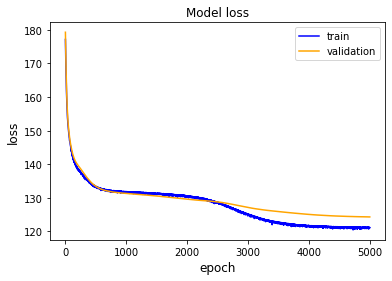

In [27]:
plt.plot(model.history['loss'], color='blue')
plt.plot(model.history['val_loss'], color='orange')
plt.title('Model loss', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.legend(['train', 'validation'])

In [28]:
from mavenn.src.utils import x_to_stats
stats = x_to_stats(x=x_test, alphabet=model.alphabet)
x_ohe_test = stats.pop('x_ohe')

In [29]:
import tensorflow as tf
import tensorflow.keras.backend as K


y_hat_functions = []
yhats = []

phi_function = K.function([model.get_nn().layers[0].input], [model.get_nn().layers[2].output])
phi_test = np.squeeze(phi_function(np.hstack([x_ohe_test,y_test])))

for _ in range(y_train.shape[1]):
    y_hat_functions.append(K.function([model.get_nn().layers[0].input], [model.get_nn().layers[2*_+3].output]))
    yhats.append(np.squeeze(y_hat_functions[_](np.hstack([x_ohe_test,y_test]))))

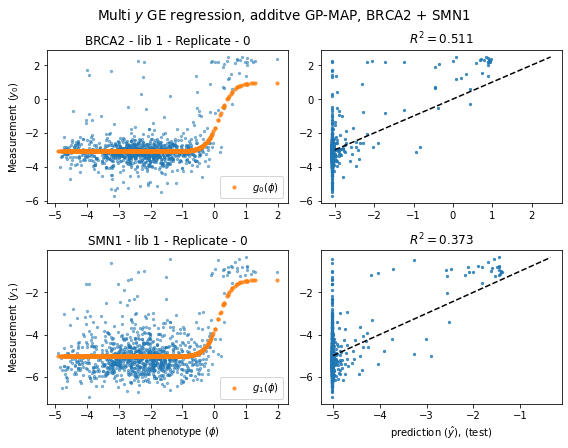

In [36]:
fig, ax = plt.subplots(y_train.shape[1],2,figsize=(8,3*y_train.shape[1]))

for _ in range(y_train.shape[1]):
    
    if _ ==0:
        ax[_,0].set_title(f'BRCA2 - lib 1 - Replicate - 0')
    elif _ ==1:
        ax[_,0].set_title(f'SMN1 - lib 1 - Replicate - 0')
    ax[_,0].scatter(phi_test,y_test[:,_], s=5,alpha=0.5)
    ax[_,0].scatter(phi_test,y_test[:,_].mean()+y_test[:,_].std()*yhats[_],s=10,alpha=0.75,label=f'$g_{_}(\phi)$')
    #ax[_,0].set_xlabel('latent phenotype $(\phi)$')
    ax[_,0].set_ylabel(f'Measurement $(y_{_})$')
    ax[_,0].legend()

    Rsq = np.corrcoef(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_])[0][1]**2
    ax[_,1].set_title('$R^2 = $' + str(Rsq)[0:5])
    ax[_,1].scatter(y_test[:,_].mean()+y_test[:,_].std()*yhats[_],y_test[:,_],s=5,alpha=0.8)
    #diag = np.linspace(min(y_test[:,_]),max(y_test[:,_]),100)
    if _ ==0:
        diag = np.linspace(-3,max(y_test[:,_]),100)
        ax[_,1].plot(diag,diag,'--',color='black')
    elif _ ==1:
        diag = np.linspace(-5,max(y_test[:,_]),100)
        ax[_,1].plot(diag,diag,'--',color='black')
    


ax[_,0].set_xlabel('latent phenotype $(\phi)$')
ax[_,1].set_xlabel('prediction $(\hat y)$, (test)')
    
fig.suptitle('Multi $y$ GE regression, additve GP-MAP, BRCA2 + SMN1',y=1.03,fontsize=13.5)    
fig.tight_layout()
fig.savefig('Multi_y_GE_regression_MPSA_smn1_brca.png',bbox_inches='tight',dpi=300)